In [ ]:
import datetime as dt
import pandas as pd
import yfinance as yf
import numpy as np
import warnings

from bivariate_engle_granger import BivariateEngleGranger
from vector_autoregressive_model import VectorAutoRegressiveModel

warnings.filterwarnings('ignore')

In [2]:
""" 
Toggle batch procedure 

Running the batch procedure for the first time requires run_locally=True for run_batch_procedure() in Notebook Reference 2.0

"""

run_batch = True

In [3]:
""" Notebook Reference 1.0 """

# Create Bivariate Engle Granger class 
EG = BivariateEngleGranger()

# Initialise first pair based on economic reasoning for cointegration to exist (Visa on Mastercard)
ticker_a = "V"
ticker_b = "MA"
start_date = "2020-01-01"
end_date = "2024-11-29"
benchmark = "^SPX"

EG.initialise_single_procedure(ticker_a, ticker_b, start_date, end_date, benchmark=benchmark)

# Get close prices from yfinance
EG.get_close_prices_timeseries()

# Normalise timeseries
EG.normalise_bivariate_timeseries()


In [4]:
""" Notebook Reference 1.1 """

# Naive regression of timeseries
EG.regress_timeseries(include_constant=True)

Regressand Regressor  Coefficient  Standard Error  t-statistic  \
0          V  Constant     0.161250        0.005852    27.554876   
1          V        MA     0.840386        0.004655   180.553333   

   p-value (t-dist)  
0               0.0  
1               0.0

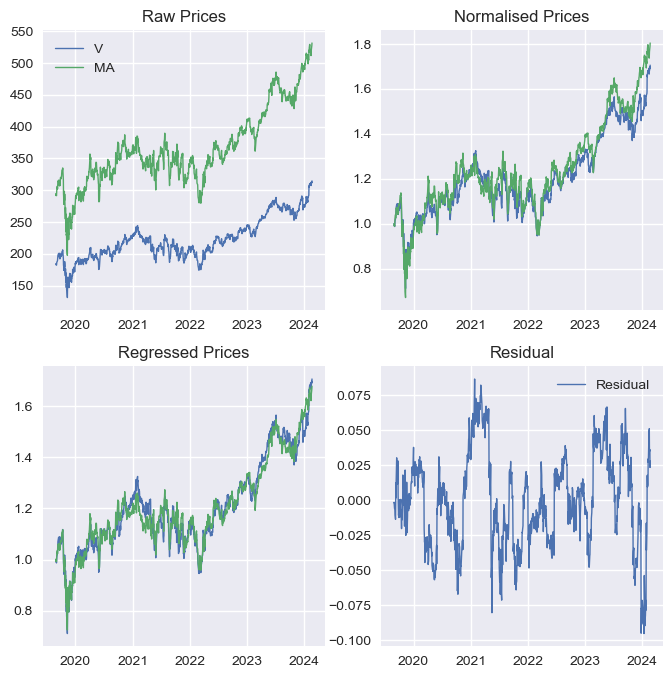

In [5]:
""" Notebook Reference 1.2 """

# Plots
EG.plot_timeseries()

In [6]:
""" Notebook Reference 1.3 """

# Check for stationarity of residual using Cointegrated Augmented Dickey-Fuller test
EG.is_residual_stationary(cadf_include_constant=True)

Regressand          Regressor  t-statistic Significance Level  \
0  ΔResidual  (Lag 1, Residual)    -4.274682                 1%   
1  ΔResidual  (Lag 1, Residual)    -4.274682                 5%   
2  ΔResidual  (Lag 1, Residual)    -4.274682                10%   

   Critical Value  Is Stationary  
0       -3.905337           True  
1       -3.341086           True  
2       -3.047889           True

In [7]:
""" Notebook Reference 1.4 """

# Fit error correction model and confirm significance of reversion speed term
EG.check_error_correction_model_mean_reversion()

Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0         ΔV                 ΔMA     0.795029        0.011609    68.481590   
1         ΔV  (Lag 1, Residuals)    -0.033085        0.007332    -4.512337   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.000007               True

In [8]:
""" Notebook Reference 1.5 """

# Check "wrong way round" residual 
EG.check_error_correction_model_mean_reversion(reverse_regression=True)

Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0        ΔMA                  ΔV     0.995963        0.014544     68.48159   
1        ΔMA  (Lag 1, Residuals)     0.036322        0.008209      4.42450   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.000011               True

Price regression summary


Regressand Regressor  Coefficient  Standard Error  t-statistic  \
0         MA  Constant    -0.139631        0.007724   -18.076519   
1         MA         V     1.146530        0.006350   180.553333   

   p-value (t-dist)  
0               0.0  
1               0.0



Timeseries plots


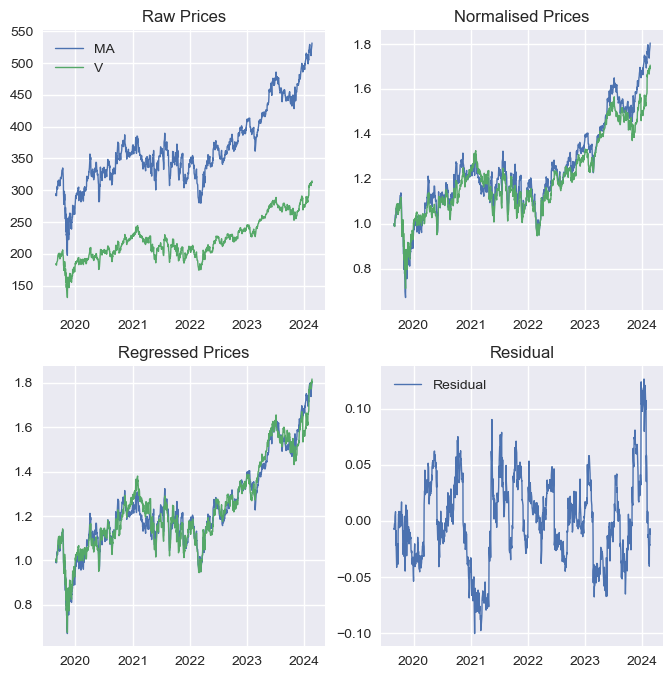



Cointegrated Augmented Dickey-Fuller test


Regressand          Regressor  t-statistic Significance Level  \
0  ΔResidual  (Lag 1, Residual)    -4.305841                 1%   
1  ΔResidual  (Lag 1, Residual)    -4.305841                 5%   
2  ΔResidual  (Lag 1, Residual)    -4.305841                10%   

   Critical Value  Is Stationary  
0       -3.905337           True  
1       -3.341086           True  
2       -3.047889           True



Error Correction Model fitting


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0        ΔMA                  ΔV     0.995669        0.014539    68.480862   
1        ΔMA  (Lag 1, Residuals)    -0.031325        0.007024    -4.459395   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.000009               True



Error Correction Model reverse fitting


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0         ΔV                 ΔMA     0.795260        0.011613    68.480862   
1         ΔV  (Lag 1, Residuals)     0.028031        0.006278     4.465156   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.000009               True



CADF stationarity test has a stronger t-statistic for MA on V (-4.305842 vs -4.274683)


In [9]:
""" Notebook Reference 1.6 """

# Re-estimate the other way round (MA on V) and follow same procedure
EG_reverse = BivariateEngleGranger()

EG_reverse.initialise_single_procedure(ticker_b, ticker_a, start_date, end_date, benchmark=benchmark)

EG_reverse.get_close_prices_timeseries()

EG_reverse.normalise_bivariate_timeseries()

print("Price regression summary")
display(EG_reverse.regress_timeseries(include_constant=True))

print("\n\nTimeseries plots")
EG_reverse.plot_timeseries()

print("\n\nCointegrated Augmented Dickey-Fuller test")
display(EG_reverse.is_residual_stationary(cadf_include_constant=True))

print("\n\nError Correction Model fitting")
display(EG_reverse.check_error_correction_model_mean_reversion())

print("\n\nError Correction Model reverse fitting")
display(EG_reverse.check_error_correction_model_mean_reversion(reverse_regression=True))

print("\n\nCADF stationarity test has a stronger t-statistic for MA on V (-4.305842 vs -4.274683)")

In [10]:
""" Notebook Reference 1.7 """

# Fit residual to Ornstein Uhlenbeck stochastic differential equation
EG_reverse.fit_to_ornstein_uhlenbeck_sde()

Theta: 8.6090

Half-life in years: 0.0805 years
Half-life in working days: 20.2897 days

Equilibrium level μ_e: -0.0001038765575221601
Equilibirum level μ_e can be compared to the AR(1) fitting intercept: -3.4887531918119824e-06

Sum Squared Errors: 0.12443626173446265

Annualised Variance: 0.0004937946894224708
Diffusion in Ornstein-Uhlenbeck SDE (sigma_ou): 0.35879760722510784
Diffusion in equilibrium to dictate entry trade signals (sigma_eq): 0.08646878008234421

Diffusion of sample residuals (note the difference): 0.010037833763695287


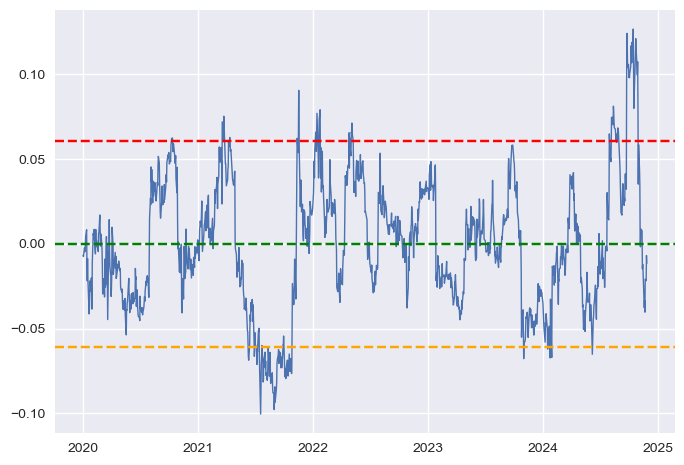

In [11]:
""" Notebook Reference 1.8 """

# Create backtest for z=0.7
backtest = EG_reverse.create_backtest_for_z(0.7)

# Plot residual and trading bounds
EG_reverse.plot_backtest(backtest, trade_markers=False)

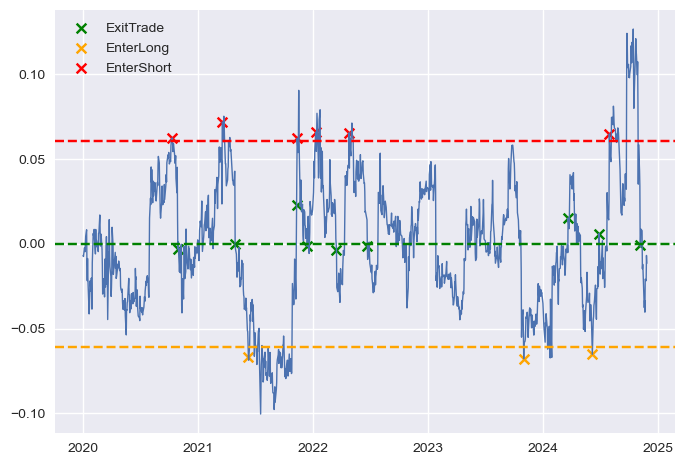

In [12]:
""" Notebook Reference 1.9 """

# Plot residual and trading bounds
EG_reverse.plot_backtest(backtest, trade_markers=True)

In [13]:
""" Notebook Reference 1.10 """

# Find optimal Z
z_table, df_trades = EG_reverse.optimise_trading_strategy()

z_table

Maximum return occurs with Z=0.3


Z  Total Trades  Total Return
0   0.30            27      1.510598
1   0.35            23      1.464461
2   0.40            20      1.313973
3   0.45            18      1.210178
4   0.50            15      1.094540
5   0.55            13      0.887960
6   0.60            12      0.850667
7   0.65            10      0.689996
8   0.70             9      0.664534
9   0.75             8      0.636523
10  0.80             6      0.503287
11  0.85             5      0.420749
12  0.90             4      0.368845
13  0.95             3      0.276968
14  1.00             3      0.276968
15  1.05             2      0.183244
16  1.10             2      0.183244
17  1.15             2      0.204228
18  1.20             1      0.089929
19  1.25             1      0.089929
20  1.30             1      0.089929
21  1.35             1      0.089929
22  1.40             1      0.089929

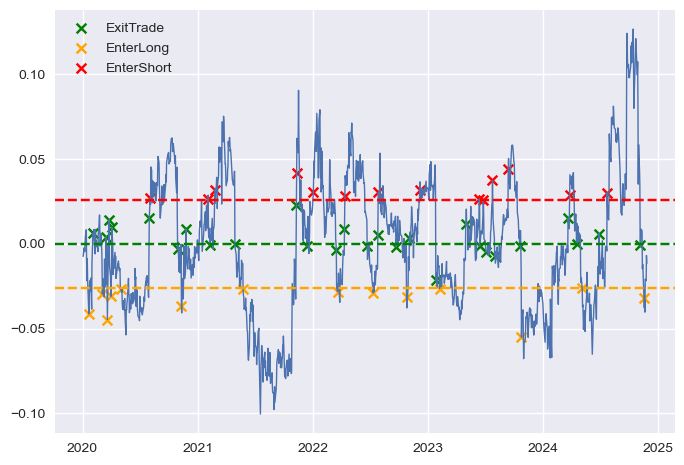

In [14]:
""" Notebook Reference 1.11 """

# Plot trades realised from strategy with optimal Z
EG_reverse.plot_backtest(df_trades, trade_markers=True)


In [15]:
""" Notebook Reference 1.12 """

# Initialise VAR class
VAR = VectorAutoRegressiveModel()

# Get dataframe of ticker close prices
close_pxs = {}
var_tickers = ["^SPX", "MA", "V"]

for ticker in var_tickers:
    close_pxs[ticker] = (yf.Ticker(ticker)
                            .history(start=start_date, end=end_date)
                            .Close)

# Merge into one dataframe
df_var = pd.DataFrame(close_pxs)
df_var.columns = var_tickers

df_var = (np.log(df_var)
          .diff()
          .dropna())

# Fit to VAR model
VAR.fit(df_var, lags=1)

# Retrieve VAR fitting summary
output_var = VAR.summary()

print("VAR(1) fitting summary")
output_var

VAR(1) fitting summary


Regressand      Regressor  Coefficient  Standard Error  t-statistic  \
0        ^SPX       Constant     0.000591        0.000379     1.559996   
1        ^SPX  (Lag 1, ^SPX)    -0.176497        0.046671    -3.781730   
2        ^SPX    (Lag 1, MA)     0.143042        0.047971     2.981816   
3        ^SPX     (Lag 1, V)    -0.165601        0.052667    -3.144324   
4          MA       Constant     0.000569        0.000554     1.028173   
5          MA  (Lag 1, ^SPX)    -0.157131        0.068212    -2.303552   
6          MA    (Lag 1, MA)     0.165192        0.070113     2.356087   
7          MA     (Lag 1, V)    -0.195118        0.076975    -2.534817   
8           V       Constant     0.000535        0.000495     1.080189   
9           V  (Lag 1, ^SPX)    -0.208923        0.061003    -3.424797   
10          V    (Lag 1, MA)     0.238125        0.062703     3.797688   
11          V     (Lag 1, V)    -0.245236        0.068840    -3.562419   

    p-value (t-dist)  
0           0.119018  
1           0.000163  
2           0.002922  
3           0.001705  
4           0.304070  
5           0.021414  
6           0.018625  
7           0.011374  
8           0.280270  
9           0.000636  
10          0.000153  
11          0.000382

In [16]:
""" Notebook Reference 1.13 """

# Retrieve Criterion values for lag selection
VAR.get_optimal_lag(df_var, 10)

AIC          BIC
1           -10057.958206 -9996.532291
2           -10046.911620 -9939.416269
3           -10031.025787 -9877.460999
4           -10025.882087 -9826.247863
5           -10016.613911 -9770.910251
6           -10020.954070 -9729.180973
7           -10022.952978 -9685.110445
8           -10018.282920 -9634.370952
9           -10010.387120 -9580.405715
10           -9997.144244 -9521.093403
Optimal Lag      1.000000     1.000000

In [17]:
""" Notebook Reference 2.0 """

# Run the S&P 500 batch procedure 
# If run_locally=False then a large request is made to yfinance and then stored in a database
#   The yfinance batch call and data dump into the database takes around 3 minutes
# If run_locally=True then no large calls to yfinance are made and data is extracted from the database
# The batch stationarity analysis takes around 5 minutes
# Total run will therefore be around 8 minutes if run_locally=False
# Total run will be shorter if run_locally=True
if run_batch:
    EG_batch = BivariateEngleGranger()
    df_batch = EG_batch.run_batch_procedure(run_locally=True, corr_threshold=0.9) 

Pair: MMM-HAS, Correlation: 0.9056491257543222
Pair: MMM-IFF, Correlation: 0.9482645708907532
Pair: MMM-LUV, Correlation: 0.9298984564644212
Pair: MMM-VLTO, Correlation: 0.921893697907051
Pair: AOS-ACN, Correlation: 0.92628997805821
Pair: AOS-LNT, Correlation: 0.9225719939492791
Pair: AOS-ALL, Correlation: 0.9411753892894854
Pair: AOS-GOOGL, Correlation: 0.923323703051507
Pair: AOS-GOOG, Correlation: 0.9206896258228965
Pair: AOS-MO, Correlation: 0.9007096202826479
Pair: AOS-AEE, Correlation: 0.9050104458023119
Pair: AOS-AEP, Correlation: 0.9113208028432963
Pair: AOS-AME, Correlation: 0.9256761205223335
Pair: AOS-AMGN, Correlation: 0.9359673471327487
Pair: AOS-APH, Correlation: 0.920035230148881
Pair: AOS-ADI, Correlation: 0.9285154858492153
Pair: AOS-AON, Correlation: 0.9168801006029262
Pair: AOS-AIZ, Correlation: 0.9352283353554127
Pair: AOS-ATO, Correlation: 0.9328981427896281
Pair: AOS-ADP, Correlation: 0.92112392364237
Pair: AOS-AVB, Correlation: 0.905984385114098
Pair: AOS-AVY, Co

Pair: HLT-TPL, Correlation: 0.9172482564461524
Pair: HLT-TJX, Correlation: 0.9704681358812082
Pair: HLT-TSCO, Correlation: 0.9513508304417962
Pair: HLT-TT, Correlation: 0.9732560070931084
Pair: HLT-TDG, Correlation: 0.9763125668879383
Pair: HLT-TRV, Correlation: 0.9701068228320351
Pair: HLT-UNP, Correlation: 0.9290114546947718
Pair: HLT-URI, Correlation: 0.9646685223218431
Pair: HLT-UNH, Correlation: 0.9335017619026428
Pair: HLT-VRSK, Correlation: 0.944238142913997
Pair: HLT-VRTX, Correlation: 0.9287496975494799
Pair: HLT-V, Correlation: 0.9329207860902964
Pair: HLT-VMC, Correlation: 0.9575329349518578
Pair: HLT-WRB, Correlation: 0.9685546982173652
Pair: HLT-GWW, Correlation: 0.9543501608071767
Pair: HLT-WMT, Correlation: 0.961930144075163
Pair: HLT-WM, Correlation: 0.9726507607473914
Pair: HLT-WELL, Correlation: 0.9182368412054057
Pair: HLT-WTW, Correlation: 0.9484675872220485
Pair: HLT-XYL, Correlation: 0.9249817249663415
Pair: HLT-YUM, Correlation: 0.9295121061653303
Pair: HOLX-HD, 


Processing pair AOS-GOOGL

Processing pair AOS-GOOG

Processing pair AOS-MO

Processing pair AOS-AEE

Processing pair AOS-AEP

Processing pair AOS-AME

Processing pair AOS-AMGN

Processing pair AOS-APH

Processing pair AOS-ADI

Processing pair AOS-AON

Processing pair AOS-AIZ

Processing pair AOS-ATO

Processing pair AOS-ADP

Processing pair AOS-AVB

Processing pair AOS-AVY

Processing pair AOS-BAC

Processing pair AOS-BDX

Processing pair AOS-BLK

Processing pair AOS-BK

Processing pair AOS-BKNG

Processing pair AOS-BSX

Processing pair AOS-BR

Processing pair AOS-COF

Processing pair AOS-CARR
ADF test for AOS-CARR failed with LinAlgError

Processing pair AOS-CBOE
ADF test for AOS-CBOE failed with LinAlgError

Processing pair AOS-CBRE

Processing pair AOS-CDW
ADF test for AOS-CDW failed with LinAlgError

Processing pair AOS-CE

Processing pair AOS-CNC

Processing pair AOS-SCHW

Processing pair AOS-CB

Processing pair AOS-CHD

Processing pair AOS-CI

Processing pair AOS-CINF

Processi


Processing pair ABT-MSCI

Processing pair ABT-NDAQ

Processing pair ABT-NFLX

Processing pair ABT-NEE

Processing pair ABT-NKE

Processing pair ABT-NDSN

Processing pair ABT-NSC

Processing pair ABT-NOC

Processing pair ABT-NVR

Processing pair ABT-NXPI
ADF test for ABT-NXPI failed with LinAlgError

Processing pair ABT-ODFL

Processing pair ABT-PKG

Processing pair ABT-PAYX

Processing pair ABT-PEP

Processing pair ABT-PNC

Processing pair ABT-POOL

Processing pair ABT-PG

Processing pair ABT-PLD

Processing pair ABT-PEG

Processing pair ABT-PTC

Processing pair ABT-PSA

Processing pair ABT-QCOM

Processing pair ABT-DGX

Processing pair ABT-RJF

Processing pair ABT-O

Processing pair ABT-RF

Processing pair ABT-RSG

Processing pair ABT-RMD

Processing pair ABT-RVTY

Processing pair ABT-ROK

Processing pair ABT-ROL

Processing pair ABT-ROP

Processing pair ABT-ROST

Processing pair ABT-SPGI

Processing pair ABT-CRM

Processing pair ABT-SBAC

Processing pair ABT-STX

Processing pair ABT

ADF test for ABBV-MPC failed with LinAlgError

Processing pair ABBV-MAR
ADF test for ABBV-MAR failed with LinAlgError

Processing pair ABBV-MMC
ADF test for ABBV-MMC failed with LinAlgError

Processing pair ABBV-MLM
ADF test for ABBV-MLM failed with LinAlgError

Processing pair ABBV-MAS
ADF test for ABBV-MAS failed with LinAlgError

Processing pair ABBV-MA
ADF test for ABBV-MA failed with LinAlgError

Processing pair ABBV-MCD
ADF test for ABBV-MCD failed with LinAlgError

Processing pair ABBV-MRK
ADF test for ABBV-MRK failed with LinAlgError

Processing pair ABBV-MET
ADF test for ABBV-MET failed with LinAlgError

Processing pair ABBV-MCHP
ADF test for ABBV-MCHP failed with LinAlgError

Processing pair ABBV-MSFT
ADF test for ABBV-MSFT failed with LinAlgError

Processing pair ABBV-MOH
ADF test for ABBV-MOH failed with LinAlgError

Processing pair ABBV-MDLZ
ADF test for ABBV-MDLZ failed with LinAlgError

Processing pair ABBV-MPWR
ADF test for ABBV-MPWR failed with LinAlgError

Processing 


Processing pair ACN-DOV

Processing pair ACN-DHI

Processing pair ACN-DTE

Processing pair ACN-DUK

Processing pair ACN-EBAY

Processing pair ACN-ECL

Processing pair ACN-EW

Processing pair ACN-ELV

Processing pair ACN-EMR

Processing pair ACN-ETR

Processing pair ACN-EFX

Processing pair ACN-EQIX

Processing pair ACN-EG

Processing pair ACN-EXC

Processing pair ACN-EXPD

Processing pair ACN-EXR

Processing pair ACN-FDS

Processing pair ACN-FAST

Processing pair ACN-FITB

Processing pair ACN-FI

Processing pair ACN-FTNT

Processing pair ACN-GRMN

Processing pair ACN-IT

Processing pair ACN-GEN

Processing pair ACN-GPC

Processing pair ACN-GL

Processing pair ACN-GS

Processing pair ACN-HIG

Processing pair ACN-HCA
ADF test for ACN-HCA failed with LinAlgError

Processing pair ACN-HSY

Processing pair ACN-HLT
ADF test for ACN-HLT failed with LinAlgError

Processing pair ACN-HOLX

Processing pair ACN-HD

Processing pair ACN-HON

Processing pair ACN-HPQ

Processing pair ACN-HUM

Processi


Processing pair ADBE-POOL

Processing pair ADBE-PG

Processing pair ADBE-PLD

Processing pair ADBE-PEG

Processing pair ADBE-PTC

Processing pair ADBE-DGX

Processing pair ADBE-RSG

Processing pair ADBE-RMD

Processing pair ADBE-RVTY

Processing pair ADBE-ROK

Processing pair ADBE-ROL

Processing pair ADBE-ROP

Processing pair ADBE-ROST

Processing pair ADBE-SPGI

Processing pair ADBE-CRM

Processing pair ADBE-SBAC

Processing pair ADBE-NOW
ADF test for ADBE-NOW failed with LinAlgError

Processing pair ADBE-SHW

Processing pair ADBE-SBUX

Processing pair ADBE-STE

Processing pair ADBE-SYK

Processing pair ADBE-SYY

Processing pair ADBE-TMUS

Processing pair ADBE-TROW

Processing pair ADBE-TTWO

Processing pair ADBE-TGT

Processing pair ADBE-TEL

Processing pair ADBE-TDY

Processing pair ADBE-TER

Processing pair ADBE-TXN

Processing pair ADBE-TMO

Processing pair ADBE-TYL

Processing pair ADBE-UNP

Processing pair ADBE-UPS

Processing pair ADBE-UNH

Processing pair ADBE-VRSN

Processi


Processing pair AFL-HIG

Processing pair AFL-HCA
ADF test for AFL-HCA failed with LinAlgError

Processing pair AFL-HLT
ADF test for AFL-HLT failed with LinAlgError

Processing pair AFL-HD

Processing pair AFL-HWM
ADF test for AFL-HWM failed with LinAlgError

Processing pair AFL-HUBB

Processing pair AFL-ITW

Processing pair AFL-IR
ADF test for AFL-IR failed with LinAlgError

Processing pair AFL-ICE

Processing pair AFL-INTU

Processing pair AFL-ISRG

Processing pair AFL-IRM

Processing pair AFL-JBL

Processing pair AFL-J

Processing pair AFL-JPM

Processing pair AFL-KKR
ADF test for AFL-KKR failed with LinAlgError

Processing pair AFL-KLAC

Processing pair AFL-LRCX

Processing pair AFL-LDOS

Processing pair AFL-LEN

Processing pair AFL-LII

Processing pair AFL-LLY

Processing pair AFL-LIN

Processing pair AFL-LMT

Processing pair AFL-L

Processing pair AFL-LOW

Processing pair AFL-MPC
ADF test for AFL-MPC failed with LinAlgError

Processing pair AFL-MAR

Processing pair AFL-MMC

Proce


Processing pair A-TEL

Processing pair A-TDY

Processing pair A-TER

Processing pair A-TSLA
ADF test for A-TSLA failed with LinAlgError

Processing pair A-TXN

Processing pair A-TMO

Processing pair A-TJX

Processing pair A-TSCO

Processing pair A-TRV

Processing pair A-TRMB

Processing pair A-TYL

Processing pair A-UNP

Processing pair A-UPS

Processing pair A-UNH

Processing pair A-VRSN

Processing pair A-VRSK

Processing pair A-V

Processing pair A-VMC

Processing pair A-WRB

Processing pair A-WMT

Processing pair A-WM

Processing pair A-WAT

Processing pair A-WEC

Processing pair A-WST

Processing pair A-WTW

Processing pair A-WDAY
ADF test for A-WDAY failed with LinAlgError

Processing pair A-XEL

Processing pair A-XYL
ADF test for A-XYL failed with LinAlgError

Processing pair A-YUM

Processing pair A-ZBRA

Processing pair A-ZTS
ADF test for A-ZTS failed with LinAlgError

Processing pair APD-AKAM

Processing pair APD-ALLE
ADF test for APD-ALLE failed with LinAlgError

Processing


Processing pair ARE-CSX

Processing pair ARE-DLR

Processing pair ARE-DG

Processing pair ARE-DPZ

Processing pair ARE-DTE

Processing pair ARE-EBAY

Processing pair ARE-EW

Processing pair ARE-EPAM
ADF test for ARE-EPAM failed with LinAlgError

Processing pair ARE-ESS

Processing pair ARE-EL

Processing pair ARE-EVRG

Processing pair ARE-ES

Processing pair ARE-GPN

Processing pair ARE-HON

Processing pair ARE-HRL

Processing pair ARE-IEX

Processing pair ARE-IDXX

Processing pair ARE-JKHY

Processing pair ARE-JNJ

Processing pair ARE-KDP

Processing pair ARE-LHX

Processing pair ARE-LH

Processing pair ARE-MKTX

Processing pair ARE-MKC

Processing pair ARE-MDT

Processing pair ARE-MTD

Processing pair ARE-MAA

Processing pair ARE-NEE

Processing pair ARE-NKE

Processing pair ARE-NSC

Processing pair ARE-NTRS

Processing pair ARE-PAYC
ADF test for ARE-PAYC failed with LinAlgError

Processing pair ARE-PNC

Processing pair ARE-POOL

Processing pair ARE-PLD

Processing pair ARE-O

Proce

ADF test for ALLE-WAT failed with LinAlgError

Processing pair ALLE-WEC
ADF test for ALLE-WEC failed with LinAlgError

Processing pair ALLE-WTW
ADF test for ALLE-WTW failed with LinAlgError

Processing pair ALLE-WDAY
ADF test for ALLE-WDAY failed with LinAlgError

Processing pair ALLE-XEL
ADF test for ALLE-XEL failed with LinAlgError

Processing pair ALLE-XYL
ADF test for ALLE-XYL failed with LinAlgError

Processing pair ALLE-YUM
ADF test for ALLE-YUM failed with LinAlgError

Processing pair ALLE-ZTS
ADF test for ALLE-ZTS failed with LinAlgError

Processing pair LNT-ALL

Processing pair LNT-GOOGL

Processing pair LNT-GOOG

Processing pair LNT-AMZN

Processing pair LNT-AMCR
ADF test for LNT-AMCR failed with LinAlgError

Processing pair LNT-AEE

Processing pair LNT-AEP

Processing pair LNT-AMT

Processing pair LNT-AWK

Processing pair LNT-AME

Processing pair LNT-AMGN

Processing pair LNT-ADI

Processing pair LNT-ANSS

Processing pair LNT-AON

Processing pair LNT-AIZ

Processing pair LNT


Processing pair ALL-ERIE

Processing pair ALL-EG

Processing pair ALL-EVRG

Processing pair ALL-EXPD

Processing pair ALL-EXR

Processing pair ALL-FDS

Processing pair ALL-FAST

Processing pair ALL-FITB

Processing pair ALL-FI

Processing pair ALL-GRMN

Processing pair ALL-IT

Processing pair ALL-GEN

Processing pair ALL-GD

Processing pair ALL-GL

Processing pair ALL-GDDY
ADF test for ALL-GDDY failed with LinAlgError

Processing pair ALL-GS

Processing pair ALL-HIG

Processing pair ALL-HCA
ADF test for ALL-HCA failed with LinAlgError

Processing pair ALL-HLT
ADF test for ALL-HLT failed with LinAlgError

Processing pair ALL-HOLX

Processing pair ALL-HD

Processing pair ALL-HON

Processing pair ALL-HWM
ADF test for ALL-HWM failed with LinAlgError

Processing pair ALL-HUBB

Processing pair ALL-HBAN

Processing pair ALL-IEX

Processing pair ALL-ITW

Processing pair ALL-IR
ADF test for ALL-IR failed with LinAlgError

Processing pair ALL-ICE

Processing pair ALL-IPG

Processing pair ALL-IN


Processing pair GOOGL-LMT

Processing pair GOOGL-LOW

Processing pair GOOGL-LULU

Processing pair GOOGL-MAR

Processing pair GOOGL-MMC

Processing pair GOOGL-MLM

Processing pair GOOGL-MAS

Processing pair GOOGL-MA

Processing pair GOOGL-MCD

Processing pair GOOGL-MRK

Processing pair GOOGL-META
ADF test for GOOGL-META failed with LinAlgError

Processing pair GOOGL-MET

Processing pair GOOGL-MTD

Processing pair GOOGL-MCHP

Processing pair GOOGL-MU

Processing pair GOOGL-MSFT

Processing pair GOOGL-MAA

Processing pair GOOGL-MOH

Processing pair GOOGL-MDLZ

Processing pair GOOGL-MPWR

Processing pair GOOGL-MNST

Processing pair GOOGL-MCO

Processing pair GOOGL-MS

Processing pair GOOGL-MSI

Processing pair GOOGL-MSCI

Processing pair GOOGL-NDAQ

Processing pair GOOGL-NTAP

Processing pair GOOGL-NFLX

Processing pair GOOGL-NEE

Processing pair GOOGL-NDSN

Processing pair GOOGL-NSC

Processing pair GOOGL-NOC

Processing pair GOOGL-NVR

Processing pair GOOGL-NXPI
ADF test for GOOGL-NXPI 


Processing pair GOOG-PEG

Processing pair GOOG-PTC

Processing pair GOOG-PSA

Processing pair GOOG-PHM

Processing pair GOOG-QCOM

Processing pair GOOG-DGX

Processing pair GOOG-RJF

Processing pair GOOG-RF

Processing pair GOOG-RSG

Processing pair GOOG-RMD

Processing pair GOOG-ROK

Processing pair GOOG-ROL

Processing pair GOOG-ROP

Processing pair GOOG-ROST

Processing pair GOOG-SPGI

Processing pair GOOG-CRM

Processing pair GOOG-STX

Processing pair GOOG-NOW
ADF test for GOOG-NOW failed with LinAlgError

Processing pair GOOG-SHW

Processing pair GOOG-SNA

Processing pair GOOG-SO

Processing pair GOOG-STLD

Processing pair GOOG-STE

Processing pair GOOG-SYK

Processing pair GOOG-SNPS

Processing pair GOOG-TMUS

Processing pair GOOG-TEL

Processing pair GOOG-TDY

Processing pair GOOG-TER

Processing pair GOOG-TSLA
ADF test for GOOG-TSLA failed with LinAlgError

Processing pair GOOG-TXN

Processing pair GOOG-TPL

Processing pair GOOG-TMO

Processing pair GOOG-TJX

Processing pair G


Processing pair AEE-ATO

Processing pair AEE-ADSK

Processing pair AEE-ADP

Processing pair AEE-AVB

Processing pair AEE-AVY

Processing pair AEE-BALL

Processing pair AEE-BAC

Processing pair AEE-BDX

Processing pair AEE-BBY

Processing pair AEE-TECH

Processing pair AEE-BLK

Processing pair AEE-BSX

Processing pair AEE-BR

Processing pair AEE-CHRW

Processing pair AEE-CPT

Processing pair AEE-CBRE

Processing pair AEE-CDW
ADF test for AEE-CDW failed with LinAlgError

Processing pair AEE-CE

Processing pair AEE-CNC

Processing pair AEE-CNP

Processing pair AEE-SCHW

Processing pair AEE-CB

Processing pair AEE-CHD

Processing pair AEE-CI

Processing pair AEE-CINF

Processing pair AEE-CSCO

Processing pair AEE-CLX

Processing pair AEE-CME

Processing pair AEE-CMS

Processing pair AEE-KO

Processing pair AEE-CMCSA

Processing pair AEE-ED

Processing pair AEE-STZ

Processing pair AEE-COO

Processing pair AEE-GLW

Processing pair AEE-CSGP

Processing pair AEE-CCI

Processing pair AEE-CSX



Processing pair AEP-SBUX

Processing pair AEP-STE

Processing pair AEP-SYK

Processing pair AEP-SYY

Processing pair AEP-TMUS

Processing pair AEP-TTWO

Processing pair AEP-TEL

Processing pair AEP-TDY

Processing pair AEP-TXN

Processing pair AEP-TMO

Processing pair AEP-TJX

Processing pair AEP-TRV

Processing pair AEP-TYL

Processing pair AEP-UDR

Processing pair AEP-ULTA

Processing pair AEP-UNP

Processing pair AEP-UNH

Processing pair AEP-VLTO
ADF test for AEP-VLTO failed with LinAlgError

Processing pair AEP-VRSN

Processing pair AEP-VRSK

Processing pair AEP-V

Processing pair AEP-VMC

Processing pair AEP-WRB

Processing pair AEP-WMT

Processing pair AEP-WM

Processing pair AEP-WAT

Processing pair AEP-WEC

Processing pair AEP-WTW

Processing pair AEP-XEL

Processing pair AEP-XYL
ADF test for AEP-XYL failed with LinAlgError

Processing pair AEP-YUM

Processing pair AEP-ZTS
ADF test for AEP-ZTS failed with LinAlgError

Processing pair AXP-AMP

Processing pair AXP-AME

Processin


Processing pair AMT-EBAY

Processing pair AMT-ECL

Processing pair AMT-EW

Processing pair AMT-ETR

Processing pair AMT-EFX

Processing pair AMT-EQIX

Processing pair AMT-ESS

Processing pair AMT-EL

Processing pair AMT-EVRG

Processing pair AMT-ES

Processing pair AMT-EXR

Processing pair AMT-FDS

Processing pair AMT-FI

Processing pair AMT-GEN

Processing pair AMT-GPN

Processing pair AMT-HOLX

Processing pair AMT-HD

Processing pair AMT-HON

Processing pair AMT-HRL

Processing pair AMT-HUM

Processing pair AMT-IEX

Processing pair AMT-IDXX

Processing pair AMT-ITW

Processing pair AMT-PODD

Processing pair AMT-ICE

Processing pair AMT-IQV
ADF test for AMT-IQV failed with LinAlgError

Processing pair AMT-JKHY

Processing pair AMT-JNJ

Processing pair AMT-KDP

Processing pair AMT-KMB

Processing pair AMT-LHX

Processing pair AMT-LH

Processing pair AMT-LDOS

Processing pair AMT-LYV

Processing pair AMT-LMT

Processing pair AMT-MKTX

Processing pair AMT-MAS

Processing pair AMT-MA

Pr


Processing pair AMP-CB

Processing pair AMP-CI

Processing pair AMP-CINF

Processing pair AMP-CTAS

Processing pair AMP-KO

Processing pair AMP-CEG
ADF test for AMP-CEG failed with LinAlgError

Processing pair AMP-CPRT

Processing pair AMP-COST

Processing pair AMP-CSX

Processing pair AMP-CMI

Processing pair AMP-DHR

Processing pair AMP-DRI

Processing pair AMP-DECK

Processing pair AMP-DE

Processing pair AMP-DELL
ADF test for AMP-DELL failed with LinAlgError

Processing pair AMP-DFS

Processing pair AMP-DOV

Processing pair AMP-DHI

Processing pair AMP-DUK

Processing pair AMP-ETN

Processing pair AMP-ELV

Processing pair AMP-EMR

Processing pair AMP-ETR

Processing pair AMP-EFX

Processing pair AMP-ERIE

Processing pair AMP-EG

Processing pair AMP-EXPD

Processing pair AMP-FDS

Processing pair AMP-FICO

Processing pair AMP-FAST

Processing pair AMP-FITB

Processing pair AMP-FI

Processing pair AMP-FTNT

Processing pair AMP-GRMN

Processing pair AMP-IT

Processing pair AMP-GEV
ADF


Processing pair AME-LIN

Processing pair AME-LYV

Processing pair AME-LMT

Processing pair AME-LOW

Processing pair AME-LULU

Processing pair AME-MAR

Processing pair AME-MMC

Processing pair AME-MLM

Processing pair AME-MAS

Processing pair AME-MA

Processing pair AME-MCD

Processing pair AME-MRK

Processing pair AME-MET

Processing pair AME-MTD

Processing pair AME-MCHP

Processing pair AME-MU

Processing pair AME-MSFT

Processing pair AME-MAA

Processing pair AME-MOH

Processing pair AME-MDLZ

Processing pair AME-MPWR

Processing pair AME-MNST

Processing pair AME-MCO

Processing pair AME-MS

Processing pair AME-MSI

Processing pair AME-MSCI

Processing pair AME-NDAQ

Processing pair AME-NEE

Processing pair AME-NDSN

Processing pair AME-NSC

Processing pair AME-NOC

Processing pair AME-NUE

Processing pair AME-NVR

Processing pair AME-NXPI
ADF test for AME-NXPI failed with LinAlgError

Processing pair AME-ORLY

Processing pair AME-ODFL

Processing pair AME-ON

Processing pair AME-


Processing pair AMGN-STE

Processing pair AMGN-SYK

Processing pair AMGN-SYY

Processing pair AMGN-TMUS

Processing pair AMGN-TEL

Processing pair AMGN-TDY

Processing pair AMGN-TXN

Processing pair AMGN-TMO

Processing pair AMGN-TJX

Processing pair AMGN-TSCO

Processing pair AMGN-TT

Processing pair AMGN-TDG

Processing pair AMGN-TRV

Processing pair AMGN-TYL

Processing pair AMGN-UNP

Processing pair AMGN-UNH

Processing pair AMGN-VLO

Processing pair AMGN-VRSK

Processing pair AMGN-VRTX

Processing pair AMGN-V

Processing pair AMGN-VMC

Processing pair AMGN-WRB

Processing pair AMGN-WMT

Processing pair AMGN-WM

Processing pair AMGN-WAT

Processing pair AMGN-WEC

Processing pair AMGN-WELL

Processing pair AMGN-WTW

Processing pair AMGN-XEL

Processing pair AMGN-XYL
ADF test for AMGN-XYL failed with LinAlgError

Processing pair AMGN-YUM

Processing pair AMGN-ZTS
ADF test for AMGN-ZTS failed with LinAlgError

Processing pair APH-ADI

Processing pair APH-AON

Processing pair APH-APO



Processing pair ADI-SCHW

Processing pair ADI-CMG

Processing pair ADI-CB

Processing pair ADI-CHD

Processing pair ADI-CI

Processing pair ADI-CINF

Processing pair ADI-CTAS

Processing pair ADI-CSCO

Processing pair ADI-CME

Processing pair ADI-CMS

Processing pair ADI-KO

Processing pair ADI-CL

Processing pair ADI-ED

Processing pair ADI-COO

Processing pair ADI-CPRT

Processing pair ADI-GLW

Processing pair ADI-CSGP

Processing pair ADI-COST

Processing pair ADI-CSX

Processing pair ADI-CMI

Processing pair ADI-DHR

Processing pair ADI-DRI

Processing pair ADI-DE

Processing pair ADI-DXCM

Processing pair ADI-DLR

Processing pair ADI-DFS

Processing pair ADI-DPZ

Processing pair ADI-DOV

Processing pair ADI-DHI

Processing pair ADI-DTE

Processing pair ADI-DUK

Processing pair ADI-ETN

Processing pair ADI-EBAY

Processing pair ADI-ECL

Processing pair ADI-ELV

Processing pair ADI-EMR

Processing pair ADI-ETR

Processing pair ADI-EFX

Processing pair ADI-EQIX

Processing pair ADI-


Processing pair ANSS-MDLZ

Processing pair ANSS-MNST

Processing pair ANSS-MCO

Processing pair ANSS-MSCI

Processing pair ANSS-NDAQ

Processing pair ANSS-NFLX

Processing pair ANSS-NEE

Processing pair ANSS-NKE

Processing pair ANSS-NDSN

Processing pair ANSS-NSC

Processing pair ANSS-NVR

Processing pair ANSS-NXPI
ADF test for ANSS-NXPI failed with LinAlgError

Processing pair ANSS-ODFL

Processing pair ANSS-PAYX

Processing pair ANSS-PEP

Processing pair ANSS-POOL

Processing pair ANSS-PG

Processing pair ANSS-PLD

Processing pair ANSS-PEG

Processing pair ANSS-PTC

Processing pair ANSS-QCOM

Processing pair ANSS-DGX

Processing pair ANSS-RMD

Processing pair ANSS-RVTY

Processing pair ANSS-ROK

Processing pair ANSS-ROL

Processing pair ANSS-ROP

Processing pair ANSS-ROST

Processing pair ANSS-SPGI

Processing pair ANSS-CRM

Processing pair ANSS-SBAC

Processing pair ANSS-NOW
ADF test for ANSS-NOW failed with LinAlgError

Processing pair ANSS-SHW

Processing pair ANSS-SBUX

Process


Processing pair AON-XYL
ADF test for AON-XYL failed with LinAlgError

Processing pair AON-YUM

Processing pair AON-ZTS
ADF test for AON-ZTS failed with LinAlgError

Processing pair APO-AAPL
ADF test for APO-AAPL failed with LinAlgError

Processing pair APO-AMAT
ADF test for APO-AMAT failed with LinAlgError

Processing pair APO-ACGL
ADF test for APO-ACGL failed with LinAlgError

Processing pair APO-ANET
ADF test for APO-ANET failed with LinAlgError

Processing pair APO-AJG
ADF test for APO-AJG failed with LinAlgError

Processing pair APO-ADP
ADF test for APO-ADP failed with LinAlgError

Processing pair APO-AZO
ADF test for APO-AZO failed with LinAlgError

Processing pair APO-AVY
ADF test for APO-AVY failed with LinAlgError

Processing pair APO-AXON
ADF test for APO-AXON failed with LinAlgError

Processing pair APO-BLK
ADF test for APO-BLK failed with LinAlgError

Processing pair APO-BX
ADF test for APO-BX failed with LinAlgError

Processing pair APO-BKNG
ADF test for APO-BKNG failed wi

ADF test for APO-TSCO failed with LinAlgError

Processing pair APO-TT
ADF test for APO-TT failed with LinAlgError

Processing pair APO-TDG
ADF test for APO-TDG failed with LinAlgError

Processing pair APO-TRV
ADF test for APO-TRV failed with LinAlgError

Processing pair APO-URI
ADF test for APO-URI failed with LinAlgError

Processing pair APO-UNH
ADF test for APO-UNH failed with LinAlgError

Processing pair APO-VRSK
ADF test for APO-VRSK failed with LinAlgError

Processing pair APO-VRTX
ADF test for APO-VRTX failed with LinAlgError

Processing pair APO-V
ADF test for APO-V failed with LinAlgError

Processing pair APO-VMC
ADF test for APO-VMC failed with LinAlgError

Processing pair APO-WRB
ADF test for APO-WRB failed with LinAlgError

Processing pair APO-GWW
ADF test for APO-GWW failed with LinAlgError

Processing pair APO-WMT
ADF test for APO-WMT failed with LinAlgError

Processing pair APO-WM
ADF test for APO-WM failed with LinAlgError

Processing pair APO-WELL
ADF test for APO-WELL 


Processing pair AMAT-EQIX

Processing pair AMAT-ERIE

Processing pair AMAT-EXPD

Processing pair AMAT-FDS

Processing pair AMAT-FICO

Processing pair AMAT-FAST

Processing pair AMAT-FTNT

Processing pair AMAT-GRMN

Processing pair AMAT-IT

Processing pair AMAT-GS

Processing pair AMAT-HIG

Processing pair AMAT-HCA
ADF test for AMAT-HCA failed with LinAlgError

Processing pair AMAT-HLT
ADF test for AMAT-HLT failed with LinAlgError

Processing pair AMAT-HD

Processing pair AMAT-HPQ

Processing pair AMAT-HUBB

Processing pair AMAT-IDXX

Processing pair AMAT-ITW

Processing pair AMAT-IR
ADF test for AMAT-IR failed with LinAlgError

Processing pair AMAT-ICE

Processing pair AMAT-INTU

Processing pair AMAT-ISRG

Processing pair AMAT-IRM

Processing pair AMAT-JBHT

Processing pair AMAT-JBL

Processing pair AMAT-J

Processing pair AMAT-JCI

Processing pair AMAT-JPM

Processing pair AMAT-KKR
ADF test for AMAT-KKR failed with LinAlgError

Processing pair AMAT-KLAC

Processing pair AMAT-LH

Proc

ADF test for ANET-CDNS failed with LinAlgError

Processing pair ANET-CAT
ADF test for ANET-CAT failed with LinAlgError

Processing pair ANET-CBOE
ADF test for ANET-CBOE failed with LinAlgError

Processing pair ANET-COR
ADF test for ANET-COR failed with LinAlgError

Processing pair ANET-CMG
ADF test for ANET-CMG failed with LinAlgError

Processing pair ANET-CB
ADF test for ANET-CB failed with LinAlgError

Processing pair ANET-CTAS
ADF test for ANET-CTAS failed with LinAlgError

Processing pair ANET-CEG
ADF test for ANET-CEG failed with LinAlgError

Processing pair ANET-COST
ADF test for ANET-COST failed with LinAlgError

Processing pair ANET-DECK
ADF test for ANET-DECK failed with LinAlgError

Processing pair ANET-DELL
ADF test for ANET-DELL failed with LinAlgError

Processing pair ANET-DHI
ADF test for ANET-DHI failed with LinAlgError

Processing pair ANET-ETN
ADF test for ANET-ETN failed with LinAlgError

Processing pair ANET-ERIE
ADF test for ANET-ERIE failed with LinAlgError

Proces


Processing pair AJG-NTAP

Processing pair AJG-NDSN

Processing pair AJG-NOC

Processing pair AJG-NUE

Processing pair AJG-NVR

Processing pair AJG-NXPI
ADF test for AJG-NXPI failed with LinAlgError

Processing pair AJG-ORLY

Processing pair AJG-ODFL

Processing pair AJG-ON

Processing pair AJG-OKE

Processing pair AJG-ORCL

Processing pair AJG-PCAR

Processing pair AJG-PKG

Processing pair AJG-PANW
ADF test for AJG-PANW failed with LinAlgError

Processing pair AJG-PH

Processing pair AJG-PAYX

Processing pair AJG-PEP

Processing pair AJG-PFG

Processing pair AJG-PG

Processing pair AJG-PGR

Processing pair AJG-PLD

Processing pair AJG-PEG

Processing pair AJG-PTC

Processing pair AJG-PSA

Processing pair AJG-PHM

Processing pair AJG-PWR

Processing pair AJG-QCOM

Processing pair AJG-DGX

Processing pair AJG-RJF

Processing pair AJG-RSG

Processing pair AJG-ROK

Processing pair AJG-ROL

Processing pair AJG-ROP

Processing pair AJG-SPGI

Processing pair AJG-STX

Processing pair AJG-NOW



Processing pair ATO-CI

Processing pair ATO-CINF

Processing pair ATO-CSCO

Processing pair ATO-CLX

Processing pair ATO-CME

Processing pair ATO-CMS

Processing pair ATO-KO

Processing pair ATO-CL

Processing pair ATO-ED

Processing pair ATO-STZ

Processing pair ATO-COO

Processing pair ATO-GLW

Processing pair ATO-CPAY
ADF test for ATO-CPAY failed with LinAlgError

Processing pair ATO-CSGP

Processing pair ATO-CSX

Processing pair ATO-DHR

Processing pair ATO-DRI

Processing pair ATO-DLR

Processing pair ATO-DPZ

Processing pair ATO-DOV

Processing pair ATO-DTE

Processing pair ATO-DUK

Processing pair ATO-ECL

Processing pair ATO-EIX

Processing pair ATO-EA

Processing pair ATO-ELV

Processing pair ATO-ETR

Processing pair ATO-EFX

Processing pair ATO-EQIX

Processing pair ATO-EQR

Processing pair ATO-ESS

Processing pair ATO-EG

Processing pair ATO-EVRG

Processing pair ATO-ES

Processing pair ATO-EXR

Processing pair ATO-FDS

Processing pair ATO-FI

Processing pair ATO-GEV
ADF te


Processing pair ADP-CMS

Processing pair ADP-KO

Processing pair ADP-CL

Processing pair ADP-ED

Processing pair ADP-STZ

Processing pair ADP-COO

Processing pair ADP-CPRT

Processing pair ADP-GLW

Processing pair ADP-CSGP

Processing pair ADP-COST

Processing pair ADP-CSX

Processing pair ADP-CMI

Processing pair ADP-DHR

Processing pair ADP-DRI

Processing pair ADP-DE

Processing pair ADP-DLR

Processing pair ADP-DFS

Processing pair ADP-DPZ

Processing pair ADP-DOV

Processing pair ADP-DHI

Processing pair ADP-DTE

Processing pair ADP-DUK

Processing pair ADP-ECL

Processing pair ADP-ELV

Processing pair ADP-EMR

Processing pair ADP-ETR

Processing pair ADP-EFX

Processing pair ADP-EQIX

Processing pair ADP-ERIE

Processing pair ADP-EG

Processing pair ADP-EVRG

Processing pair ADP-EXC

Processing pair ADP-EXPD

Processing pair ADP-EXR

Processing pair ADP-FDS

Processing pair ADP-FAST

Processing pair ADP-FITB

Processing pair ADP-FI

Processing pair ADP-FTNT

Processing pair ADP-


Processing pair AZO-NDAQ

Processing pair AZO-NDSN

Processing pair AZO-NOC

Processing pair AZO-NUE

Processing pair AZO-NVR

Processing pair AZO-NXPI
ADF test for AZO-NXPI failed with LinAlgError

Processing pair AZO-ORLY

Processing pair AZO-ODFL

Processing pair AZO-ON

Processing pair AZO-ORCL

Processing pair AZO-PCAR

Processing pair AZO-PKG

Processing pair AZO-PANW
ADF test for AZO-PANW failed with LinAlgError

Processing pair AZO-PH

Processing pair AZO-PAYX

Processing pair AZO-PEP

Processing pair AZO-PFG

Processing pair AZO-PG

Processing pair AZO-PGR

Processing pair AZO-PLD

Processing pair AZO-PEG

Processing pair AZO-PTC

Processing pair AZO-PSA

Processing pair AZO-PHM

Processing pair AZO-PWR

Processing pair AZO-QCOM

Processing pair AZO-DGX

Processing pair AZO-RJF

Processing pair AZO-REGN

Processing pair AZO-RSG

Processing pair AZO-ROL

Processing pair AZO-ROP

Processing pair AZO-SPGI

Processing pair AZO-SRE

Processing pair AZO-NOW
ADF test for AZO-NOW fai


Processing pair AVY-SPGI

Processing pair AVY-CRM

Processing pair AVY-STX

Processing pair AVY-SRE

Processing pair AVY-NOW
ADF test for AVY-NOW failed with LinAlgError

Processing pair AVY-SHW

Processing pair AVY-SNA

Processing pair AVY-SO

Processing pair AVY-SBUX

Processing pair AVY-STE

Processing pair AVY-SYK

Processing pair AVY-SNPS

Processing pair AVY-SYY

Processing pair AVY-TMUS

Processing pair AVY-TROW

Processing pair AVY-TTWO

Processing pair AVY-TGT

Processing pair AVY-TEL

Processing pair AVY-TDY

Processing pair AVY-TER

Processing pair AVY-TXN

Processing pair AVY-TXT

Processing pair AVY-TMO

Processing pair AVY-TJX

Processing pair AVY-TSCO

Processing pair AVY-TT

Processing pair AVY-TDG

Processing pair AVY-TRV

Processing pair AVY-TYL

Processing pair AVY-UDR

Processing pair AVY-ULTA

Processing pair AVY-UNP

Processing pair AVY-UPS

Processing pair AVY-UNH

Processing pair AVY-VRSN

Processing pair AVY-VRSK

Processing pair AVY-VRTX

Processing pair AVY-


Processing pair BAC-PEP

Processing pair BAC-PNC

Processing pair BAC-POOL

Processing pair BAC-PG

Processing pair BAC-PLD

Processing pair BAC-PRU

Processing pair BAC-PEG

Processing pair BAC-PTC

Processing pair BAC-DGX

Processing pair BAC-RJF

Processing pair BAC-RTX

Processing pair BAC-RF

Processing pair BAC-RMD

Processing pair BAC-RVTY

Processing pair BAC-ROK

Processing pair BAC-ROL

Processing pair BAC-ROP

Processing pair BAC-ROST

Processing pair BAC-SPGI

Processing pair BAC-CRM

Processing pair BAC-STX

Processing pair BAC-SHW

Processing pair BAC-STE

Processing pair BAC-SYK

Processing pair BAC-SYY

Processing pair BAC-TMUS

Processing pair BAC-TROW

Processing pair BAC-TTWO

Processing pair BAC-TEL

Processing pair BAC-TDY

Processing pair BAC-TER

Processing pair BAC-TXN

Processing pair BAC-TMO

Processing pair BAC-TRV

Processing pair BAC-TFC

Processing pair BAC-TYL

Processing pair BAC-UDR

Processing pair BAC-UNP

Processing pair BAC-UNH

Processing pair BAC


Processing pair TECH-RMD

Processing pair TECH-RVTY

Processing pair TECH-ROK

Processing pair TECH-ROP

Processing pair TECH-SPGI

Processing pair TECH-CRM

Processing pair TECH-SBAC

Processing pair TECH-SHW

Processing pair TECH-SBUX

Processing pair TECH-STE

Processing pair TECH-TROW

Processing pair TECH-TGT

Processing pair TECH-TEL

Processing pair TECH-TDY

Processing pair TECH-TER

Processing pair TECH-TSLA
ADF test for TECH-TSLA failed with LinAlgError

Processing pair TECH-TXN

Processing pair TECH-TMO

Processing pair TECH-TRMB

Processing pair TECH-TYL

Processing pair TECH-UNP

Processing pair TECH-UPS

Processing pair TECH-VRSN

Processing pair TECH-WAT

Processing pair TECH-WST

Processing pair TECH-XEL

Processing pair TECH-YUM

Processing pair TECH-ZBRA

Processing pair TECH-ZTS
ADF test for TECH-ZTS failed with LinAlgError

Processing pair BLK-BX

Processing pair BLK-BKNG

Processing pair BLK-BSX

Processing pair BLK-BR

Processing pair BLK-BRO

Processing pair BLK


Processing pair BX-HIG

Processing pair BX-HCA
ADF test for BX-HCA failed with LinAlgError

Processing pair BX-HLT
ADF test for BX-HLT failed with LinAlgError

Processing pair BX-HOLX

Processing pair BX-HD

Processing pair BX-HPQ

Processing pair BX-HUBB

Processing pair BX-IDXX

Processing pair BX-ITW

Processing pair BX-IR
ADF test for BX-IR failed with LinAlgError

Processing pair BX-ICE

Processing pair BX-IPG

Processing pair BX-INTU

Processing pair BX-ISRG

Processing pair BX-INVH
ADF test for BX-INVH failed with LinAlgError

Processing pair BX-IQV
ADF test for BX-IQV failed with LinAlgError

Processing pair BX-IRM

Processing pair BX-JBHT

Processing pair BX-JBL

Processing pair BX-J

Processing pair BX-JCI

Processing pair BX-JPM

Processing pair BX-KKR
ADF test for BX-KKR failed with LinAlgError

Processing pair BX-KLAC

Processing pair BX-LH

Processing pair BX-LRCX

Processing pair BX-LDOS

Processing pair BX-LEN

Processing pair BX-LII

Processing pair BX-LIN

Processing


Processing pair BSX-BRO

Processing pair BSX-CDNS

Processing pair BSX-CAT

Processing pair BSX-CBOE
ADF test for BSX-CBOE failed with LinAlgError

Processing pair BSX-CBRE

Processing pair BSX-CDW
ADF test for BSX-CDW failed with LinAlgError

Processing pair BSX-COR

Processing pair BSX-CB

Processing pair BSX-CHD

Processing pair BSX-CI

Processing pair BSX-CINF

Processing pair BSX-CTAS

Processing pair BSX-CSCO

Processing pair BSX-CME

Processing pair BSX-CMS

Processing pair BSX-KO

Processing pair BSX-CL

Processing pair BSX-ED

Processing pair BSX-STZ

Processing pair BSX-CEG
ADF test for BSX-CEG failed with LinAlgError

Processing pair BSX-COO

Processing pair BSX-CPRT

Processing pair BSX-GLW

Processing pair BSX-COST

Processing pair BSX-CSX

Processing pair BSX-CMI

Processing pair BSX-DRI

Processing pair BSX-DELL
ADF test for BSX-DELL failed with LinAlgError

Processing pair BSX-DLR

Processing pair BSX-DFS

Processing pair BSX-DPZ

Processing pair BSX-DOV

Processing pa


Processing pair BR-COO

Processing pair BR-CPRT

Processing pair BR-GLW

Processing pair BR-CSGP

Processing pair BR-COST

Processing pair BR-CSX

Processing pair BR-CMI

Processing pair BR-DHR

Processing pair BR-DRI

Processing pair BR-DE

Processing pair BR-DLR

Processing pair BR-DFS

Processing pair BR-DPZ

Processing pair BR-DOV

Processing pair BR-DHI

Processing pair BR-DTE

Processing pair BR-DUK

Processing pair BR-EBAY

Processing pair BR-ECL

Processing pair BR-EW

Processing pair BR-EA

Processing pair BR-ELV

Processing pair BR-EMR

Processing pair BR-ETR

Processing pair BR-EFX

Processing pair BR-EQIX

Processing pair BR-ERIE

Processing pair BR-EG

Processing pair BR-EVRG

Processing pair BR-EXC

Processing pair BR-EXPD

Processing pair BR-EXR

Processing pair BR-FDS

Processing pair BR-FAST

Processing pair BR-FITB

Processing pair BR-FI

Processing pair BR-FTNT

Processing pair BR-GRMN

Processing pair BR-IT

Processing pair BR-GEN

Processing pair BR-GD

Processing


Processing pair BRO-MSI

Processing pair BRO-MSCI

Processing pair BRO-NDAQ

Processing pair BRO-NTAP

Processing pair BRO-NEE

Processing pair BRO-NDSN

Processing pair BRO-NSC

Processing pair BRO-NOC

Processing pair BRO-NUE

Processing pair BRO-NVR

Processing pair BRO-NXPI
ADF test for BRO-NXPI failed with LinAlgError

Processing pair BRO-ORLY

Processing pair BRO-ODFL

Processing pair BRO-ON

Processing pair BRO-OKE

Processing pair BRO-ORCL

Processing pair BRO-PCAR

Processing pair BRO-PKG

Processing pair BRO-PANW
ADF test for BRO-PANW failed with LinAlgError

Processing pair BRO-PH

Processing pair BRO-PAYX

Processing pair BRO-PNR

Processing pair BRO-PEP

Processing pair BRO-POOL

Processing pair BRO-PG

Processing pair BRO-PGR

Processing pair BRO-PLD

Processing pair BRO-PEG

Processing pair BRO-PTC

Processing pair BRO-PSA

Processing pair BRO-PHM

Processing pair BRO-PWR

Processing pair BRO-QCOM

Processing pair BRO-DGX

Processing pair BRO-RJF

Processing pair BRO-RT


Processing pair CDNS-PCAR

Processing pair CDNS-PKG

Processing pair CDNS-PANW
ADF test for CDNS-PANW failed with LinAlgError

Processing pair CDNS-PH

Processing pair CDNS-PAYX

Processing pair CDNS-PEP

Processing pair CDNS-PG

Processing pair CDNS-PGR

Processing pair CDNS-PLD

Processing pair CDNS-PTC

Processing pair CDNS-PHM

Processing pair CDNS-PWR

Processing pair CDNS-QCOM

Processing pair CDNS-RJF

Processing pair CDNS-RSG

Processing pair CDNS-ROK

Processing pair CDNS-ROL

Processing pair CDNS-ROP

Processing pair CDNS-SPGI

Processing pair CDNS-NOW
ADF test for CDNS-NOW failed with LinAlgError

Processing pair CDNS-SHW

Processing pair CDNS-SNA

Processing pair CDNS-SO

Processing pair CDNS-STLD

Processing pair CDNS-STE

Processing pair CDNS-SYK

Processing pair CDNS-SNPS

Processing pair CDNS-TMUS

Processing pair CDNS-TEL

Processing pair CDNS-TXN

Processing pair CDNS-TPL

Processing pair CDNS-TMO

Processing pair CDNS-TJX

Processing pair CDNS-TSCO

Processing pair 

ADF test for CARR-KKR failed with LinAlgError

Processing pair CARR-LEN
ADF test for CARR-LEN failed with LinAlgError

Processing pair CARR-LIN
ADF test for CARR-LIN failed with LinAlgError

Processing pair CARR-LOW
ADF test for CARR-LOW failed with LinAlgError

Processing pair CARR-MLM
ADF test for CARR-MLM failed with LinAlgError

Processing pair CARR-MSFT
ADF test for CARR-MSFT failed with LinAlgError

Processing pair CARR-MPWR
ADF test for CARR-MPWR failed with LinAlgError

Processing pair CARR-MCO
ADF test for CARR-MCO failed with LinAlgError

Processing pair CARR-MSI
ADF test for CARR-MSI failed with LinAlgError

Processing pair CARR-NTAP
ADF test for CARR-NTAP failed with LinAlgError

Processing pair CARR-NVR
ADF test for CARR-NVR failed with LinAlgError

Processing pair CARR-NXPI
ADF test for CARR-NXPI failed with LinAlgError

Processing pair CARR-ORCL
ADF test for CARR-ORCL failed with LinAlgError

Processing pair CARR-OTIS
ADF test for CARR-OTIS failed with LinAlgError

Proce

ADF test for CBOE-FI failed with LinAlgError

Processing pair CBOE-IT
ADF test for CBOE-IT failed with LinAlgError

Processing pair CBOE-GD
ADF test for CBOE-GD failed with LinAlgError

Processing pair CBOE-GL
ADF test for CBOE-GL failed with LinAlgError

Processing pair CBOE-GS
ADF test for CBOE-GS failed with LinAlgError

Processing pair CBOE-HIG
ADF test for CBOE-HIG failed with LinAlgError

Processing pair CBOE-HCA
ADF test for CBOE-HCA failed with LinAlgError

Processing pair CBOE-HLT
ADF test for CBOE-HLT failed with LinAlgError

Processing pair CBOE-HD
ADF test for CBOE-HD failed with LinAlgError

Processing pair CBOE-HON
ADF test for CBOE-HON failed with LinAlgError

Processing pair CBOE-HWM
ADF test for CBOE-HWM failed with LinAlgError

Processing pair CBOE-HUBB
ADF test for CBOE-HUBB failed with LinAlgError

Processing pair CBOE-HII
ADF test for CBOE-HII failed with LinAlgError

Processing pair CBOE-IEX
ADF test for CBOE-IEX failed with LinAlgError

Processing pair CBOE-ITW
A

ADF test for CBRE-CDW failed with LinAlgError

Processing pair CBRE-CE

Processing pair CBRE-SCHW

Processing pair CBRE-CMG

Processing pair CBRE-CB

Processing pair CBRE-CHD

Processing pair CBRE-CI

Processing pair CBRE-CINF

Processing pair CBRE-CTAS

Processing pair CBRE-CSCO

Processing pair CBRE-CME

Processing pair CBRE-KO

Processing pair CBRE-COO

Processing pair CBRE-CPRT

Processing pair CBRE-GLW

Processing pair CBRE-COST

Processing pair CBRE-CSX

Processing pair CBRE-CMI

Processing pair CBRE-DHR

Processing pair CBRE-DRI

Processing pair CBRE-DE

Processing pair CBRE-DFS

Processing pair CBRE-DPZ

Processing pair CBRE-DOV

Processing pair CBRE-DHI

Processing pair CBRE-DTE

Processing pair CBRE-DUK

Processing pair CBRE-EBAY

Processing pair CBRE-ELV

Processing pair CBRE-EMR

Processing pair CBRE-ETR

Processing pair CBRE-EFX

Processing pair CBRE-EQIX

Processing pair CBRE-EXC

Processing pair CBRE-EXPD

Processing pair CBRE-EXR

Processing pair CBRE-FDS

Processing pa

ADF test for CDW-GPC failed with LinAlgError

Processing pair CDW-GS
ADF test for CDW-GS failed with LinAlgError

Processing pair CDW-HCA
ADF test for CDW-HCA failed with LinAlgError

Processing pair CDW-HSY
ADF test for CDW-HSY failed with LinAlgError

Processing pair CDW-HLT
ADF test for CDW-HLT failed with LinAlgError

Processing pair CDW-HOLX
ADF test for CDW-HOLX failed with LinAlgError

Processing pair CDW-HD
ADF test for CDW-HD failed with LinAlgError

Processing pair CDW-HON
ADF test for CDW-HON failed with LinAlgError

Processing pair CDW-HPQ
ADF test for CDW-HPQ failed with LinAlgError

Processing pair CDW-IEX
ADF test for CDW-IEX failed with LinAlgError

Processing pair CDW-IDXX
ADF test for CDW-IDXX failed with LinAlgError

Processing pair CDW-ITW
ADF test for CDW-ITW failed with LinAlgError

Processing pair CDW-IR
ADF test for CDW-IR failed with LinAlgError

Processing pair CDW-ICE
ADF test for CDW-ICE failed with LinAlgError

Processing pair CDW-IPG
ADF test for CDW-IPG f


Processing pair CE-SCHW

Processing pair CE-CHD

Processing pair CE-CINF

Processing pair CE-CSCO

Processing pair CE-CME

Processing pair CE-CMS

Processing pair CE-KO

Processing pair CE-CMCSA

Processing pair CE-STZ

Processing pair CE-COO

Processing pair CE-GLW

Processing pair CE-CSGP

Processing pair CE-CSX

Processing pair CE-DHR

Processing pair CE-DRI

Processing pair CE-DLR

Processing pair CE-DFS

Processing pair CE-DPZ

Processing pair CE-DOV

Processing pair CE-DTE

Processing pair CE-DUK

Processing pair CE-EMN

Processing pair CE-EBAY

Processing pair CE-ECL

Processing pair CE-EW

Processing pair CE-EA

Processing pair CE-ELV

Processing pair CE-EMR

Processing pair CE-EFX

Processing pair CE-EQIX

Processing pair CE-ESS

Processing pair CE-EXPD

Processing pair CE-EXR

Processing pair CE-FDS

Processing pair CE-FITB

Processing pair CE-FI

Processing pair CE-GL

Processing pair CE-HOLX

Processing pair CE-HD

Processing pair CE-HON

Processing pair CE-HBAN

Processin


Processing pair CNC-PEG

Processing pair CNC-DGX

Processing pair CNC-O

Processing pair CNC-RF

Processing pair CNC-RMD

Processing pair CNC-RVTY

Processing pair CNC-ROK

Processing pair CNC-ROL

Processing pair CNC-ROP

Processing pair CNC-ROST

Processing pair CNC-SPGI

Processing pair CNC-SBAC

Processing pair CNC-SRE

Processing pair CNC-SHW

Processing pair CNC-SBUX

Processing pair CNC-STE

Processing pair CNC-SYY

Processing pair CNC-TTWO

Processing pair CNC-TEL

Processing pair CNC-TDY

Processing pair CNC-TXN

Processing pair CNC-TMO

Processing pair CNC-TYL

Processing pair CNC-UDR

Processing pair CNC-ULTA

Processing pair CNC-UNP

Processing pair CNC-UNH

Processing pair CNC-VRSN

Processing pair CNC-V

Processing pair CNC-WAT

Processing pair CNC-WEC

Processing pair CNC-WTW

Processing pair CNC-XEL

Processing pair CNC-YUM

Processing pair CNP-CB

Processing pair CNP-CINF

Processing pair CNP-KO

Processing pair CNP-ED

Processing pair CNP-STZ

Processing pair CNP-DRI

ADF test for CHTR-SWK failed with LinAlgError

Processing pair CHTR-TROW
ADF test for CHTR-TROW failed with LinAlgError

Processing pair CHTR-TTWO
ADF test for CHTR-TTWO failed with LinAlgError

Processing pair CHTR-TFX
ADF test for CHTR-TFX failed with LinAlgError

Processing pair CHTR-DIS
ADF test for CHTR-DIS failed with LinAlgError

Processing pair CVX-CB

Processing pair CVX-KO

Processing pair CVX-COP

Processing pair CVX-ELV

Processing pair CVX-EOG

Processing pair CVX-EG

Processing pair CVX-XOM

Processing pair CVX-IT

Processing pair CVX-GPC

Processing pair CVX-HSY

Processing pair CVX-L

Processing pair CVX-MPC
ADF test for CVX-MPC failed with LinAlgError

Processing pair CVX-MMC

Processing pair CVX-MRK

Processing pair CVX-MET

Processing pair CVX-NUE

Processing pair CVX-ORLY

Processing pair CVX-ON

Processing pair CVX-OKE

Processing pair CVX-PFG

Processing pair CVX-RJF

Processing pair CVX-STLD

Processing pair CVX-VLO

Processing pair CVX-WRB

Processing pair CMG-C


Processing pair CB-TSCO

Processing pair CB-TT

Processing pair CB-TDG

Processing pair CB-TRV

Processing pair CB-TYL

Processing pair CB-ULTA

Processing pair CB-UNP

Processing pair CB-URI

Processing pair CB-UNH

Processing pair CB-VLO

Processing pair CB-VLTO
ADF test for CB-VLTO failed with LinAlgError

Processing pair CB-VRSK

Processing pair CB-VRTX

Processing pair CB-V

Processing pair CB-VMC

Processing pair CB-WRB

Processing pair CB-GWW

Processing pair CB-WMT

Processing pair CB-WM

Processing pair CB-WAT

Processing pair CB-WELL

Processing pair CB-WTW

Processing pair CB-XYL
ADF test for CB-XYL failed with LinAlgError

Processing pair CB-YUM

Processing pair CHD-CI

Processing pair CHD-CINF

Processing pair CHD-CTAS

Processing pair CHD-CSCO

Processing pair CHD-CLX

Processing pair CHD-CME

Processing pair CHD-CMS

Processing pair CHD-KO

Processing pair CHD-CL

Processing pair CHD-CMCSA

Processing pair CHD-ED

Processing pair CHD-STZ

Processing pair CHD-COO

Proces


Processing pair CI-PM

Processing pair CI-PNC

Processing pair CI-PFG

Processing pair CI-PG

Processing pair CI-PGR

Processing pair CI-PRU

Processing pair CI-PEG

Processing pair CI-PTC

Processing pair CI-PSA

Processing pair CI-DGX

Processing pair CI-RJF

Processing pair CI-RTX

Processing pair CI-REGN

Processing pair CI-RF

Processing pair CI-RSG

Processing pair CI-ROK

Processing pair CI-ROL

Processing pair CI-ROP

Processing pair CI-ROST

Processing pair CI-SPGI

Processing pair CI-SRE

Processing pair CI-SHW

Processing pair CI-SNA

Processing pair CI-SO

Processing pair CI-STLD

Processing pair CI-STE

Processing pair CI-SYK

Processing pair CI-SNPS

Processing pair CI-SYY

Processing pair CI-TMUS

Processing pair CI-TEL

Processing pair CI-TDY

Processing pair CI-TXN

Processing pair CI-TXT

Processing pair CI-TMO

Processing pair CI-TJX

Processing pair CI-TSCO

Processing pair CI-TDG

Processing pair CI-TRV

Processing pair CI-TYL

Processing pair CI-ULTA

Processing 


Processing pair CTAS-LMT

Processing pair CTAS-L

Processing pair CTAS-LOW

Processing pair CTAS-MPC
ADF test for CTAS-MPC failed with LinAlgError

Processing pair CTAS-MAR

Processing pair CTAS-MMC

Processing pair CTAS-MLM

Processing pair CTAS-MAS

Processing pair CTAS-MA

Processing pair CTAS-MCD

Processing pair CTAS-MCK

Processing pair CTAS-MRK

Processing pair CTAS-META
ADF test for CTAS-META failed with LinAlgError

Processing pair CTAS-MET

Processing pair CTAS-MTD

Processing pair CTAS-MCHP

Processing pair CTAS-MU

Processing pair CTAS-MSFT

Processing pair CTAS-MOH

Processing pair CTAS-MDLZ

Processing pair CTAS-MPWR

Processing pair CTAS-MNST

Processing pair CTAS-MCO

Processing pair CTAS-MS

Processing pair CTAS-MSI

Processing pair CTAS-MSCI

Processing pair CTAS-NDAQ

Processing pair CTAS-NTAP

Processing pair CTAS-NDSN

Processing pair CTAS-NOC

Processing pair CTAS-NRG

Processing pair CTAS-NUE

Processing pair CTAS-NVR

Processing pair CTAS-NXPI
ADF test for CTAS


Processing pair CME-ED

Processing pair CME-STZ

Processing pair CME-COO

Processing pair CME-CPRT

Processing pair CME-GLW

Processing pair CME-CPAY
ADF test for CME-CPAY failed with LinAlgError

Processing pair CME-CSGP

Processing pair CME-CSX

Processing pair CME-DHR

Processing pair CME-DRI

Processing pair CME-DLR

Processing pair CME-DFS

Processing pair CME-DPZ

Processing pair CME-DOV

Processing pair CME-DTE

Processing pair CME-DUK

Processing pair CME-ECL

Processing pair CME-EW

Processing pair CME-EA

Processing pair CME-ELV

Processing pair CME-EMR

Processing pair CME-ETR

Processing pair CME-EFX

Processing pair CME-EQIX

Processing pair CME-EQR

Processing pair CME-ESS

Processing pair CME-EG

Processing pair CME-EVRG

Processing pair CME-ES

Processing pair CME-EXC

Processing pair CME-EXPD

Processing pair CME-EXR

Processing pair CME-FDS

Processing pair CME-FITB

Processing pair CME-FI

Processing pair CME-GRMN

Processing pair CME-GD

Processing pair CME-GL

Pro


Processing pair KO-DHR

Processing pair KO-DRI

Processing pair KO-DE

Processing pair KO-DLR

Processing pair KO-DFS

Processing pair KO-DPZ

Processing pair KO-DOV

Processing pair KO-DHI

Processing pair KO-DTE

Processing pair KO-DUK

Processing pair KO-ECL

Processing pair KO-EIX

Processing pair KO-ELV

Processing pair KO-EMR

Processing pair KO-ETR

Processing pair KO-EFX

Processing pair KO-EQIX

Processing pair KO-ERIE

Processing pair KO-EG

Processing pair KO-EVRG

Processing pair KO-EXC

Processing pair KO-EXPD

Processing pair KO-EXR

Processing pair KO-FDS

Processing pair KO-FAST

Processing pair KO-FITB

Processing pair KO-FI

Processing pair KO-FTNT

Processing pair KO-GRMN

Processing pair KO-IT

Processing pair KO-GEN

Processing pair KO-GD

Processing pair KO-GIS

Processing pair KO-GPC

Processing pair KO-GL

Processing pair KO-GS

Processing pair KO-HIG

Processing pair KO-HCA
ADF test for KO-HCA failed with LinAlgError

Processing pair KO-HSY

Processing pair KO


Processing pair CMCSA-DUK

Processing pair CMCSA-EBAY

Processing pair CMCSA-ECL

Processing pair CMCSA-EW

Processing pair CMCSA-EA

Processing pair CMCSA-EFX

Processing pair CMCSA-EQIX

Processing pair CMCSA-EQR

Processing pair CMCSA-ESS

Processing pair CMCSA-EVRG

Processing pair CMCSA-ES

Processing pair CMCSA-GPN

Processing pair CMCSA-GL

Processing pair CMCSA-HSIC

Processing pair CMCSA-HON

Processing pair CMCSA-HRL

Processing pair CMCSA-IEX

Processing pair CMCSA-ITW

Processing pair CMCSA-ICE

Processing pair CMCSA-JKHY

Processing pair CMCSA-JNJ

Processing pair CMCSA-KMB

Processing pair CMCSA-LHX

Processing pair CMCSA-LH

Processing pair CMCSA-MAS

Processing pair CMCSA-MKC

Processing pair CMCSA-MDT

Processing pair CMCSA-MNST

Processing pair CMCSA-NKE

Processing pair CMCSA-NI

Processing pair CMCSA-NSC

Processing pair CMCSA-NTRS

Processing pair CMCSA-PNW

Processing pair CMCSA-PNC

Processing pair CMCSA-PPG

Processing pair CMCSA-O

Processing pair CMCSA-RVTY



ADF test for CEG-KLAC failed with LinAlgError

Processing pair CEG-LDOS
ADF test for CEG-LDOS failed with LinAlgError

Processing pair CEG-LII
ADF test for CEG-LII failed with LinAlgError

Processing pair CEG-LLY
ADF test for CEG-LLY failed with LinAlgError

Processing pair CEG-MMC
ADF test for CEG-MMC failed with LinAlgError

Processing pair CEG-META
ADF test for CEG-META failed with LinAlgError

Processing pair CEG-MSI
ADF test for CEG-MSI failed with LinAlgError

Processing pair CEG-NFLX
ADF test for CEG-NFLX failed with LinAlgError

Processing pair CEG-NRG
ADF test for CEG-NRG failed with LinAlgError

Processing pair CEG-NVDA
ADF test for CEG-NVDA failed with LinAlgError

Processing pair CEG-NVR
ADF test for CEG-NVR failed with LinAlgError

Processing pair CEG-OKE
ADF test for CEG-OKE failed with LinAlgError

Processing pair CEG-PH
ADF test for CEG-PH failed with LinAlgError

Processing pair CEG-PGR
ADF test for CEG-PGR failed with LinAlgError

Processing pair CEG-PHM
ADF test for 


Processing pair CPRT-MAS

Processing pair CPRT-MA

Processing pair CPRT-MCD

Processing pair CPRT-MRK

Processing pair CPRT-META
ADF test for CPRT-META failed with LinAlgError

Processing pair CPRT-MET

Processing pair CPRT-MTD

Processing pair CPRT-MCHP

Processing pair CPRT-MU

Processing pair CPRT-MSFT

Processing pair CPRT-MOH

Processing pair CPRT-MDLZ

Processing pair CPRT-MPWR

Processing pair CPRT-MNST

Processing pair CPRT-MCO

Processing pair CPRT-MS

Processing pair CPRT-MSI

Processing pair CPRT-MSCI

Processing pair CPRT-NDAQ

Processing pair CPRT-NTAP

Processing pair CPRT-NEE

Processing pair CPRT-NDSN

Processing pair CPRT-NSC

Processing pair CPRT-NOC

Processing pair CPRT-NUE

Processing pair CPRT-NVR

Processing pair CPRT-NXPI
ADF test for CPRT-NXPI failed with LinAlgError

Processing pair CPRT-ORLY

Processing pair CPRT-ODFL

Processing pair CPRT-ON

Processing pair CPRT-ORCL

Processing pair CPRT-OTIS
ADF test for CPRT-OTIS failed with LinAlgError

Processing pair


Processing pair CSGP-HD

Processing pair CSGP-HON

Processing pair CSGP-HUM

Processing pair CSGP-IEX

Processing pair CSGP-IDXX

Processing pair CSGP-ITW

Processing pair CSGP-PODD

Processing pair CSGP-ICE

Processing pair CSGP-INTU

Processing pair CSGP-ISRG

Processing pair CSGP-IQV
ADF test for CSGP-IQV failed with LinAlgError

Processing pair CSGP-JBHT

Processing pair CSGP-JKHY

Processing pair CSGP-J

Processing pair CSGP-JNJ

Processing pair CSGP-JPM

Processing pair CSGP-KDP

Processing pair CSGP-KEYS
ADF test for CSGP-KEYS failed with LinAlgError

Processing pair CSGP-LHX

Processing pair CSGP-LH

Processing pair CSGP-LDOS

Processing pair CSGP-LYV

Processing pair CSGP-LMT

Processing pair CSGP-LOW

Processing pair CSGP-LULU

Processing pair CSGP-MMC

Processing pair CSGP-MAS

Processing pair CSGP-MA

Processing pair CSGP-MKC

Processing pair CSGP-MCD

Processing pair CSGP-MTD

Processing pair CSGP-MCHP

Processing pair CSGP-MSFT

Processing pair CSGP-MAA

Processing pair 


Processing pair CCI-SBAC

Processing pair CCI-SWKS

Processing pair CCI-SBUX

Processing pair CCI-TROW

Processing pair CCI-TTWO

Processing pair CCI-TGT

Processing pair CCI-TDY

Processing pair CCI-TFX

Processing pair CCI-UDR

Processing pair CCI-VRSN

Processing pair CCI-WAT

Processing pair CCI-WEC

Processing pair CCI-XEL

Processing pair CCI-ZBRA

Processing pair CSX-CMI

Processing pair CSX-DHR

Processing pair CSX-DRI

Processing pair CSX-DE

Processing pair CSX-DXCM

Processing pair CSX-DLR

Processing pair CSX-DFS

Processing pair CSX-DPZ

Processing pair CSX-DOV

Processing pair CSX-DTE

Processing pair CSX-DUK

Processing pair CSX-EBAY

Processing pair CSX-ECL

Processing pair CSX-EW

Processing pair CSX-EA

Processing pair CSX-ELV

Processing pair CSX-EMR

Processing pair CSX-ETR

Processing pair CSX-EFX

Processing pair CSX-EQIX

Processing pair CSX-EG

Processing pair CSX-EVRG

Processing pair CSX-ES

Processing pair CSX-EXC

Processing pair CSX-EXPD

Processing pair C


Processing pair CMI-PHM

Processing pair CMI-QCOM

Processing pair CMI-DGX

Processing pair CMI-RJF

Processing pair CMI-RTX

Processing pair CMI-RF

Processing pair CMI-RSG

Processing pair CMI-RMD

Processing pair CMI-ROK

Processing pair CMI-ROL

Processing pair CMI-ROP

Processing pair CMI-ROST

Processing pair CMI-SPGI

Processing pair CMI-CRM

Processing pair CMI-STX

Processing pair CMI-SRE

Processing pair CMI-NOW
ADF test for CMI-NOW failed with LinAlgError

Processing pair CMI-SHW

Processing pair CMI-SNA

Processing pair CMI-SO

Processing pair CMI-STLD

Processing pair CMI-STE

Processing pair CMI-SYK

Processing pair CMI-SNPS

Processing pair CMI-TMUS

Processing pair CMI-TEL

Processing pair CMI-TDY

Processing pair CMI-TER

Processing pair CMI-TXN

Processing pair CMI-TPL

Processing pair CMI-TMO

Processing pair CMI-TJX

Processing pair CMI-TSCO

Processing pair CMI-TT

Processing pair CMI-TDG

Processing pair CMI-TRV

Processing pair CMI-TYL

Processing pair CMI-UNP




Processing pair DRI-MSCI

Processing pair DRI-NDAQ

Processing pair DRI-NEE

Processing pair DRI-NI

Processing pair DRI-NDSN

Processing pair DRI-NSC

Processing pair DRI-NOC

Processing pair DRI-NVR

Processing pair DRI-NXPI
ADF test for DRI-NXPI failed with LinAlgError

Processing pair DRI-ORLY

Processing pair DRI-ODFL

Processing pair DRI-ON

Processing pair DRI-OKE

Processing pair DRI-ORCL

Processing pair DRI-OTIS
ADF test for DRI-OTIS failed with LinAlgError

Processing pair DRI-PKG

Processing pair DRI-PH

Processing pair DRI-PAYX

Processing pair DRI-PEP

Processing pair DRI-PNC

Processing pair DRI-POOL

Processing pair DRI-PFG

Processing pair DRI-PG

Processing pair DRI-PGR

Processing pair DRI-PLD

Processing pair DRI-PRU

Processing pair DRI-PEG

Processing pair DRI-PTC

Processing pair DRI-PSA

Processing pair DRI-DGX

Processing pair DRI-RJF

Processing pair DRI-RTX

Processing pair DRI-O

Processing pair DRI-RF

Processing pair DRI-RSG

Processing pair DRI-RMD

Proc

ADF test for DELL-MSI failed with LinAlgError

Processing pair DELL-NTAP
ADF test for DELL-NTAP failed with LinAlgError

Processing pair DELL-NRG
ADF test for DELL-NRG failed with LinAlgError

Processing pair DELL-NVDA
ADF test for DELL-NVDA failed with LinAlgError

Processing pair DELL-NVR
ADF test for DELL-NVR failed with LinAlgError

Processing pair DELL-ORCL
ADF test for DELL-ORCL failed with LinAlgError

Processing pair DELL-PCAR
ADF test for DELL-PCAR failed with LinAlgError

Processing pair DELL-PKG
ADF test for DELL-PKG failed with LinAlgError

Processing pair DELL-PANW
ADF test for DELL-PANW failed with LinAlgError

Processing pair DELL-PH
ADF test for DELL-PH failed with LinAlgError

Processing pair DELL-PGR
ADF test for DELL-PGR failed with LinAlgError

Processing pair DELL-PHM
ADF test for DELL-PHM failed with LinAlgError

Processing pair DELL-PWR
ADF test for DELL-PWR failed with LinAlgError

Processing pair DELL-RSG
ADF test for DELL-RSG failed with LinAlgError

Processin


Processing pair DFS-LEN

Processing pair DFS-LII

Processing pair DFS-LIN

Processing pair DFS-LYV

Processing pair DFS-LMT

Processing pair DFS-L

Processing pair DFS-LOW

Processing pair DFS-LYB
ADF test for DFS-LYB failed with LinAlgError

Processing pair DFS-MAR

Processing pair DFS-MMC

Processing pair DFS-MLM

Processing pair DFS-MAS

Processing pair DFS-MA

Processing pair DFS-MCD

Processing pair DFS-MET

Processing pair DFS-MTD

Processing pair DFS-MGM

Processing pair DFS-MCHP

Processing pair DFS-MU

Processing pair DFS-MSFT

Processing pair DFS-MAA

Processing pair DFS-MDLZ

Processing pair DFS-MPWR

Processing pair DFS-MNST

Processing pair DFS-MCO

Processing pair DFS-MS

Processing pair DFS-MSI

Processing pair DFS-NDAQ

Processing pair DFS-NDSN

Processing pair DFS-NSC

Processing pair DFS-NOC

Processing pair DFS-NVR

Processing pair DFS-NXPI
ADF test for DFS-NXPI failed with LinAlgError

Processing pair DFS-ORLY

Processing pair DFS-ODFL

Processing pair DFS-OMC

Pro


Processing pair DOV-ITW

Processing pair DOV-IR
ADF test for DOV-IR failed with LinAlgError

Processing pair DOV-PODD

Processing pair DOV-ICE

Processing pair DOV-IPG

Processing pair DOV-INTU

Processing pair DOV-ISRG

Processing pair DOV-INVH
ADF test for DOV-INVH failed with LinAlgError

Processing pair DOV-IQV
ADF test for DOV-IQV failed with LinAlgError

Processing pair DOV-JBHT

Processing pair DOV-JKHY

Processing pair DOV-J

Processing pair DOV-JNJ

Processing pair DOV-JCI

Processing pair DOV-JPM

Processing pair DOV-KDP

Processing pair DOV-KEYS
ADF test for DOV-KEYS failed with LinAlgError

Processing pair DOV-KKR
ADF test for DOV-KKR failed with LinAlgError

Processing pair DOV-KLAC

Processing pair DOV-LHX

Processing pair DOV-LH

Processing pair DOV-LRCX

Processing pair DOV-LDOS

Processing pair DOV-LEN

Processing pair DOV-LII

Processing pair DOV-LIN

Processing pair DOV-LYV

Processing pair DOV-LMT

Processing pair DOV-LOW

Processing pair DOV-LULU

Processing pair 


Processing pair DTE-ESS

Processing pair DTE-EG

Processing pair DTE-EVRG

Processing pair DTE-ES

Processing pair DTE-EXC

Processing pair DTE-EXPD

Processing pair DTE-EXR

Processing pair DTE-FDS

Processing pair DTE-FITB

Processing pair DTE-FI

Processing pair DTE-GEN

Processing pair DTE-GD

Processing pair DTE-GPC

Processing pair DTE-GL

Processing pair DTE-HCA
ADF test for DTE-HCA failed with LinAlgError

Processing pair DTE-HSIC

Processing pair DTE-HSY

Processing pair DTE-HOLX

Processing pair DTE-HD

Processing pair DTE-HON

Processing pair DTE-HUM

Processing pair DTE-HBAN

Processing pair DTE-HII
ADF test for DTE-HII failed with LinAlgError

Processing pair DTE-IEX

Processing pair DTE-IDXX

Processing pair DTE-ITW

Processing pair DTE-ICE

Processing pair DTE-IPG

Processing pair DTE-INTU

Processing pair DTE-INVH
ADF test for DTE-INVH failed with LinAlgError

Processing pair DTE-IQV
ADF test for DTE-IQV failed with LinAlgError

Processing pair DTE-JBHT

Processing pai


Processing pair DUK-WM

Processing pair DUK-WAT

Processing pair DUK-WEC

Processing pair DUK-WELL

Processing pair DUK-WST

Processing pair DUK-WTW

Processing pair DUK-XEL

Processing pair DUK-XYL
ADF test for DUK-XYL failed with LinAlgError

Processing pair DUK-YUM

Processing pair DUK-ZTS
ADF test for DUK-ZTS failed with LinAlgError

Processing pair EMN-EBAY

Processing pair EMN-FDX

Processing pair EMN-FITB

Processing pair EMN-HON

Processing pair EMN-HBAN

Processing pair EMN-IP

Processing pair EMN-KEY

Processing pair EMN-LYB
ADF test for EMN-LYB failed with LinAlgError

Processing pair EMN-MGM

Processing pair EMN-NTRS

Processing pair EMN-PNC

Processing pair EMN-PPG

Processing pair EMN-PRU

Processing pair EMN-RF

Processing pair EMN-STX

Processing pair EMN-STT

Processing pair EMN-TEL

Processing pair EMN-VLTO
ADF test for EMN-VLTO failed with LinAlgError

Processing pair EMN-WY

Processing pair ETN-EMR

Processing pair ETN-ERIE

Processing pair ETN-FICO

Processing pai


Processing pair EIX-PEG

Processing pair EIX-RTX

Processing pair EIX-REG

Processing pair EIX-SRE

Processing pair EIX-SNA

Processing pair EIX-TRV

Processing pair EIX-UHS

Processing pair EIX-VLTO
ADF test for EIX-VLTO failed with LinAlgError

Processing pair EIX-VMC

Processing pair EIX-WELL

Processing pair EW-ELV

Processing pair EW-ETR

Processing pair EW-EPAM
ADF test for EW-EPAM failed with LinAlgError

Processing pair EW-EFX

Processing pair EW-EQIX

Processing pair EW-EL

Processing pair EW-EVRG

Processing pair EW-ES

Processing pair EW-EXPD

Processing pair EW-EXR

Processing pair EW-FDS

Processing pair EW-HOLX

Processing pair EW-HD

Processing pair EW-HON

Processing pair EW-HUM

Processing pair EW-IEX

Processing pair EW-IDXX

Processing pair EW-ITW

Processing pair EW-PODD

Processing pair EW-ICE

Processing pair EW-INTU

Processing pair EW-IQV
ADF test for EW-IQV failed with LinAlgError

Processing pair EW-JBHT

Processing pair EW-JKHY

Processing pair EW-JNJ

Proce


Processing pair ELV-ZTS
ADF test for ELV-ZTS failed with LinAlgError

Processing pair EMR-ETR

Processing pair EMR-EFX

Processing pair EMR-EQIX

Processing pair EMR-EG

Processing pair EMR-EXPD

Processing pair EMR-EXR

Processing pair EMR-FDS

Processing pair EMR-FAST

Processing pair EMR-FITB

Processing pair EMR-FI

Processing pair EMR-FTNT

Processing pair EMR-GRMN

Processing pair EMR-IT

Processing pair EMR-GEN

Processing pair EMR-GD

Processing pair EMR-GPC

Processing pair EMR-GS

Processing pair EMR-HIG

Processing pair EMR-HCA
ADF test for EMR-HCA failed with LinAlgError

Processing pair EMR-HLT
ADF test for EMR-HLT failed with LinAlgError

Processing pair EMR-HOLX

Processing pair EMR-HD

Processing pair EMR-HON

Processing pair EMR-HPQ

Processing pair EMR-HUBB

Processing pair EMR-IEX

Processing pair EMR-IDXX

Processing pair EMR-ITW

Processing pair EMR-IR
ADF test for EMR-IR failed with LinAlgError

Processing pair EMR-ICE

Processing pair EMR-IPG

Processing pair EM

ADF test for ETR-XYL failed with LinAlgError

Processing pair ETR-YUM

Processing pair ETR-ZTS
ADF test for ETR-ZTS failed with LinAlgError

Processing pair EOG-XOM

Processing pair EOG-VLO

Processing pair EPAM-EL
ADF test for EPAM-EL failed with LinAlgError

Processing pair EPAM-GNRC
ADF test for EPAM-GNRC failed with LinAlgError

Processing pair EPAM-IDXX
ADF test for EPAM-IDXX failed with LinAlgError

Processing pair EPAM-NKE
ADF test for EPAM-NKE failed with LinAlgError

Processing pair EPAM-PAYC
ADF test for EPAM-PAYC failed with LinAlgError

Processing pair EPAM-POOL
ADF test for EPAM-POOL failed with LinAlgError

Processing pair EPAM-RMD
ADF test for EPAM-RMD failed with LinAlgError

Processing pair EPAM-RVTY
ADF test for EPAM-RVTY failed with LinAlgError

Processing pair EPAM-SBAC
ADF test for EPAM-SBAC failed with LinAlgError

Processing pair EPAM-TROW
ADF test for EPAM-TROW failed with LinAlgError

Processing pair EPAM-TGT
ADF test for EPAM-TGT failed with LinAlgError

Proce


Processing pair EQIX-SBUX

Processing pair EQIX-STE

Processing pair EQIX-SYK

Processing pair EQIX-SYY

Processing pair EQIX-TMUS

Processing pair EQIX-TTWO

Processing pair EQIX-TEL

Processing pair EQIX-TDY

Processing pair EQIX-TER

Processing pair EQIX-TXN

Processing pair EQIX-TMO

Processing pair EQIX-TJX

Processing pair EQIX-TSCO

Processing pair EQIX-TDG

Processing pair EQIX-TRV

Processing pair EQIX-TYL

Processing pair EQIX-UDR

Processing pair EQIX-UNP

Processing pair EQIX-UPS

Processing pair EQIX-UNH

Processing pair EQIX-VRSN

Processing pair EQIX-VRSK

Processing pair EQIX-VRTX

Processing pair EQIX-V

Processing pair EQIX-VMC

Processing pair EQIX-WRB

Processing pair EQIX-WMT

Processing pair EQIX-WM

Processing pair EQIX-WAT

Processing pair EQIX-WEC

Processing pair EQIX-WST

Processing pair EQIX-WTW

Processing pair EQIX-WDAY
ADF test for EQIX-WDAY failed with LinAlgError

Processing pair EQIX-XEL

Processing pair EQIX-XYL
ADF test for EQIX-XYL failed with LinA


Processing pair EG-ULTA

Processing pair EG-UNP

Processing pair EG-UNH

Processing pair EG-VLO

Processing pair EG-VRSK

Processing pair EG-VRTX

Processing pair EG-V

Processing pair EG-VMC

Processing pair EG-WRB

Processing pair EG-WMT

Processing pair EG-WM

Processing pair EG-WELL

Processing pair EG-WTW

Processing pair EG-XYL
ADF test for EG-XYL failed with LinAlgError

Processing pair EG-YUM

Processing pair EVRG-ES

Processing pair EVRG-EXR

Processing pair EVRG-FI

Processing pair EVRG-GL

Processing pair EVRG-HSIC

Processing pair EVRG-HOLX

Processing pair EVRG-HD

Processing pair EVRG-HON

Processing pair EVRG-HRL

Processing pair EVRG-HUM

Processing pair EVRG-HBAN

Processing pair EVRG-HII
ADF test for EVRG-HII failed with LinAlgError

Processing pair EVRG-IEX

Processing pair EVRG-ITW

Processing pair EVRG-ICE

Processing pair EVRG-JKHY

Processing pair EVRG-JNJ

Processing pair EVRG-KDP

Processing pair EVRG-KMB

Processing pair EVRG-LHX

Processing pair EVRG-LH

Pro


Processing pair EXPD-STX

Processing pair EXPD-NOW
ADF test for EXPD-NOW failed with LinAlgError

Processing pair EXPD-SHW

Processing pair EXPD-SNA

Processing pair EXPD-SO

Processing pair EXPD-SBUX

Processing pair EXPD-STE

Processing pair EXPD-SYK

Processing pair EXPD-SNPS

Processing pair EXPD-SYY

Processing pair EXPD-TMUS

Processing pair EXPD-TGT

Processing pair EXPD-TEL

Processing pair EXPD-TDY

Processing pair EXPD-TER

Processing pair EXPD-TXN

Processing pair EXPD-TMO

Processing pair EXPD-TJX

Processing pair EXPD-TSCO

Processing pair EXPD-TT

Processing pair EXPD-TDG

Processing pair EXPD-TRV

Processing pair EXPD-TYL

Processing pair EXPD-UNP

Processing pair EXPD-UPS

Processing pair EXPD-UNH

Processing pair EXPD-VRSK

Processing pair EXPD-VICI
ADF test for EXPD-VICI failed with LinAlgError

Processing pair EXPD-V

Processing pair EXPD-VMC

Processing pair EXPD-WRB

Processing pair EXPD-WMT

Processing pair EXPD-WM

Processing pair EXPD-WAT

Processing pair EXPD-


Processing pair FDS-SYY

Processing pair FDS-TMUS

Processing pair FDS-TEL

Processing pair FDS-TDY

Processing pair FDS-TER

Processing pair FDS-TXN

Processing pair FDS-TMO

Processing pair FDS-TJX

Processing pair FDS-TSCO

Processing pair FDS-TDG

Processing pair FDS-TRV

Processing pair FDS-TYL

Processing pair FDS-ULTA

Processing pair FDS-UNP

Processing pair FDS-UPS

Processing pair FDS-UNH

Processing pair FDS-VRSN

Processing pair FDS-VRSK

Processing pair FDS-VRTX

Processing pair FDS-VICI
ADF test for FDS-VICI failed with LinAlgError

Processing pair FDS-V

Processing pair FDS-VMC

Processing pair FDS-WRB

Processing pair FDS-WMT

Processing pair FDS-WM

Processing pair FDS-WAT

Processing pair FDS-WEC

Processing pair FDS-WST

Processing pair FDS-WTW

Processing pair FDS-XEL

Processing pair FDS-XYL
ADF test for FDS-XYL failed with LinAlgError

Processing pair FDS-YUM

Processing pair FDS-ZTS
ADF test for FDS-ZTS failed with LinAlgError

Processing pair FICO-FAST

Process


Processing pair FITB-MET

Processing pair FITB-MTD

Processing pair FITB-MGM

Processing pair FITB-MCHP

Processing pair FITB-MU

Processing pair FITB-MAA

Processing pair FITB-MCO

Processing pair FITB-MS

Processing pair FITB-NDAQ

Processing pair FITB-NDSN

Processing pair FITB-NSC

Processing pair FITB-NTRS

Processing pair FITB-NVR

Processing pair FITB-NXPI
ADF test for FITB-NXPI failed with LinAlgError

Processing pair FITB-PKG

Processing pair FITB-PAYX

Processing pair FITB-PNC

Processing pair FITB-POOL

Processing pair FITB-PFG

Processing pair FITB-PLD

Processing pair FITB-PRU

Processing pair FITB-PEG

Processing pair FITB-PTC

Processing pair FITB-PSA

Processing pair FITB-DGX

Processing pair FITB-RJF

Processing pair FITB-RTX

Processing pair FITB-RF

Processing pair FITB-ROK

Processing pair FITB-ROP

Processing pair FITB-SPGI

Processing pair FITB-STX

Processing pair FITB-SHW

Processing pair FITB-STE

Processing pair FITB-SYK

Processing pair FITB-SYY

Processing 


Processing pair FTNT-ZTS
ADF test for FTNT-ZTS failed with LinAlgError

Processing pair FOXA-FOX
ADF test for FOXA-FOX failed with LinAlgError

Processing pair GRMN-IT

Processing pair GRMN-GEN

Processing pair GRMN-GS

Processing pair GRMN-HIG

Processing pair GRMN-HCA
ADF test for GRMN-HCA failed with LinAlgError

Processing pair GRMN-HLT
ADF test for GRMN-HLT failed with LinAlgError

Processing pair GRMN-HOLX

Processing pair GRMN-HD

Processing pair GRMN-HON

Processing pair GRMN-IEX

Processing pair GRMN-IDXX

Processing pair GRMN-ITW

Processing pair GRMN-ICE

Processing pair GRMN-INTU

Processing pair GRMN-ISRG

Processing pair GRMN-IQV
ADF test for GRMN-IQV failed with LinAlgError

Processing pair GRMN-J

Processing pair GRMN-JCI

Processing pair GRMN-JPM

Processing pair GRMN-KDP

Processing pair GRMN-KKR
ADF test for GRMN-KKR failed with LinAlgError

Processing pair GRMN-KLAC

Processing pair GRMN-LHX

Processing pair GRMN-LH

Processing pair GRMN-LRCX

Processing pair GRMN-

ADF test for GEV-STT failed with LinAlgError

Processing pair GEV-SYF
ADF test for GEV-SYF failed with LinAlgError

Processing pair GEV-TMUS
ADF test for GEV-TMUS failed with LinAlgError

Processing pair GEV-TRGP
ADF test for GEV-TRGP failed with LinAlgError

Processing pair GEV-TPL
ADF test for GEV-TPL failed with LinAlgError

Processing pair GEV-TT
ADF test for GEV-TT failed with LinAlgError

Processing pair GEV-VST
ADF test for GEV-VST failed with LinAlgError

Processing pair GEV-GWW
ADF test for GEV-GWW failed with LinAlgError

Processing pair GEV-WAB
ADF test for GEV-WAB failed with LinAlgError

Processing pair GEV-WMT
ADF test for GEV-WMT failed with LinAlgError

Processing pair GEV-WELL
ADF test for GEV-WELL failed with LinAlgError

Processing pair GEV-WMB
ADF test for GEV-WMB failed with LinAlgError

Processing pair GEV-XEL
ADF test for GEV-XEL failed with LinAlgError

Processing pair GEV-ZBRA
ADF test for GEV-ZBRA failed with LinAlgError

Processing pair GEN-GS

Processing pai


Processing pair GPC-ON

Processing pair GPC-PAYX

Processing pair GPC-PEP

Processing pair GPC-PFG

Processing pair GPC-PG

Processing pair GPC-PLD

Processing pair GPC-PSA

Processing pair GPC-DGX

Processing pair GPC-RJF

Processing pair GPC-RTX

Processing pair GPC-RF

Processing pair GPC-RSG

Processing pair GPC-ROK

Processing pair GPC-ROL

Processing pair GPC-ROP

Processing pair GPC-SRE

Processing pair GPC-SJM

Processing pair GPC-SNA

Processing pair GPC-SO

Processing pair GPC-STLD

Processing pair GPC-STE

Processing pair GPC-SYK

Processing pair GPC-SYY

Processing pair GPC-TMUS

Processing pair GPC-TEL

Processing pair GPC-TXN

Processing pair GPC-TXT

Processing pair GPC-TMO

Processing pair GPC-TJX

Processing pair GPC-TSCO

Processing pair GPC-TRV

Processing pair GPC-ULTA

Processing pair GPC-UNP

Processing pair GPC-UPS

Processing pair GPC-UNH

Processing pair GPC-VLO

Processing pair GPC-VICI
ADF test for GPC-VICI failed with LinAlgError

Processing pair GPC-VMC

P


Processing pair HIG-LOW

Processing pair HIG-MPC
ADF test for HIG-MPC failed with LinAlgError

Processing pair HIG-MAR

Processing pair HIG-MMC

Processing pair HIG-MLM

Processing pair HIG-MAS

Processing pair HIG-MA

Processing pair HIG-MCD

Processing pair HIG-MCK

Processing pair HIG-MRK

Processing pair HIG-MET

Processing pair HIG-MCHP

Processing pair HIG-MU

Processing pair HIG-MSFT

Processing pair HIG-MDLZ

Processing pair HIG-MPWR

Processing pair HIG-MCO

Processing pair HIG-MS

Processing pair HIG-MSI

Processing pair HIG-NDAQ

Processing pair HIG-NDSN

Processing pair HIG-NOC

Processing pair HIG-NVR

Processing pair HIG-NXPI
ADF test for HIG-NXPI failed with LinAlgError

Processing pair HIG-ORLY

Processing pair HIG-ODFL

Processing pair HIG-OMC

Processing pair HIG-OKE

Processing pair HIG-ORCL

Processing pair HIG-OTIS
ADF test for HIG-OTIS failed with LinAlgError

Processing pair HIG-PCAR

Processing pair HIG-PKG

Processing pair HIG-PANW
ADF test for HIG-PANW failed

ADF test for HCA-RTX failed with LinAlgError

Processing pair HCA-REGN
ADF test for HCA-REGN failed with LinAlgError

Processing pair HCA-RF
ADF test for HCA-RF failed with LinAlgError

Processing pair HCA-RSG
ADF test for HCA-RSG failed with LinAlgError

Processing pair HCA-ROK
ADF test for HCA-ROK failed with LinAlgError

Processing pair HCA-ROL
ADF test for HCA-ROL failed with LinAlgError

Processing pair HCA-ROP
ADF test for HCA-ROP failed with LinAlgError

Processing pair HCA-ROST
ADF test for HCA-ROST failed with LinAlgError

Processing pair HCA-SPGI
ADF test for HCA-SPGI failed with LinAlgError

Processing pair HCA-CRM
ADF test for HCA-CRM failed with LinAlgError

Processing pair HCA-STX
ADF test for HCA-STX failed with LinAlgError

Processing pair HCA-SRE
ADF test for HCA-SRE failed with LinAlgError

Processing pair HCA-NOW
ADF test for HCA-NOW failed with LinAlgError

Processing pair HCA-SHW
ADF test for HCA-SHW failed with LinAlgError

Processing pair HCA-SNA
ADF test for HCA

ADF test for HLT-MU failed with LinAlgError

Processing pair HLT-MSFT
ADF test for HLT-MSFT failed with LinAlgError

Processing pair HLT-MOH
ADF test for HLT-MOH failed with LinAlgError

Processing pair HLT-MDLZ
ADF test for HLT-MDLZ failed with LinAlgError

Processing pair HLT-MPWR
ADF test for HLT-MPWR failed with LinAlgError

Processing pair HLT-MCO
ADF test for HLT-MCO failed with LinAlgError

Processing pair HLT-MS
ADF test for HLT-MS failed with LinAlgError

Processing pair HLT-MSI
ADF test for HLT-MSI failed with LinAlgError

Processing pair HLT-MSCI
ADF test for HLT-MSCI failed with LinAlgError

Processing pair HLT-NDAQ
ADF test for HLT-NDAQ failed with LinAlgError

Processing pair HLT-NTAP
ADF test for HLT-NTAP failed with LinAlgError

Processing pair HLT-NDSN
ADF test for HLT-NDSN failed with LinAlgError

Processing pair HLT-NUE
ADF test for HLT-NUE failed with LinAlgError

Processing pair HLT-NVR
ADF test for HLT-NVR failed with LinAlgError

Processing pair HLT-NXPI
ADF test

ADF test for HOLX-VICI failed with LinAlgError

Processing pair HOLX-V

Processing pair HOLX-VMC

Processing pair HOLX-WRB

Processing pair HOLX-WMT

Processing pair HOLX-WM

Processing pair HOLX-WAT

Processing pair HOLX-WEC

Processing pair HOLX-WST

Processing pair HOLX-WTW

Processing pair HOLX-XEL

Processing pair HOLX-XYL
ADF test for HOLX-XYL failed with LinAlgError

Processing pair HOLX-YUM

Processing pair HOLX-ZTS
ADF test for HOLX-ZTS failed with LinAlgError

Processing pair HD-HON

Processing pair HD-HPQ

Processing pair HD-HUM

Processing pair HD-HBAN

Processing pair HD-IEX

Processing pair HD-IDXX

Processing pair HD-ITW

Processing pair HD-PODD

Processing pair HD-ICE

Processing pair HD-IPG

Processing pair HD-INTU

Processing pair HD-ISRG

Processing pair HD-INVH
ADF test for HD-INVH failed with LinAlgError

Processing pair HD-IQV
ADF test for HD-IQV failed with LinAlgError

Processing pair HD-JBHT

Processing pair HD-JKHY

Processing pair HD-J

Processing pair HD-JNJ


Processing pair HRL-TFX

Processing pair HRL-TSN

Processing pair HRL-VRSN

Processing pair HRL-VZ

Processing pair HRL-WEC

Processing pair HRL-XEL

Processing pair HRL-ZBH

Processing pair HWM-HUBB
ADF test for HWM-HUBB failed with LinAlgError

Processing pair HWM-IBM
ADF test for HWM-IBM failed with LinAlgError

Processing pair HWM-IR
ADF test for HWM-IR failed with LinAlgError

Processing pair HWM-IRM
ADF test for HWM-IRM failed with LinAlgError

Processing pair HWM-JPM
ADF test for HWM-JPM failed with LinAlgError

Processing pair HWM-KMI
ADF test for HWM-KMI failed with LinAlgError

Processing pair HWM-KKR
ADF test for HWM-KKR failed with LinAlgError

Processing pair HWM-LEN
ADF test for HWM-LEN failed with LinAlgError

Processing pair HWM-LII
ADF test for HWM-LII failed with LinAlgError

Processing pair HWM-LLY
ADF test for HWM-LLY failed with LinAlgError

Processing pair HWM-L
ADF test for HWM-L failed with LinAlgError

Processing pair HWM-MAR
ADF test for HWM-MAR failed with L


Processing pair HBAN-PPG

Processing pair HBAN-PFG

Processing pair HBAN-PRU

Processing pair HBAN-PEG

Processing pair HBAN-DGX

Processing pair HBAN-RTX

Processing pair HBAN-RF

Processing pair HBAN-ROST

Processing pair HBAN-SRE

Processing pair HBAN-STT

Processing pair HBAN-SYY

Processing pair HBAN-TEL

Processing pair HBAN-TXN

Processing pair HBAN-TXT

Processing pair HBAN-TRV

Processing pair HBAN-TFC

Processing pair HBAN-USB

Processing pair HBAN-UDR

Processing pair HBAN-UNP

Processing pair HBAN-WAT

Processing pair HBAN-WY

Processing pair HII-JNJ
ADF test for HII-JNJ failed with LinAlgError

Processing pair HII-LMT
ADF test for HII-LMT failed with LinAlgError

Processing pair HII-NI
ADF test for HII-NI failed with LinAlgError

Processing pair HII-NOC
ADF test for HII-NOC failed with LinAlgError

Processing pair HII-PNW
ADF test for HII-PNW failed with LinAlgError

Processing pair HII-ROST
ADF test for HII-ROST failed with LinAlgError

Processing pair HII-SYY
ADF test f


Processing pair ITW-MMC

Processing pair ITW-MLM

Processing pair ITW-MAS

Processing pair ITW-MA

Processing pair ITW-MKC

Processing pair ITW-MCD

Processing pair ITW-MRK

Processing pair ITW-MET

Processing pair ITW-MTD

Processing pair ITW-MGM

Processing pair ITW-MCHP

Processing pair ITW-MU

Processing pair ITW-MSFT

Processing pair ITW-MAA

Processing pair ITW-MOH

Processing pair ITW-MDLZ

Processing pair ITW-MPWR

Processing pair ITW-MNST

Processing pair ITW-MCO

Processing pair ITW-MS

Processing pair ITW-MSI

Processing pair ITW-MSCI

Processing pair ITW-NDAQ

Processing pair ITW-NFLX

Processing pair ITW-NEE

Processing pair ITW-NI

Processing pair ITW-NDSN

Processing pair ITW-NSC

Processing pair ITW-NOC

Processing pair ITW-NVR

Processing pair ITW-NXPI
ADF test for ITW-NXPI failed with LinAlgError

Processing pair ITW-ORLY

Processing pair ITW-ODFL

Processing pair ITW-ORCL

Processing pair ITW-OTIS
ADF test for ITW-OTIS failed with LinAlgError

Processing pair ITW-PC


Processing pair PODD-DGX

Processing pair PODD-RMD

Processing pair PODD-RVTY

Processing pair PODD-ROK

Processing pair PODD-ROP

Processing pair PODD-SPGI

Processing pair PODD-SBAC

Processing pair PODD-SHW

Processing pair PODD-SBUX

Processing pair PODD-STE

Processing pair PODD-TROW

Processing pair PODD-TGT

Processing pair PODD-TDY

Processing pair PODD-TER

Processing pair PODD-TXN

Processing pair PODD-TMO

Processing pair PODD-TYL

Processing pair PODD-UNP

Processing pair PODD-UPS

Processing pair PODD-UNH

Processing pair PODD-VRSN

Processing pair PODD-V

Processing pair PODD-WAT

Processing pair PODD-WEC

Processing pair PODD-WST

Processing pair PODD-WTW

Processing pair PODD-XEL

Processing pair PODD-YUM

Processing pair PODD-ZBRA

Processing pair PODD-ZTS
ADF test for PODD-ZTS failed with LinAlgError

Processing pair INTC-TFX

Processing pair ICE-IPG

Processing pair ICE-INTU

Processing pair ICE-ISRG

Processing pair ICE-IQV
ADF test for ICE-IQV failed with LinAlgEr


Processing pair INTU-MSFT

Processing pair INTU-MAA

Processing pair INTU-MOH

Processing pair INTU-MDLZ

Processing pair INTU-MPWR

Processing pair INTU-MNST

Processing pair INTU-MCO

Processing pair INTU-MS

Processing pair INTU-MSI

Processing pair INTU-MSCI

Processing pair INTU-NDAQ

Processing pair INTU-NTAP

Processing pair INTU-NFLX

Processing pair INTU-NEE

Processing pair INTU-NDSN

Processing pair INTU-NSC

Processing pair INTU-NOC

Processing pair INTU-NVR

Processing pair INTU-NXPI
ADF test for INTU-NXPI failed with LinAlgError

Processing pair INTU-ORLY

Processing pair INTU-ODFL

Processing pair INTU-ON

Processing pair INTU-ORCL

Processing pair INTU-PCAR

Processing pair INTU-PKG

Processing pair INTU-PANW
ADF test for INTU-PANW failed with LinAlgError

Processing pair INTU-PH

Processing pair INTU-PAYX

Processing pair INTU-PNR

Processing pair INTU-PEP

Processing pair INTU-PNC

Processing pair INTU-POOL

Processing pair INTU-PG

Processing pair INTU-PGR

Processi

ADF test for IQV-LHX failed with LinAlgError

Processing pair IQV-LH
ADF test for IQV-LH failed with LinAlgError

Processing pair IQV-LRCX
ADF test for IQV-LRCX failed with LinAlgError

Processing pair IQV-LIN
ADF test for IQV-LIN failed with LinAlgError

Processing pair IQV-LYV
ADF test for IQV-LYV failed with LinAlgError

Processing pair IQV-LOW
ADF test for IQV-LOW failed with LinAlgError

Processing pair IQV-LULU
ADF test for IQV-LULU failed with LinAlgError

Processing pair IQV-MMC
ADF test for IQV-MMC failed with LinAlgError

Processing pair IQV-MAS
ADF test for IQV-MAS failed with LinAlgError

Processing pair IQV-MA
ADF test for IQV-MA failed with LinAlgError

Processing pair IQV-MCD
ADF test for IQV-MCD failed with LinAlgError

Processing pair IQV-MTD
ADF test for IQV-MTD failed with LinAlgError

Processing pair IQV-MCHP
ADF test for IQV-MCHP failed with LinAlgError

Processing pair IQV-MSFT
ADF test for IQV-MSFT failed with LinAlgError

Processing pair IQV-MAA
ADF test for IQV


Processing pair JBHT-MCO

Processing pair JBHT-MS

Processing pair JBHT-MSI

Processing pair JBHT-MSCI

Processing pair JBHT-NDAQ

Processing pair JBHT-NEE

Processing pair JBHT-NDSN

Processing pair JBHT-NSC

Processing pair JBHT-NOC

Processing pair JBHT-NVR

Processing pair JBHT-NXPI
ADF test for JBHT-NXPI failed with LinAlgError

Processing pair JBHT-ORLY

Processing pair JBHT-ODFL

Processing pair JBHT-ON

Processing pair JBHT-PKG

Processing pair JBHT-PAYX

Processing pair JBHT-PEP

Processing pair JBHT-PNC

Processing pair JBHT-POOL

Processing pair JBHT-PPG

Processing pair JBHT-PFG

Processing pair JBHT-PG

Processing pair JBHT-PLD

Processing pair JBHT-PEG

Processing pair JBHT-PTC

Processing pair JBHT-PSA

Processing pair JBHT-DGX

Processing pair JBHT-RJF

Processing pair JBHT-RF

Processing pair JBHT-RSG

Processing pair JBHT-RMD

Processing pair JBHT-RVTY

Processing pair JBHT-ROK

Processing pair JBHT-ROL

Processing pair JBHT-ROP

Processing pair JBHT-ROST

Processing


Processing pair J-XYL
ADF test for J-XYL failed with LinAlgError

Processing pair J-YUM

Processing pair J-ZTS
ADF test for J-ZTS failed with LinAlgError

Processing pair JNJ-JCI

Processing pair JNJ-JPM

Processing pair JNJ-KDP

Processing pair JNJ-KEYS
ADF test for JNJ-KEYS failed with LinAlgError

Processing pair JNJ-KMB

Processing pair JNJ-LHX

Processing pair JNJ-LH

Processing pair JNJ-LDOS

Processing pair JNJ-LYV

Processing pair JNJ-LMT

Processing pair JNJ-LOW

Processing pair JNJ-MAR

Processing pair JNJ-MMC

Processing pair JNJ-MAS

Processing pair JNJ-MA

Processing pair JNJ-MKC

Processing pair JNJ-MCD

Processing pair JNJ-MDT

Processing pair JNJ-MRK

Processing pair JNJ-MTD

Processing pair JNJ-MGM

Processing pair JNJ-MCHP

Processing pair JNJ-MAA

Processing pair JNJ-MOH

Processing pair JNJ-MDLZ

Processing pair JNJ-MNST

Processing pair JNJ-MCO

Processing pair JNJ-MSCI

Processing pair JNJ-NDAQ

Processing pair JNJ-NEE

Processing pair JNJ-NKE

Processing pair JN


Processing pair JPM-TT

Processing pair JPM-TDG

Processing pair JPM-TRV

Processing pair JPM-TYL

Processing pair JPM-UNP

Processing pair JPM-URI

Processing pair JPM-UNH

Processing pair JPM-VLO

Processing pair JPM-VLTO
ADF test for JPM-VLTO failed with LinAlgError

Processing pair JPM-VRSK

Processing pair JPM-VRTX

Processing pair JPM-V

Processing pair JPM-VMC

Processing pair JPM-WRB

Processing pair JPM-GWW

Processing pair JPM-WMT

Processing pair JPM-WM

Processing pair JPM-WAT

Processing pair JPM-WELL

Processing pair JPM-WTW

Processing pair JPM-XYL
ADF test for JPM-XYL failed with LinAlgError

Processing pair JPM-YUM

Processing pair JNPR-PANW
ADF test for JNPR-PANW failed with LinAlgError

Processing pair K-KMB

Processing pair K-NI

Processing pair K-PPL

Processing pair KDP-KEYS
ADF test for KDP-KEYS failed with LinAlgError

Processing pair KDP-KMB

Processing pair KDP-LHX

Processing pair KDP-LH

Processing pair KDP-LDOS

Processing pair KDP-LYV

Processing pair KDP


Processing pair KKR-KLAC
ADF test for KKR-KLAC failed with LinAlgError

Processing pair KKR-LRCX
ADF test for KKR-LRCX failed with LinAlgError

Processing pair KKR-LEN
ADF test for KKR-LEN failed with LinAlgError

Processing pair KKR-LII
ADF test for KKR-LII failed with LinAlgError

Processing pair KKR-LLY
ADF test for KKR-LLY failed with LinAlgError

Processing pair KKR-LIN
ADF test for KKR-LIN failed with LinAlgError

Processing pair KKR-L
ADF test for KKR-L failed with LinAlgError

Processing pair KKR-LOW
ADF test for KKR-LOW failed with LinAlgError

Processing pair KKR-MMC
ADF test for KKR-MMC failed with LinAlgError

Processing pair KKR-MLM
ADF test for KKR-MLM failed with LinAlgError

Processing pair KKR-META
ADF test for KKR-META failed with LinAlgError

Processing pair KKR-MET
ADF test for KKR-MET failed with LinAlgError

Processing pair KKR-MU
ADF test for KKR-MU failed with LinAlgError

Processing pair KKR-MSFT
ADF test for KKR-MSFT failed with LinAlgError

Processing pair K


Processing pair LHX-ROP

Processing pair LHX-ROST

Processing pair LHX-SPGI

Processing pair LHX-CRM

Processing pair LHX-SBAC

Processing pair LHX-SRE

Processing pair LHX-SHW

Processing pair LHX-SO

Processing pair LHX-SBUX

Processing pair LHX-STE

Processing pair LHX-SYK

Processing pair LHX-SYY

Processing pair LHX-TMUS

Processing pair LHX-TTWO

Processing pair LHX-TEL

Processing pair LHX-TDY

Processing pair LHX-TER

Processing pair LHX-TXN

Processing pair LHX-TMO

Processing pair LHX-TJX

Processing pair LHX-TRV

Processing pair LHX-TYL

Processing pair LHX-UDR

Processing pair LHX-UNP

Processing pair LHX-UNH

Processing pair LHX-VRSN

Processing pair LHX-VRSK

Processing pair LHX-V

Processing pair LHX-VMC

Processing pair LHX-WRB

Processing pair LHX-WMT

Processing pair LHX-WM

Processing pair LHX-WAT

Processing pair LHX-WEC

Processing pair LHX-WTW

Processing pair LHX-XEL

Processing pair LHX-XYL
ADF test for LHX-XYL failed with LinAlgError

Processing pair LHX-YUM




Processing pair LDOS-SYK

Processing pair LDOS-SNPS

Processing pair LDOS-SYY

Processing pair LDOS-TMUS

Processing pair LDOS-TTWO

Processing pair LDOS-TEL

Processing pair LDOS-TDY

Processing pair LDOS-TER

Processing pair LDOS-TXN

Processing pair LDOS-TPL

Processing pair LDOS-TMO

Processing pair LDOS-TJX

Processing pair LDOS-TSCO

Processing pair LDOS-TT

Processing pair LDOS-TDG

Processing pair LDOS-TRV

Processing pair LDOS-TYL

Processing pair LDOS-UNP

Processing pair LDOS-UNH

Processing pair LDOS-VLTO
ADF test for LDOS-VLTO failed with LinAlgError

Processing pair LDOS-VRSK

Processing pair LDOS-VRTX

Processing pair LDOS-V

Processing pair LDOS-VMC

Processing pair LDOS-WRB

Processing pair LDOS-WMT

Processing pair LDOS-WM

Processing pair LDOS-WAT

Processing pair LDOS-WEC

Processing pair LDOS-WTW

Processing pair LDOS-XEL

Processing pair LDOS-XYL
ADF test for LDOS-XYL failed with LinAlgError

Processing pair LDOS-YUM

Processing pair LDOS-ZTS
ADF test for LDOS-ZT


Processing pair LIN-RJF

Processing pair LIN-RSG

Processing pair LIN-ROK

Processing pair LIN-ROL

Processing pair LIN-ROP

Processing pair LIN-SPGI

Processing pair LIN-CRM

Processing pair LIN-STX

Processing pair LIN-NOW
ADF test for LIN-NOW failed with LinAlgError

Processing pair LIN-SHW

Processing pair LIN-SNA

Processing pair LIN-SO

Processing pair LIN-STLD

Processing pair LIN-STE

Processing pair LIN-SYK

Processing pair LIN-SNPS

Processing pair LIN-TMUS

Processing pair LIN-TEL

Processing pair LIN-TDY

Processing pair LIN-TER

Processing pair LIN-TXN

Processing pair LIN-TPL

Processing pair LIN-TMO

Processing pair LIN-TJX

Processing pair LIN-TSCO

Processing pair LIN-TT

Processing pair LIN-TDG

Processing pair LIN-TRV

Processing pair LIN-TYL

Processing pair LIN-UNP

Processing pair LIN-URI

Processing pair LIN-UNH

Processing pair LIN-VLO

Processing pair LIN-VRSK

Processing pair LIN-VRTX

Processing pair LIN-VICI
ADF test for LIN-VICI failed with LinAlgError

Pr

ADF test for LOW-NXPI failed with LinAlgError

Processing pair LOW-ORLY

Processing pair LOW-ODFL

Processing pair LOW-ON

Processing pair LOW-ORCL

Processing pair LOW-OTIS
ADF test for LOW-OTIS failed with LinAlgError

Processing pair LOW-PCAR

Processing pair LOW-PKG

Processing pair LOW-PANW
ADF test for LOW-PANW failed with LinAlgError

Processing pair LOW-PH

Processing pair LOW-PAYX

Processing pair LOW-PNR

Processing pair LOW-PEP

Processing pair LOW-PNC

Processing pair LOW-POOL

Processing pair LOW-PFG

Processing pair LOW-PG

Processing pair LOW-PGR

Processing pair LOW-PLD

Processing pair LOW-PEG

Processing pair LOW-PTC

Processing pair LOW-PSA

Processing pair LOW-QCOM

Processing pair LOW-DGX

Processing pair LOW-RJF

Processing pair LOW-RTX

Processing pair LOW-RF

Processing pair LOW-RSG

Processing pair LOW-RMD

Processing pair LOW-RVTY

Processing pair LOW-ROK

Processing pair LOW-ROL

Processing pair LOW-ROP

Processing pair LOW-ROST

Processing pair LOW-SPGI

Pro


Processing pair MAR-PG

Processing pair MAR-PGR

Processing pair MAR-PRU

Processing pair MAR-PEG

Processing pair MAR-PTC

Processing pair MAR-PSA

Processing pair MAR-PHM

Processing pair MAR-DGX

Processing pair MAR-RJF

Processing pair MAR-RTX

Processing pair MAR-RF

Processing pair MAR-RSG

Processing pair MAR-ROK

Processing pair MAR-ROL

Processing pair MAR-ROP

Processing pair MAR-ROST

Processing pair MAR-SPGI

Processing pair MAR-CRM

Processing pair MAR-STX

Processing pair MAR-SRE

Processing pair MAR-NOW
ADF test for MAR-NOW failed with LinAlgError

Processing pair MAR-SHW

Processing pair MAR-SNA

Processing pair MAR-SO

Processing pair MAR-STLD

Processing pair MAR-STE

Processing pair MAR-SYK

Processing pair MAR-SNPS

Processing pair MAR-SYY

Processing pair MAR-TMUS

Processing pair MAR-TEL

Processing pair MAR-TXN

Processing pair MAR-TXT

Processing pair MAR-TJX

Processing pair MAR-TSCO

Processing pair MAR-TT

Processing pair MAR-TDG

Processing pair MAR-TRV

Pr


Processing pair MAS-PKG

Processing pair MAS-PH

Processing pair MAS-PAYX

Processing pair MAS-PNR

Processing pair MAS-PEP

Processing pair MAS-PM

Processing pair MAS-PNC

Processing pair MAS-POOL

Processing pair MAS-PPG

Processing pair MAS-PFG

Processing pair MAS-PG

Processing pair MAS-PGR

Processing pair MAS-PLD

Processing pair MAS-PRU

Processing pair MAS-PEG

Processing pair MAS-PTC

Processing pair MAS-PSA

Processing pair MAS-QCOM

Processing pair MAS-DGX

Processing pair MAS-RJF

Processing pair MAS-RTX

Processing pair MAS-O

Processing pair MAS-RF

Processing pair MAS-RSG

Processing pair MAS-RMD

Processing pair MAS-ROK

Processing pair MAS-ROL

Processing pair MAS-ROP

Processing pair MAS-ROST

Processing pair MAS-SPGI

Processing pair MAS-CRM

Processing pair MAS-STX

Processing pair MAS-SRE

Processing pair MAS-NOW
ADF test for MAS-NOW failed with LinAlgError

Processing pair MAS-SHW

Processing pair MAS-SNA

Processing pair MAS-SO

Processing pair MAS-SBUX

Proce


Processing pair MCD-VRSN

Processing pair MCD-VRSK

Processing pair MCD-VRTX

Processing pair MCD-VICI
ADF test for MCD-VICI failed with LinAlgError

Processing pair MCD-V

Processing pair MCD-VMC

Processing pair MCD-WRB

Processing pair MCD-WMT

Processing pair MCD-WM

Processing pair MCD-WAT

Processing pair MCD-WEC

Processing pair MCD-WST

Processing pair MCD-WTW

Processing pair MCD-XEL

Processing pair MCD-XYL
ADF test for MCD-XYL failed with LinAlgError

Processing pair MCD-YUM

Processing pair MCD-ZTS
ADF test for MCD-ZTS failed with LinAlgError

Processing pair MCK-NUE

Processing pair MCK-ORLY

Processing pair MCK-ORCL

Processing pair MCK-PCAR

Processing pair MCK-PANW
ADF test for MCK-PANW failed with LinAlgError

Processing pair MCK-PH

Processing pair MCK-PGR

Processing pair MCK-PHM

Processing pair MCK-PWR

Processing pair MCK-REGN

Processing pair MCK-STLD

Processing pair MCK-SNPS

Processing pair MCK-TSCO

Processing pair MCK-TT

Processing pair MCK-TDG

Processing


Processing pair MTD-DGX

Processing pair MTD-RJF

Processing pair MTD-O

Processing pair MTD-RF

Processing pair MTD-RSG

Processing pair MTD-RMD

Processing pair MTD-RVTY

Processing pair MTD-ROK

Processing pair MTD-ROL

Processing pair MTD-ROP

Processing pair MTD-ROST

Processing pair MTD-SPGI

Processing pair MTD-CRM

Processing pair MTD-SBAC

Processing pair MTD-STX

Processing pair MTD-SRE

Processing pair MTD-NOW
ADF test for MTD-NOW failed with LinAlgError

Processing pair MTD-SHW

Processing pair MTD-SO

Processing pair MTD-SBUX

Processing pair MTD-STE

Processing pair MTD-SYK

Processing pair MTD-SYY

Processing pair MTD-TMUS

Processing pair MTD-TROW

Processing pair MTD-TTWO

Processing pair MTD-TGT

Processing pair MTD-TEL

Processing pair MTD-TDY

Processing pair MTD-TER

Processing pair MTD-TSLA
ADF test for MTD-TSLA failed with LinAlgError

Processing pair MTD-TXN

Processing pair MTD-TMO

Processing pair MTD-TJX

Processing pair MTD-TSCO

Processing pair MTD-TRV

Pr


Processing pair MSFT-TDG

Processing pair MSFT-TRV

Processing pair MSFT-TYL

Processing pair MSFT-UNP

Processing pair MSFT-URI

Processing pair MSFT-UNH

Processing pair MSFT-VRSK

Processing pair MSFT-VRTX

Processing pair MSFT-V

Processing pair MSFT-VMC

Processing pair MSFT-WRB

Processing pair MSFT-GWW

Processing pair MSFT-WMT

Processing pair MSFT-WM

Processing pair MSFT-WAT

Processing pair MSFT-WST

Processing pair MSFT-WTW

Processing pair MSFT-XYL
ADF test for MSFT-XYL failed with LinAlgError

Processing pair MSFT-YUM

Processing pair MSFT-ZTS
ADF test for MSFT-ZTS failed with LinAlgError

Processing pair MAA-MOH

Processing pair MAA-MDLZ

Processing pair MAA-MNST

Processing pair MAA-MCO

Processing pair MAA-MS

Processing pair MAA-MSCI

Processing pair MAA-NDAQ

Processing pair MAA-NEE

Processing pair MAA-NKE

Processing pair MAA-NDSN

Processing pair MAA-NSC

Processing pair MAA-NOC

Processing pair MAA-NXPI
ADF test for MAA-NXPI failed with LinAlgError

Processing p


Processing pair MPWR-RJF

Processing pair MPWR-RSG

Processing pair MPWR-ROL

Processing pair MPWR-ROP

Processing pair MPWR-SPGI

Processing pair MPWR-STX

Processing pair MPWR-NOW
ADF test for MPWR-NOW failed with LinAlgError

Processing pair MPWR-SHW

Processing pair MPWR-SNA

Processing pair MPWR-SO

Processing pair MPWR-STLD

Processing pair MPWR-STE

Processing pair MPWR-SYK

Processing pair MPWR-SNPS

Processing pair MPWR-TMUS

Processing pair MPWR-TEL

Processing pair MPWR-TER

Processing pair MPWR-TXN

Processing pair MPWR-TPL

Processing pair MPWR-TMO

Processing pair MPWR-TJX

Processing pair MPWR-TSCO

Processing pair MPWR-TT

Processing pair MPWR-TDG

Processing pair MPWR-TRV

Processing pair MPWR-TYL

Processing pair MPWR-UNP

Processing pair MPWR-URI

Processing pair MPWR-UNH

Processing pair MPWR-VRSK

Processing pair MPWR-VRTX

Processing pair MPWR-V

Processing pair MPWR-VMC

Processing pair MPWR-WRB

Processing pair MPWR-GWW

Processing pair MPWR-WMT

Processing pai


Processing pair MS-WMT

Processing pair MS-WM

Processing pair MS-WAT

Processing pair MS-WST

Processing pair MS-WTW

Processing pair MS-XYL
ADF test for MS-XYL failed with LinAlgError

Processing pair MS-YUM

Processing pair MS-ZTS
ADF test for MS-ZTS failed with LinAlgError

Processing pair MSI-MSCI

Processing pair MSI-NDAQ

Processing pair MSI-NTAP

Processing pair MSI-NDSN

Processing pair MSI-NOC

Processing pair MSI-NRG

Processing pair MSI-NUE

Processing pair MSI-NVR

Processing pair MSI-NXPI
ADF test for MSI-NXPI failed with LinAlgError

Processing pair MSI-ORLY

Processing pair MSI-ODFL

Processing pair MSI-ON

Processing pair MSI-OKE

Processing pair MSI-ORCL

Processing pair MSI-OTIS
ADF test for MSI-OTIS failed with LinAlgError

Processing pair MSI-PCAR

Processing pair MSI-PKG

Processing pair MSI-PANW
ADF test for MSI-PANW failed with LinAlgError

Processing pair MSI-PH

Processing pair MSI-PAYX

Processing pair MSI-PNR

Processing pair MSI-PEP

Processing pair MSI-PF


Processing pair NFLX-TDY

Processing pair NFLX-TXN

Processing pair NFLX-TYL

Processing pair NFLX-UNP

Processing pair NFLX-VRSK

Processing pair NFLX-V

Processing pair NFLX-WMT

Processing pair NFLX-WTW

Processing pair NFLX-WDAY
ADF test for NFLX-WDAY failed with LinAlgError

Processing pair NFLX-XYL
ADF test for NFLX-XYL failed with LinAlgError

Processing pair NWSA-NWS
ADF test for NWSA-NWS failed with LinAlgError

Processing pair NWSA-PNR
ADF test for NWSA-PNR failed with LinAlgError

Processing pair NWS-PNR
ADF test for NWS-PNR failed with LinAlgError

Processing pair NWS-STX
ADF test for NWS-STX failed with LinAlgError

Processing pair NWS-URI
ADF test for NWS-URI failed with LinAlgError

Processing pair NEE-NKE

Processing pair NEE-NDSN

Processing pair NEE-NSC

Processing pair NEE-NOC

Processing pair NEE-NXPI
ADF test for NEE-NXPI failed with LinAlgError

Processing pair NEE-ODFL

Processing pair NEE-PKG

Processing pair NEE-PAYX

Processing pair NEE-PEP

Processing pair N


Processing pair NSC-WRB

Processing pair NSC-WMT

Processing pair NSC-WM

Processing pair NSC-WAT

Processing pair NSC-WEC

Processing pair NSC-WST

Processing pair NSC-WTW

Processing pair NSC-WDAY
ADF test for NSC-WDAY failed with LinAlgError

Processing pair NSC-XEL

Processing pair NSC-XYL
ADF test for NSC-XYL failed with LinAlgError

Processing pair NSC-YUM

Processing pair NSC-ZBRA

Processing pair NSC-ZTS
ADF test for NSC-ZTS failed with LinAlgError

Processing pair NTRS-PNC

Processing pair NTRS-O

Processing pair NTRS-RF

Processing pair NTRS-RVTY

Processing pair NTRS-SYY

Processing pair NTRS-TFC

Processing pair NTRS-TSN

Processing pair NTRS-USB

Processing pair NTRS-UDR

Processing pair NTRS-WAT

Processing pair NOC-NVR

Processing pair NOC-NXPI
ADF test for NOC-NXPI failed with LinAlgError

Processing pair NOC-ORLY

Processing pair NOC-ODFL

Processing pair NOC-PKG

Processing pair NOC-PAYX

Processing pair NOC-PEP

Processing pair NOC-PNW

Processing pair NOC-PNC

Proc

ADF test for NXPI-SO failed with LinAlgError

Processing pair NXPI-SBUX
ADF test for NXPI-SBUX failed with LinAlgError

Processing pair NXPI-STE
ADF test for NXPI-STE failed with LinAlgError

Processing pair NXPI-SYK
ADF test for NXPI-SYK failed with LinAlgError

Processing pair NXPI-SNPS
ADF test for NXPI-SNPS failed with LinAlgError

Processing pair NXPI-TMUS
ADF test for NXPI-TMUS failed with LinAlgError

Processing pair NXPI-TEL
ADF test for NXPI-TEL failed with LinAlgError

Processing pair NXPI-TDY
ADF test for NXPI-TDY failed with LinAlgError

Processing pair NXPI-TER
ADF test for NXPI-TER failed with LinAlgError

Processing pair NXPI-TXN
ADF test for NXPI-TXN failed with LinAlgError

Processing pair NXPI-TXT
ADF test for NXPI-TXT failed with LinAlgError

Processing pair NXPI-TMO
ADF test for NXPI-TMO failed with LinAlgError

Processing pair NXPI-TJX
ADF test for NXPI-TJX failed with LinAlgError

Processing pair NXPI-TSCO
ADF test for NXPI-TSCO failed with LinAlgError

Processing


Processing pair ORCL-PTC

Processing pair ORCL-PHM

Processing pair ORCL-PWR

Processing pair ORCL-RJF

Processing pair ORCL-RSG

Processing pair ORCL-ROL

Processing pair ORCL-SPGI

Processing pair ORCL-NOW
ADF test for ORCL-NOW failed with LinAlgError

Processing pair ORCL-SHW

Processing pair ORCL-SNA

Processing pair ORCL-SO

Processing pair ORCL-STLD

Processing pair ORCL-SYK

Processing pair ORCL-SNPS

Processing pair ORCL-TMUS

Processing pair ORCL-TPL

Processing pair ORCL-TJX

Processing pair ORCL-TSCO

Processing pair ORCL-TT

Processing pair ORCL-TDG

Processing pair ORCL-TRV

Processing pair ORCL-URI

Processing pair ORCL-UNH

Processing pair ORCL-VRSK

Processing pair ORCL-VRTX

Processing pair ORCL-VMC

Processing pair ORCL-WRB

Processing pair ORCL-GWW

Processing pair ORCL-WMT

Processing pair ORCL-WM

Processing pair ORCL-WELL

Processing pair ORCL-WTW

Processing pair OTIS-ROP
ADF test for OTIS-ROP failed with LinAlgError

Processing pair OTIS-SPG
ADF test for OTIS-S


Processing pair PAYX-RSG

Processing pair PAYX-RMD

Processing pair PAYX-RVTY

Processing pair PAYX-ROK

Processing pair PAYX-ROL

Processing pair PAYX-ROP

Processing pair PAYX-ROST

Processing pair PAYX-SPGI

Processing pair PAYX-CRM

Processing pair PAYX-STX

Processing pair PAYX-SRE

Processing pair PAYX-NOW
ADF test for PAYX-NOW failed with LinAlgError

Processing pair PAYX-SHW

Processing pair PAYX-SNA

Processing pair PAYX-SO

Processing pair PAYX-SBUX

Processing pair PAYX-STLD

Processing pair PAYX-STE

Processing pair PAYX-SYK

Processing pair PAYX-SNPS

Processing pair PAYX-SYY

Processing pair PAYX-TMUS

Processing pair PAYX-TEL

Processing pair PAYX-TDY

Processing pair PAYX-TER

Processing pair PAYX-TXN

Processing pair PAYX-TPL

Processing pair PAYX-TXT

Processing pair PAYX-TMO

Processing pair PAYX-TJX

Processing pair PAYX-TSCO

Processing pair PAYX-TT

Processing pair PAYX-TDG

Processing pair PAYX-TRV

Processing pair PAYX-TYL

Processing pair PAYX-UDR

Processing 


Processing pair PPG-ZBH

Processing pair PPL-O

Processing pair PPL-REG

Processing pair PPL-UHS

Processing pair PPL-VLTO
ADF test for PPL-VLTO failed with LinAlgError

Processing pair PFG-PG

Processing pair PFG-PRU

Processing pair PFG-PEG

Processing pair PFG-PTC

Processing pair PFG-PSA

Processing pair PFG-DGX

Processing pair PFG-RJF

Processing pair PFG-RTX

Processing pair PFG-RF

Processing pair PFG-RSG

Processing pair PFG-ROK

Processing pair PFG-ROP

Processing pair PFG-SRE

Processing pair PFG-SNA

Processing pair PFG-SO

Processing pair PFG-STLD

Processing pair PFG-SYK

Processing pair PFG-TMUS

Processing pair PFG-TEL

Processing pair PFG-TXN

Processing pair PFG-TXT

Processing pair PFG-TJX

Processing pair PFG-TSCO

Processing pair PFG-TRV

Processing pair PFG-ULTA

Processing pair PFG-UNP

Processing pair PFG-UNH

Processing pair PFG-VLO

Processing pair PFG-VMC

Processing pair PFG-WRB

Processing pair PFG-WM

Processing pair PFG-WAT

Processing pair PFG-WTW

Proc


Processing pair PTC-TMUS

Processing pair PTC-TEL

Processing pair PTC-TDY

Processing pair PTC-TER

Processing pair PTC-TXN

Processing pair PTC-TPL

Processing pair PTC-TXT

Processing pair PTC-TMO

Processing pair PTC-TJX

Processing pair PTC-TSCO

Processing pair PTC-TT

Processing pair PTC-TDG

Processing pair PTC-TRV

Processing pair PTC-TYL

Processing pair PTC-UNP

Processing pair PTC-URI

Processing pair PTC-UNH

Processing pair PTC-VLO

Processing pair PTC-VRSK

Processing pair PTC-VRTX

Processing pair PTC-V

Processing pair PTC-VMC

Processing pair PTC-WRB

Processing pair PTC-GWW

Processing pair PTC-WMT

Processing pair PTC-WM

Processing pair PTC-WAT

Processing pair PTC-WST

Processing pair PTC-WTW

Processing pair PTC-WDAY
ADF test for PTC-WDAY failed with LinAlgError

Processing pair PTC-XYL
ADF test for PTC-XYL failed with LinAlgError

Processing pair PTC-YUM

Processing pair PTC-ZTS
ADF test for PTC-ZTS failed with LinAlgError

Processing pair PSA-DGX

Processing p


Processing pair O-UDR

Processing pair O-ULTA

Processing pair O-UNP

Processing pair O-VRSN

Processing pair O-V

Processing pair O-WAT

Processing pair O-WEC

Processing pair O-WTW

Processing pair O-XEL

Processing pair O-YUM

Processing pair REG-UHS

Processing pair REGN-SNA

Processing pair REGN-TJX

Processing pair REGN-TSCO

Processing pair REGN-TRV

Processing pair REGN-VRTX

Processing pair REGN-VMC

Processing pair RF-RSG

Processing pair RF-RMD

Processing pair RF-RVTY

Processing pair RF-ROK

Processing pair RF-ROL

Processing pair RF-ROP

Processing pair RF-ROST

Processing pair RF-SPGI

Processing pair RF-STX

Processing pair RF-SRE

Processing pair RF-SHW

Processing pair RF-SNA

Processing pair RF-SO

Processing pair RF-STE

Processing pair RF-SYK

Processing pair RF-SYY

Processing pair RF-TMUS

Processing pair RF-TEL

Processing pair RF-TDY

Processing pair RF-TXN

Processing pair RF-TPL

Processing pair RF-TXT

Processing pair RF-TMO

Processing pair RF-TJX

Process


Processing pair ROP-TJX

Processing pair ROP-TSCO

Processing pair ROP-TT

Processing pair ROP-TDG

Processing pair ROP-TRV

Processing pair ROP-TYL

Processing pair ROP-UDR

Processing pair ROP-ULTA

Processing pair ROP-UNP

Processing pair ROP-UPS

Processing pair ROP-UNH

Processing pair ROP-VRSN

Processing pair ROP-VRSK

Processing pair ROP-VRTX

Processing pair ROP-V

Processing pair ROP-VMC

Processing pair ROP-WRB

Processing pair ROP-WMT

Processing pair ROP-WM

Processing pair ROP-WAT

Processing pair ROP-WEC

Processing pair ROP-WST

Processing pair ROP-WTW

Processing pair ROP-WDAY
ADF test for ROP-WDAY failed with LinAlgError

Processing pair ROP-XEL

Processing pair ROP-XYL
ADF test for ROP-XYL failed with LinAlgError

Processing pair ROP-YUM

Processing pair ROP-ZTS
ADF test for ROP-ZTS failed with LinAlgError

Processing pair ROST-SPGI

Processing pair ROST-CRM

Processing pair ROST-SRE

Processing pair ROST-NOW
ADF test for ROST-NOW failed with LinAlgError

Processing


Processing pair SHW-SNPS

Processing pair SHW-SYY

Processing pair SHW-TMUS

Processing pair SHW-TTWO

Processing pair SHW-TGT

Processing pair SHW-TEL

Processing pair SHW-TDY

Processing pair SHW-TER

Processing pair SHW-TXN

Processing pair SHW-TMO

Processing pair SHW-TJX

Processing pair SHW-TSCO

Processing pair SHW-TT

Processing pair SHW-TDG

Processing pair SHW-TRV

Processing pair SHW-TYL

Processing pair SHW-UDR

Processing pair SHW-UNP

Processing pair SHW-UPS

Processing pair SHW-URI

Processing pair SHW-UNH

Processing pair SHW-VRSN

Processing pair SHW-VRSK

Processing pair SHW-VRTX

Processing pair SHW-V

Processing pair SHW-VMC

Processing pair SHW-WRB

Processing pair SHW-WMT

Processing pair SHW-WM

Processing pair SHW-WAT

Processing pair SHW-WEC

Processing pair SHW-WELL

Processing pair SHW-WST

Processing pair SHW-WTW

Processing pair SHW-WDAY
ADF test for SHW-WDAY failed with LinAlgError

Processing pair SHW-XEL

Processing pair SHW-XYL
ADF test for SHW-XYL fai


Processing pair SYY-V

Processing pair SYY-VMC

Processing pair SYY-WRB

Processing pair SYY-WM

Processing pair SYY-WAT

Processing pair SYY-WEC

Processing pair SYY-WTW

Processing pair SYY-XEL

Processing pair SYY-XYL
ADF test for SYY-XYL failed with LinAlgError

Processing pair SYY-YUM

Processing pair SYY-ZTS
ADF test for SYY-ZTS failed with LinAlgError

Processing pair TMUS-TEL

Processing pair TMUS-TDY

Processing pair TMUS-TER

Processing pair TMUS-TXN

Processing pair TMUS-TPL

Processing pair TMUS-TMO

Processing pair TMUS-TJX

Processing pair TMUS-TSCO

Processing pair TMUS-TT

Processing pair TMUS-TDG

Processing pair TMUS-TRV

Processing pair TMUS-TYL

Processing pair TMUS-UNP

Processing pair TMUS-URI

Processing pair TMUS-UNH

Processing pair TMUS-VRSK

Processing pair TMUS-VRTX

Processing pair TMUS-VICI
ADF test for TMUS-VICI failed with LinAlgError

Processing pair TMUS-V

Processing pair TMUS-VMC

Processing pair TMUS-WRB

Processing pair TMUS-GWW

Processing pair T


Processing pair TJX-WRB

Processing pair TJX-GWW

Processing pair TJX-WMT

Processing pair TJX-WM

Processing pair TJX-WAT

Processing pair TJX-WELL

Processing pair TJX-WTW

Processing pair TJX-XYL
ADF test for TJX-XYL failed with LinAlgError

Processing pair TJX-YUM

Processing pair TSCO-TT

Processing pair TSCO-TDG

Processing pair TSCO-TRV

Processing pair TSCO-TYL

Processing pair TSCO-UNP

Processing pair TSCO-URI

Processing pair TSCO-UNH

Processing pair TSCO-VLTO
ADF test for TSCO-VLTO failed with LinAlgError

Processing pair TSCO-VRSK

Processing pair TSCO-VRTX

Processing pair TSCO-VICI
ADF test for TSCO-VICI failed with LinAlgError

Processing pair TSCO-V

Processing pair TSCO-VMC

Processing pair TSCO-WRB

Processing pair TSCO-GWW

Processing pair TSCO-WMT

Processing pair TSCO-WM

Processing pair TSCO-WAT

Processing pair TSCO-WST

Processing pair TSCO-WTW

Processing pair TSCO-XYL
ADF test for TSCO-XYL failed with LinAlgError

Processing pair TSCO-YUM

Processing pair T


Processing pair WM-WEC

Processing pair WM-WELL

Processing pair WM-WST

Processing pair WM-WTW

Processing pair WM-XEL

Processing pair WM-XYL
ADF test for WM-XYL failed with LinAlgError

Processing pair WM-YUM

Processing pair WM-ZTS
ADF test for WM-ZTS failed with LinAlgError

Processing pair WAT-WEC

Processing pair WAT-WST

Processing pair WAT-WTW

Processing pair WAT-XEL

Processing pair WAT-XYL
ADF test for WAT-XYL failed with LinAlgError

Processing pair WAT-YUM

Processing pair WAT-ZBRA

Processing pair WAT-ZTS
ADF test for WAT-ZTS failed with LinAlgError

Processing pair WEC-WTW

Processing pair WEC-XEL

Processing pair WEC-XYL
ADF test for WEC-XYL failed with LinAlgError

Processing pair WEC-YUM

Processing pair WEC-ZTS
ADF test for WEC-ZTS failed with LinAlgError

Processing pair WELL-WTW

Processing pair WELL-YUM

Processing pair WST-WTW

Processing pair WST-WDAY
ADF test for WST-WDAY failed with LinAlgError

Processing pair WST-XYL
ADF test for WST-XYL failed with LinAlg

In [18]:
""" Notebook Reference 2.1 """

# Filter the batch procedure stationarity results 
if run_batch:
    df_filtered = (df_batch[(df_batch["Significance Level"] == "5%") & 
                            (df_batch["Ticker A Industry"] == df_batch["Ticker B Industry"]) & 
                            (df_batch["Is Stationary"] == True)]
                            .drop_duplicates()
                            .sort_values("t-statistic", ascending=True)
                            .reset_index(drop=True))

    display(df_filtered)

Ticker A Ticker B         Ticker A Sector         Ticker B Sector  \
0        WEC      XEL               Utilities               Utilities   
1      GOOGL     GOOG  Communication Services  Communication Services   
2         LH      WAT              Healthcare              Healthcare   
3        AEE      XEL               Utilities               Utilities   
4       NDSN      ROK             Industrials             Industrials   
..       ...      ...                     ...                     ...   
151      CPT      MAA             Real Estate             Real Estate   
152     MCHP       MU              Technology              Technology   
153       ED      EIX               Utilities               Utilities   
154     ANSS      ROP              Technology              Technology   
155     INTU      CRM              Technology              Technology   

                  Ticker A Industry               Ticker B Industry  \
0    Utilities - Regulated Electric  Utilities - Regulated Electric   
1    Internet Content & Information  Internet Content & Information   
2            Diagnostics & Research          Diagnostics & Research   
3    Utilities - Regulated Electric  Utilities - Regulated Electric   
4    Specialty Industrial Machinery  Specialty Industrial Machinery   
..                              ...                             ...   
151              REIT - Residential              REIT - Residential   
152                  Semiconductors                  Semiconductors   
153  Utilities - Regulated Electric  Utilities - Regulated Electric   
154          Software - Application          Software - Application   
155          Software - Application          Software - Application   

    Regressand          Regressor  t-statistic Significance Level  \
0    ΔResidual  (Lag 1, Residual)    -6.663999                 5%   
1    ΔResidual  (Lag 1, Residual)    -6.218724                 5%   
2    ΔResidual  (Lag 1, Residual)    -6.211841                 5%   
3    ΔResidual  (Lag 1, Residual)    -5.447909                 5%   
4    ΔResidual  (Lag 1, Residual)    -5.217818                 5%   
..         ...                ...          ...                ...   
151  ΔResidual  (Lag 1, Residual)    -3.349393                 5%   
152  ΔResidual  (Lag 1, Residual)    -3.346678                 5%   
153  ΔResidual  (Lag 1, Residual)    -3.340379                 5%   
154  ΔResidual  (Lag 1, Residual)    -3.339765                 5%   
155  ΔResidual  (Lag 1, Residual)    -3.338404                 5%   

     Critical Value  Is Stationary  
0          -3.33776           True  
1          -3.33776           True  
2          -3.33776           True  
3          -3.33776           True  
4          -3.33776           True  
..              ...            ...  
151        -3.33776           True  
152        -3.33776           True  
153        -3.33776           True  
154        -3.33776           True  
155        -3.33776           True  

[156 rows x 12 columns]

In [19]:
""" Notebook Reference 2.2 """

# Stationarity test results for all 3 analysed cointegrating pairs
if run_batch:
    display(df_filtered[(df_filtered["Ticker A"] == "ITW") & (df_filtered["Ticker B"] == "NDSN") |
                 (df_filtered["Ticker A"] == "CSX") & (df_filtered["Ticker B"] == "UNP") |
                 (df_filtered["Ticker A"] == "MA") & (df_filtered["Ticker B"] == "V")])

Ticker A Ticker B     Ticker A Sector     Ticker B Sector  \
13      ITW     NDSN         Industrials         Industrials   
35       MA        V  Financial Services  Financial Services   
54      CSX      UNP         Industrials         Industrials   

                 Ticker A Industry               Ticker B Industry Regressand  \
13  Specialty Industrial Machinery  Specialty Industrial Machinery  ΔResidual   
35                 Credit Services                 Credit Services  ΔResidual   
54                       Railroads                       Railroads  ΔResidual   

            Regressor  t-statistic Significance Level  Critical Value  \
13  (Lag 1, Residual)    -4.859267                 5%        -3.33776   
35  (Lag 1, Residual)    -4.267122                 5%        -3.33776   
54  (Lag 1, Residual)    -3.998575                 5%        -3.33776   

    Is Stationary  
13           True  
35           True  
54           True

Price regression summary 


Regressand Regressor  Coefficient  Standard Error  t-statistic  \
0       NDSN  Constant     0.213509        0.016416    13.006075   
1       NDSN       ITW     0.900522        0.012602    71.458003   

   p-value (t-dist)  
0               0.0  
1               0.0



Timeseries plots


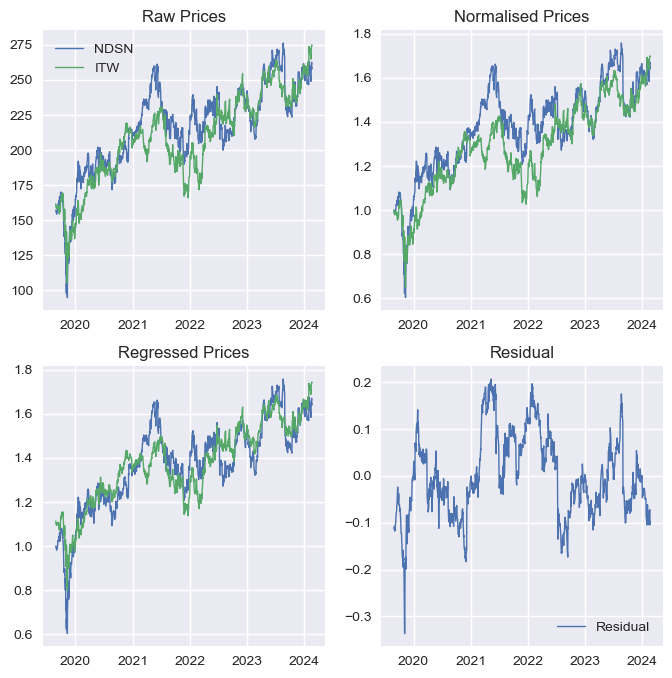



Cointegrated Augmented Dickey-Fuller test 


Regressand          Regressor  t-statistic Significance Level  \
0  ΔResidual  (Lag 1, Residual)    -3.342836                 1%   
1  ΔResidual  (Lag 1, Residual)    -3.342836                 5%   
2  ΔResidual  (Lag 1, Residual)    -3.342836                10%   

   Critical Value  Is Stationary  
0       -3.905337          False  
1       -3.341086           True  
2       -3.047889           True



Error Correction Model fitting 


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0      ΔNDSN                ΔITW     0.835860        0.026776    31.216192   
1      ΔNDSN  (Lag 1, Residuals)    -0.019452        0.005604    -3.471023   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.000536               True



Error Correction Model reverse fitting 


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0       ΔITW               ΔNDSN     0.528123        0.016918    31.216192   
1       ΔITW  (Lag 1, Residuals)     0.013444        0.004460     3.014533   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.002626               True



Fit to Ornstein-Uhlenbeck Stochastic Differential Equation 
Theta: 5.0446

Half-life in years: 0.1374 years
Half-life in working days: 34.6258 days

Equilibrium level μ_e: 0.0007542416915065826
Equilibirum level μ_e can be compared to the AR(1) fitting intercept: 1.4948461051488972e-05

Sum Squared Errors: 0.3698966810538704

Annualised Variance: 0.0014678439724359936
Diffusion in Ornstein-Uhlenbeck SDE (sigma_ou): 0.614288828482776
Diffusion in equilibrium to dictate entry trade signals (sigma_eq): 0.19339469140191462

Diffusion of sample residuals (note the difference): 0.01730640004838421


Grid search optimisation results for Z 
Maximum return occurs with Z=0.5


Z  Total Trades  Total Return
0   0.30            13      1.342951
1   0.35            12      1.569871
2   0.40            12      1.750467
3   0.45            11      1.635997
4   0.50            11      1.990894
5   0.55             9      1.613325
6   0.60             8      1.553289
7   0.65             7      1.453028
8   0.70             7      1.505447
9   0.75             6      1.201024
10  0.80             6      1.368124
11  0.85             6      1.422050
12  0.90             5      1.201392
13  0.95             4      1.071924
14  1.00             3      0.782388
15  1.05             2      0.506785
16  1.10             1      0.312007
17  1.15             1      0.312007
18  1.20             1      0.528210
19  1.25             1      0.528210
20  1.30             1      0.528210
21  1.35             1      0.528210
22  1.40             1      0.528210



Backtest plots for optimal Z


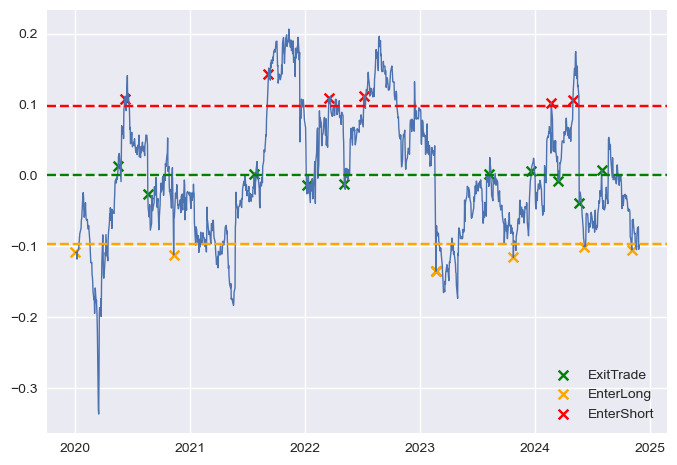

In [20]:
""" Notebook Reference 3.0 """

# Create Bivariate Engle Granger class 
EG_2 = BivariateEngleGranger()

# Initialise first pair based on economic reasoning for cointegration to exist (Visa on Mastercard)
ticker_2_a = "NDSN"
ticker_2_b = "ITW"
start_date_2 = "2020-01-01"
end_date_2 = "2024-11-29"

EG_2.initialise_single_procedure(ticker_2_a, ticker_2_b, start_date_2, end_date_2, benchmark=benchmark)

EG_2.run_single_procedure(include_strategy_backtest=False)

Price regression summary 


Regressand Regressor  Coefficient  Standard Error  t-statistic  \
0        CSX  Constant     0.057725        0.012142     4.754235   
1        CSX       UNP     1.012661        0.009663   104.796748   

   p-value (t-dist)  
0          0.000002  
1          0.000000



Timeseries plots


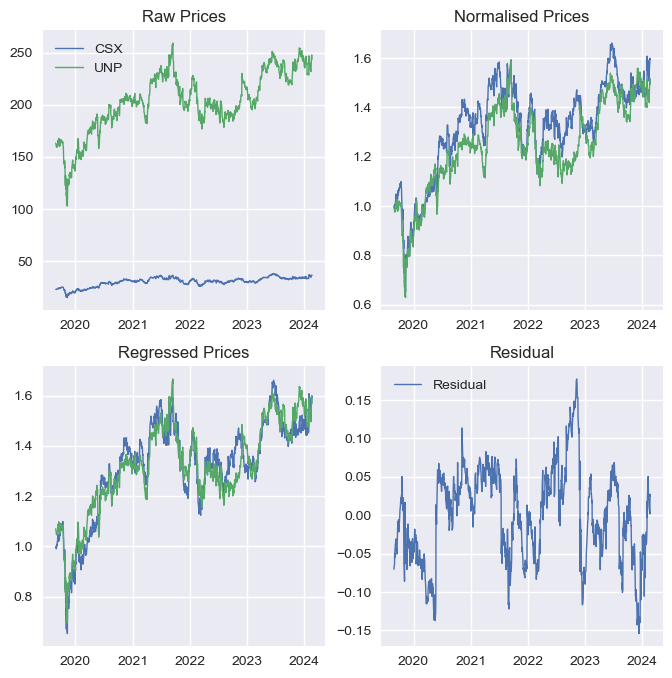



Cointegrated Augmented Dickey-Fuller test 


Regressand          Regressor  t-statistic Significance Level  \
0  ΔResidual  (Lag 1, Residual)     -4.03121                 1%   
1  ΔResidual  (Lag 1, Residual)     -4.03121                 5%   
2  ΔResidual  (Lag 1, Residual)     -4.03121                10%   

   Critical Value  Is Stationary  
0       -3.905337           True  
1       -3.341086           True  
2       -3.047889           True



Error Correction Model fitting 


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0       ΔCSX                ΔUNP     0.844746        0.020291    41.631719   
1       ΔCSX  (Lag 1, Residuals)    -0.026577        0.006557    -4.053136   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.000054               True



Error Correction Model reverse fitting 


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0       ΔUNP                ΔCSX     0.691707        0.016615    41.631719   
1       ΔUNP  (Lag 1, Residuals)     0.023972        0.005934     4.039803   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.000057               True



Fit to Ornstein-Uhlenbeck Stochastic Differential Equation 
Theta: 7.3731

Half-life in years: 0.0940 years
Half-life in working days: 23.6907 days

Equilibrium level μ_e: 0.0026604582299424107
Equilibirum level μ_e can be compared to the AR(1) fitting intercept: 7.671235069806655e-05

Sum Squared Errors: 0.24804949826984413

Annualised Variance: 0.0009843234058327147
Diffusion in Ornstein-Uhlenbeck SDE (sigma_ou): 0.5053491274305242
Diffusion in equilibrium to dictate entry trade signals (sigma_eq): 0.13159909784537355

Diffusion of sample residuals (note the difference): 0.014172148608094478


Grid search optimisation results for Z 
Maximum return occurs with Z=0.35


Z  Total Trades  Total Return
0   0.30            23      2.372543
1   0.35            23      2.602428
2   0.40            18      2.063860
3   0.45            17      2.044833
4   0.50            16      2.137940
5   0.55            14      2.067121
6   0.60            12      1.897633
7   0.65            10      1.503726
8   0.70             8      1.073950
9   0.75             8      1.143794
10  0.80             6      0.864475
11  0.85             5      0.721138
12  0.90             5      0.771628
13  0.95             3      0.468718
14  1.00             3      0.482161
15  1.05             3      0.496929
16  1.10             2      0.315182
17  1.15             2      0.330486
18  1.20             1      0.193382
19  1.25             1      0.202391
20  1.30             1      0.202391
21  1.35             0      0.000000
22  1.40             0      0.000000



Backtest plots for optimal Z


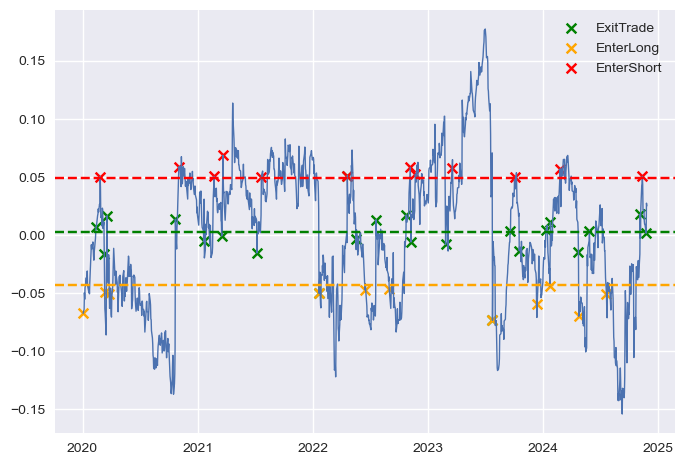

In [21]:
""" Notebook Reference 4.0 """

# Create Bivariate Engle Granger class 
EG_3 = BivariateEngleGranger()

# Initialise first pair based on economic reasoning for cointegration to exist (Visa on Mastercard)
ticker_3_a = "CSX"
ticker_3_b = "UNP"
start_date_3 = "2020-01-01"
end_date_3 = "2024-11-29"

EG_3.initialise_single_procedure(ticker_3_a, ticker_3_b, start_date_3, end_date_3, benchmark=benchmark)

EG_3.run_single_procedure(include_strategy_backtest=False)

In [22]:
""" Notebook Reference 4.1 """

# Trading data timeseries
df_formatted = df_trades.copy()
df_formatted.index = df_formatted.index.date

df_formatted.tail().T

# also can be accessed via EG_reverse.optimal_strategy

2024-11-21 2024-11-22 2024-11-25 2024-11-26 2024-11-27
Residual           -0.040337  -0.020938  -0.021804  -0.006917  -0.011596
EqResidual         -0.000104  -0.000104  -0.000104  -0.000104  -0.000104
UpperBound          0.025837   0.025837   0.025837   0.025837   0.025837
LowerBound         -0.026045  -0.026045  -0.026045  -0.026045  -0.026045
UpperBreach            False      False      False      False      False
LowerBreach             True      False      False      False      False
Position                Long       Long       Long       Long       Long
Position_t-1            Long       Long       Long       Long       Long
IsPositionChanged      False      False      False      False      False
EnterShort             False      False      False      False      False
EnterLong              False      False      False      False      False
ExitTrade              False      False      False      False      False
MA                   1.74596   1.765484    1.78494   1.791313   1.804532
V                    1.67979   1.679899   1.697623   1.690197   1.705808
MA_returns          0.004995   0.011182    0.01102    0.00357    0.00738
V_returns           0.008165   0.000065   0.010551  -0.004374   0.009236
MA_cum_returns       0.74596   0.765484    0.78494   0.791313   0.804532
V_cum_returns        0.67979   0.679899   0.697623   0.690197   0.705808
Benchmark           1.825962   1.832294   1.837829   1.848345   1.841319
BenchmarkReturn      0.00534   0.003468    0.00302   0.005722  -0.003801
PortfolioReturn    -0.004367   0.011108  -0.001077   0.008585   -0.00321
CumReturn           1.472471   1.499935   1.497243   1.518683   1.510598
CumTrades                 27         27         27         27         27

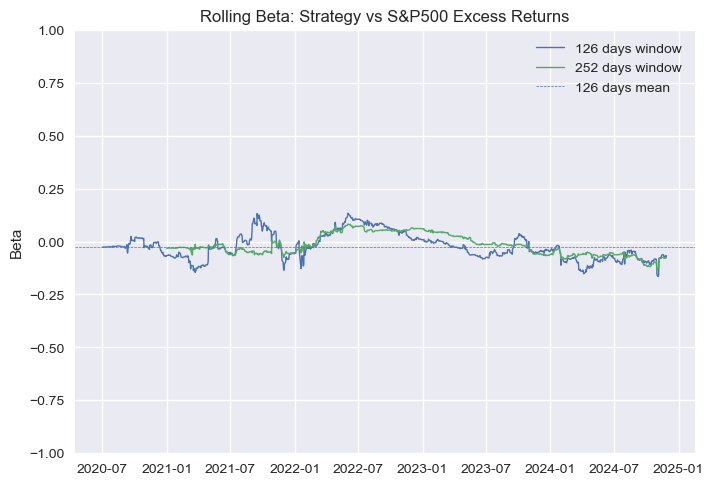

In [23]:
""" Notebook Reference 5.0 """

# Plot rolling beta with respect to S&P500 excess returns
EG_reverse.plot_sp500_xs_rets_rolling_beta(df_trades)

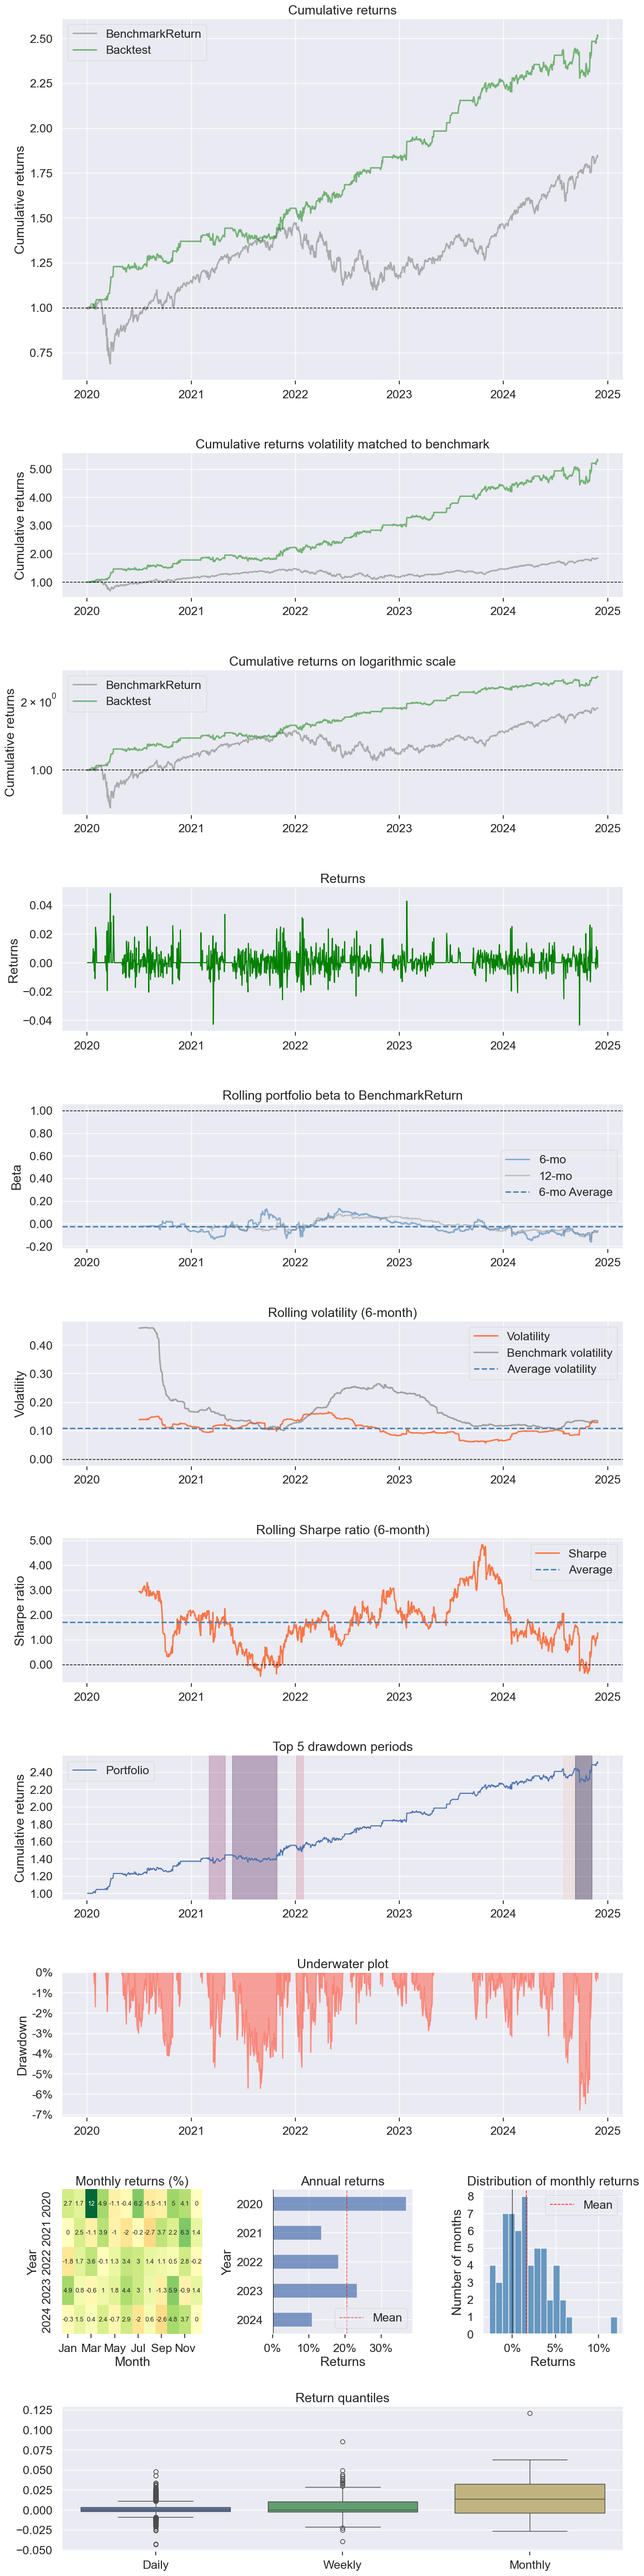

In [24]:
""" Notebook Reference 5.1 """

# Create tearsheet from pyfolio
EG_reverse.create_pyfolio_returns_tear_sheet(df_trades)

Price regression summary (training dataset)


Regressand Regressor  Coefficient  Standard Error  t-statistic  \
0         MA  Constant    -0.072170        0.011835    -6.097874   
1         MA         V     1.085424        0.010402   104.349112   

   p-value (t-dist)  
0      1.540575e-09  
1      0.000000e+00



Timeseries plots


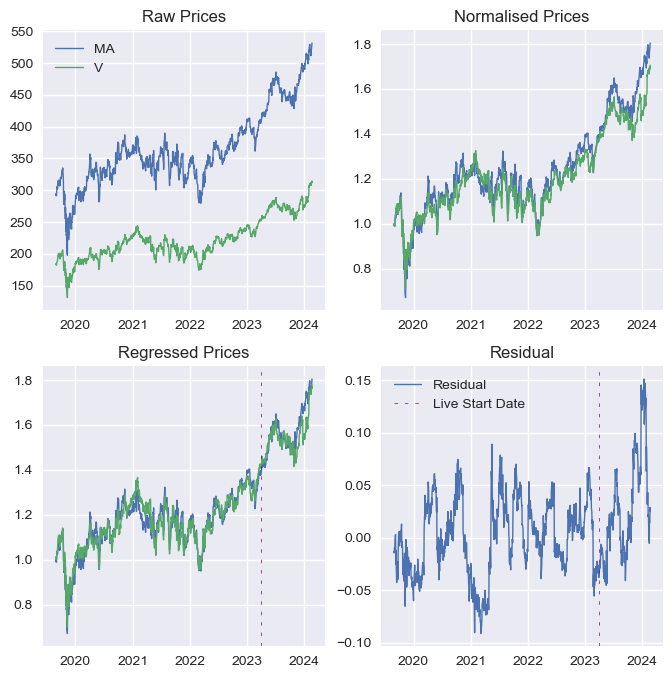



Cointegrated Augmented Dickey-Fuller test (training dataset)


Regressand          Regressor  t-statistic Significance Level  \
0  ΔResidual  (Lag 1, Residual)    -3.942318                 1%   
1  ΔResidual  (Lag 1, Residual)    -3.942318                 5%   
2  ΔResidual  (Lag 1, Residual)    -3.942318                10%   

   Critical Value  Is Stationary  
0       -3.907571           True  
1       -3.342328           True  
2       -3.048750           True



Error Correction Model fitting (training dataset)


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0        ΔMA                  ΔV     1.031159        0.015153     68.04959   
1        ΔMA  (Lag 1, Residuals)    -0.035081        0.008379     -4.18658   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.000031               True



Error Correction Model reverse fitting (training dataset)


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0         ΔV                 ΔMA     0.799541        0.011749    68.049590   
1         ΔV  (Lag 1, Residuals)     0.028426        0.007389     3.847302   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.000127               True



Fit to Ornstein-Uhlenbeck Stochastic Differential Equation (training dataset)
Theta: 9.0295

Half-life in years: 0.0768 years
Half-life in working days: 19.3448 days

Equilibrium level μ_e: -0.0006493993650472896
Equilibirum level μ_e can be compared to the AR(1) fitting intercept: -2.2856847827644935e-05

Sum Squared Errors: 0.08668701147939578

Annualised Variance: 0.00034399607729918957
Diffusion in Ornstein-Uhlenbeck SDE (sigma_ou): 0.29971688372263994
Diffusion in equilibrium to dictate entry trade signals (sigma_eq): 0.07052855559176234

Diffusion of sample residuals (note the difference): 0.009366957358786884


Grid search optimisation results for Z (training dataset)
Maximum return as at 2023-12-06 occurs with Z=0.5


Z  Total Trades  Total Return
0   0.30            22      0.871378
1   0.35            20      0.855440
2   0.40            18      0.871241
3   0.45            15      0.737326
4   0.50            15      0.878736
5   0.55            13      0.755202
6   0.60            11      0.647694
7   0.65            11      0.793047
8   0.70            10      0.778065
9   0.75            10      0.794879
10  0.80             8      0.623814
11  0.85             8      0.651470
12  0.90             7      0.622868
13  0.95             6      0.496464
14  1.00             5      0.441255
15  1.05             4      0.356345
16  1.10             3      0.262346
17  1.15             2      0.182008
18  1.20             2      0.182008
19  1.25             2      0.182008
20  1.30             0      0.000000
21  1.35             0      0.000000
22  1.40             0      0.000000



Backtest plots for optimal Z


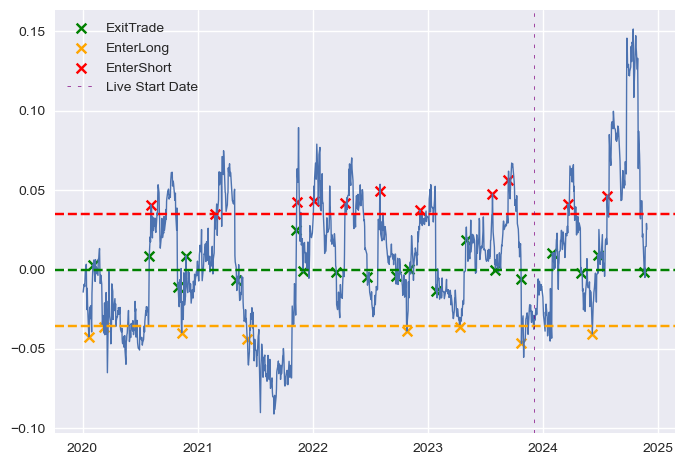



Rolling beta with respect to S&P500 excess returns


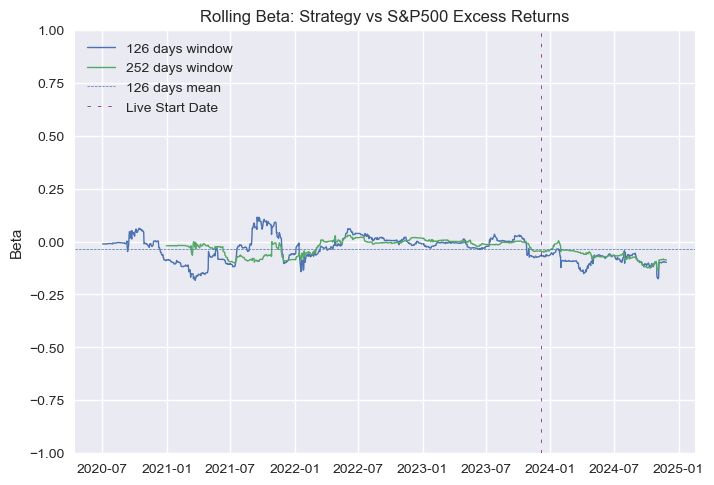



Tearsheet generation


In-sample  Out-of-sample       All
MA cumulative returns          0.396632       0.304790  0.822312
V cumulative returns           0.378871       0.247023  0.719484
Benchmark cumulative returns   0.406353       0.318596  0.854411

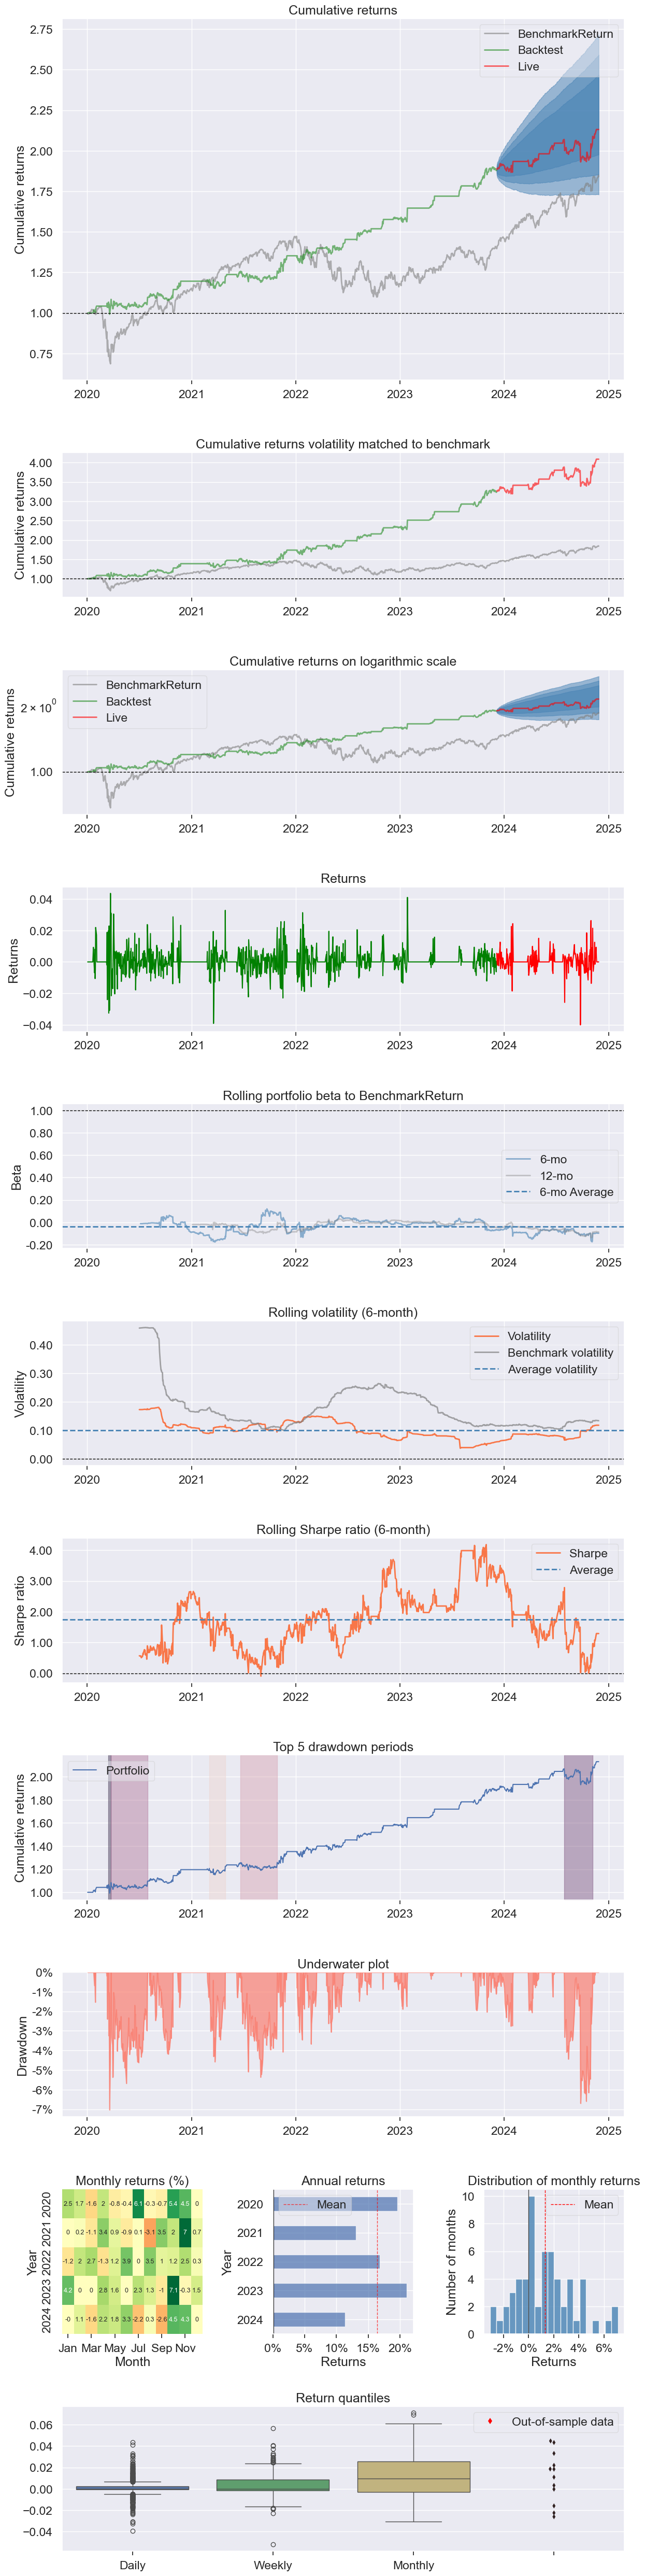

In [25]:
""" Notebook Reference 6.0 """

training_pct = 0.8
iso_format = "%Y-%m-%d"

dt_start = dt.datetime.strptime(start_date, iso_format)
dt_end = dt.datetime.strptime(end_date, iso_format)
dt_live = (dt_start + (dt_end - dt_start) * training_pct).date()
dt_live = dt.datetime.strftime(dt_live, iso_format)

EG_reverse_live = BivariateEngleGranger()

EG_reverse_live.initialise_single_procedure(ticker_b, ticker_a, start_date, end_date, benchmark=benchmark,
                                            live_start_date=dt_live)

EG_reverse_live.run_single_procedure()

Price regression summary (training dataset)


Regressand Regressor  Coefficient  Standard Error  t-statistic  \
0       NDSN  Constant     0.169577        0.018372     9.230152   
1       NDSN       ITW     0.939180        0.014429    65.088949   

   p-value (t-dist)  
0               0.0  
1               0.0



Timeseries plots


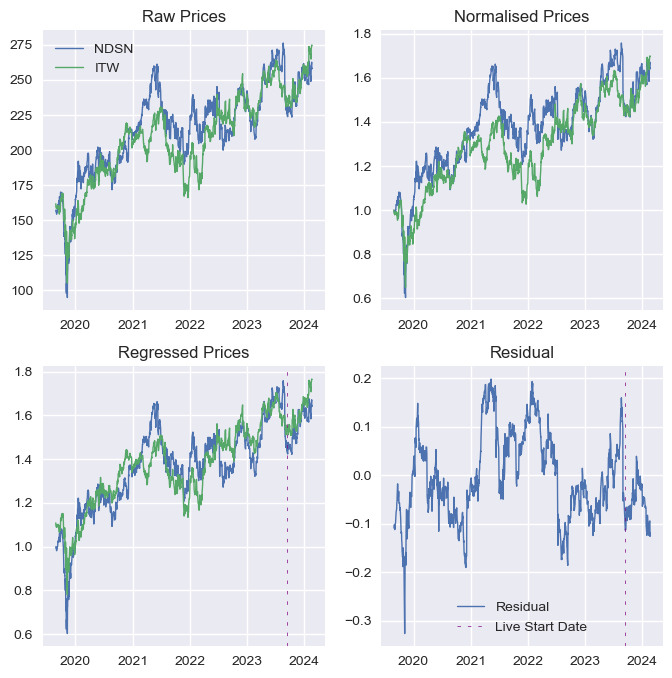



Cointegrated Augmented Dickey-Fuller test (training dataset)


Regressand          Regressor  t-statistic Significance Level  \
0  ΔResidual  (Lag 1, Residual)    -3.188227                 1%   
1  ΔResidual  (Lag 1, Residual)    -3.188227                 5%   
2  ΔResidual  (Lag 1, Residual)    -3.188227                10%   

   Critical Value  Is Stationary  
0       -3.906343          False  
1       -3.341645          False  
2       -3.048277           True



Error Correction Model fitting (training dataset)


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0      ΔNDSN                ΔITW     0.830481        0.028640    28.996920   
1      ΔNDSN  (Lag 1, Residuals)    -0.019179        0.005887    -3.257978   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.001156               True



Error Correction Model reverse fitting (training dataset)


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0       ΔITW               ΔNDSN     0.519519        0.017916    28.996920   
1       ΔITW  (Lag 1, Residuals)     0.014226        0.004659     3.053613   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.002315               True



Fit to Ornstein-Uhlenbeck Stochastic Differential Equation (training dataset)
Theta: 5.0897

Half-life in years: 0.1362 years
Half-life in working days: 34.3192 days

Equilibrium level μ_e: 0.0017432530159920232
Equilibirum level μ_e can be compared to the AR(1) fitting intercept: 3.4855387743761135e-05

Sum Squared Errors: 0.35113941955030853

Annualised Variance: 0.0013934103950409068
Diffusion in Ornstein-Uhlenbeck SDE (sigma_ou): 0.5985642344520687
Diffusion in equilibrium to dictate entry trade signals (sigma_eq): 0.18760809468764453

Diffusion of sample residuals (note the difference): 0.01778600065823378


Grid search optimisation results for Z (training dataset)
Maximum return as at 2024-06-03 occurs with Z=0.4


Z  Total Trades  Total Return
0   0.30            14      1.372022
1   0.35            13      1.471466
2   0.40            13      1.760997
3   0.45            10      1.429118
4   0.50            10      1.586998
5   0.55            10      1.627069
6   0.60             9      1.513179
7   0.65             9      1.734533
8   0.70             7      1.298593
9   0.75             7      1.407398
10  0.80             6      1.118309
11  0.85             5      0.954931
12  0.90             5      0.987970
13  0.95             5      1.143826
14  1.00             4      0.859951
15  1.05             1      0.287490
16  1.10             1      0.287490
17  1.15             1      0.287490
18  1.20             1      0.496540
19  1.25             1      0.496540
20  1.30             1      0.496540
21  1.35             1      0.496540
22  1.40             1      0.496540



Backtest plots for optimal Z


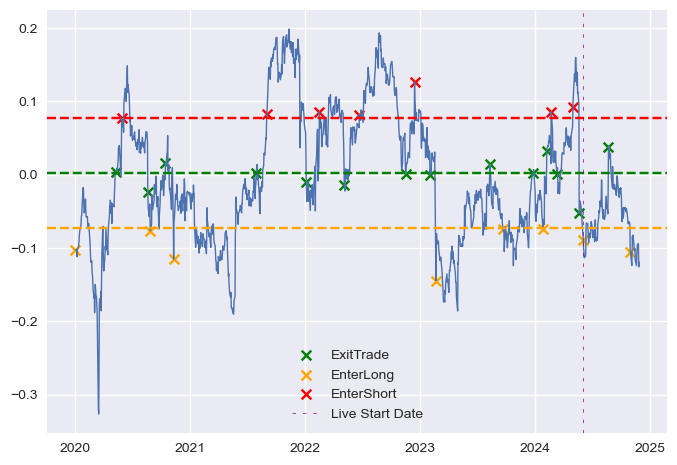



Rolling beta with respect to S&P500 excess returns


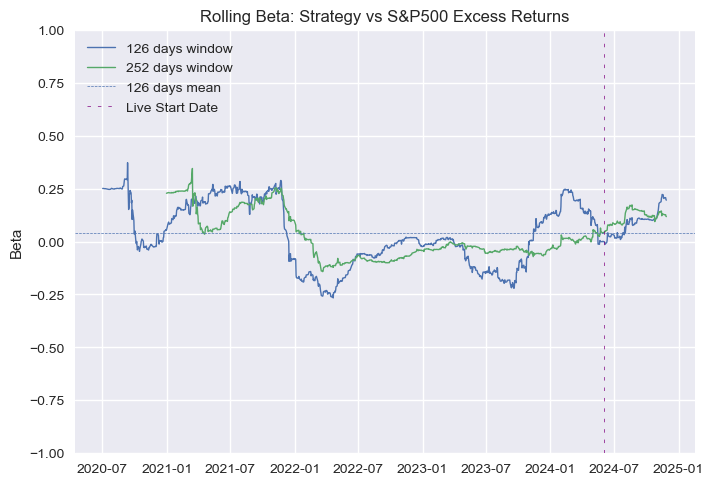



Tearsheet generation


In-sample  Out-of-sample       All
NDSN cumulative returns        0.459989       0.134140  0.655832
ITW cumulative returns         0.478444       0.164233  0.721253
Benchmark cumulative returns   0.633275       0.135394  0.854411

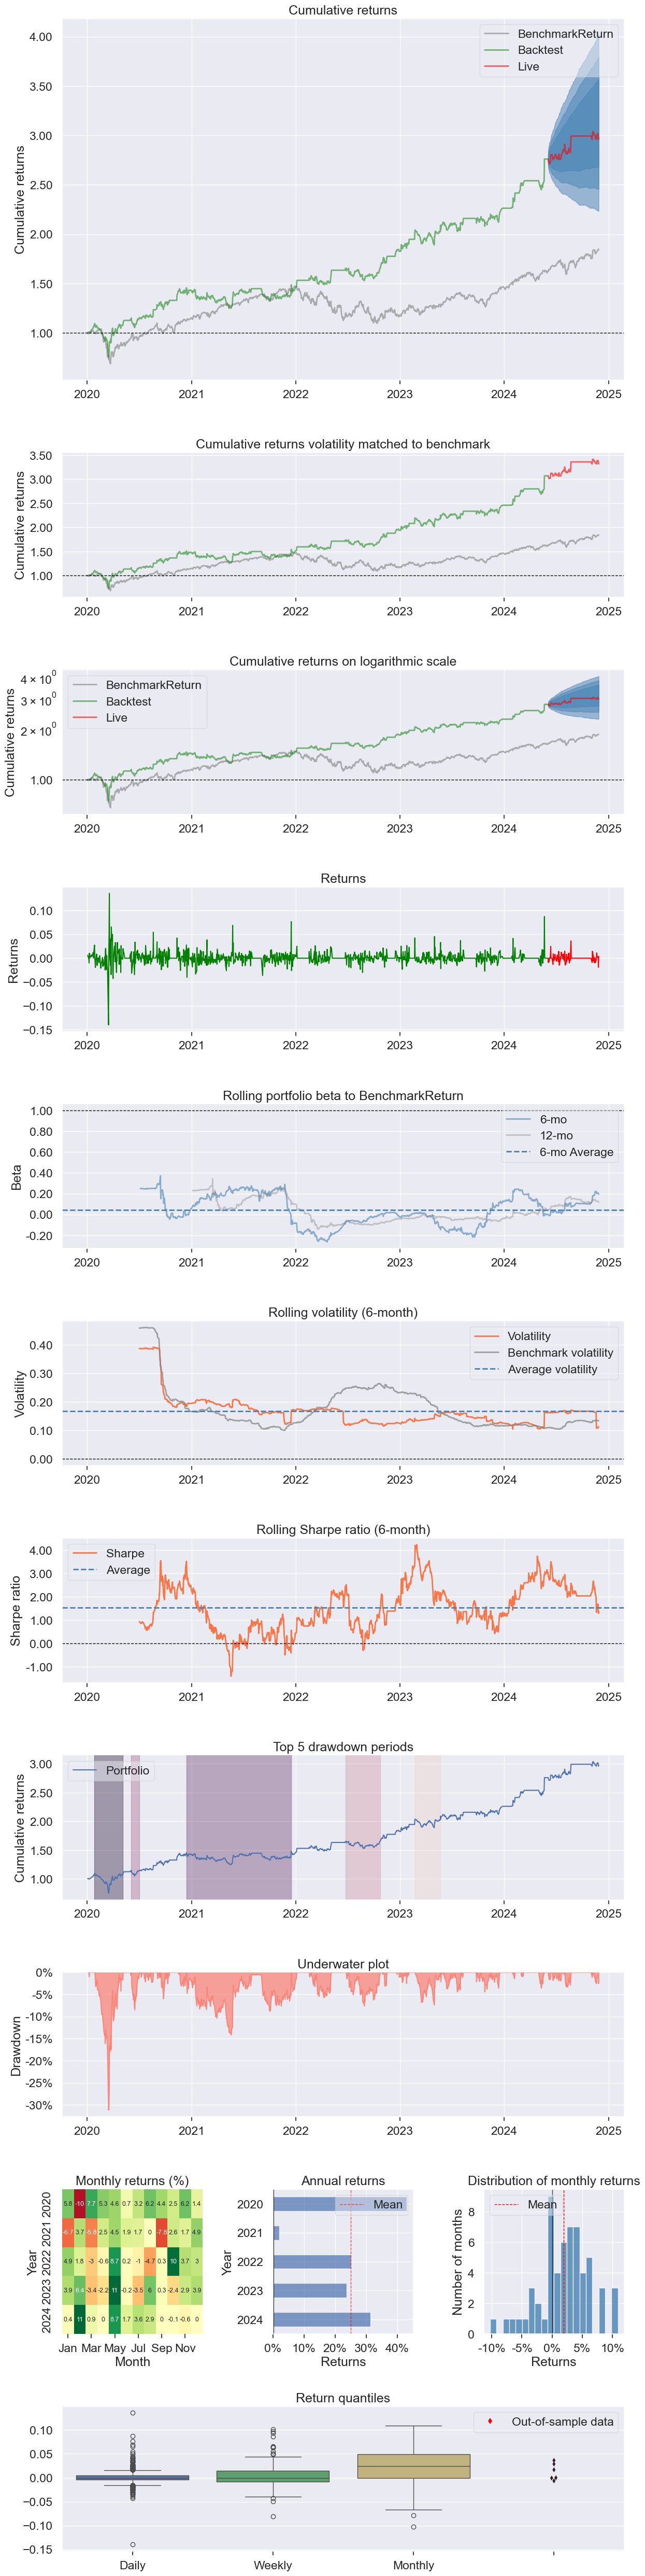

In [26]:
""" Notebook Reference 6.1 """

training_pct_2 = 0.9

dt_start_2 = dt.datetime.strptime(start_date_2, iso_format)
dt_end_2 = dt.datetime.strptime(end_date_2, iso_format)
dt_live_2 = (dt_start_2 + (dt_end_2 - dt_start_2) * training_pct_2).date()
dt_live_2 = dt_live_2 + dt.timedelta(1)  # ensure weekday
dt_live_2 = dt.datetime.strftime(dt_live_2, iso_format)

EG_2_live = BivariateEngleGranger()

EG_2_live.initialise_single_procedure(ticker_2_a, ticker_2_b, start_date_2, end_date_2, benchmark=benchmark,
                                            live_start_date=dt_live_2)

EG_2_live.run_single_procedure()

Price regression summary (training dataset)


Regressand Regressor  Coefficient  Standard Error  t-statistic  \
0        CSX  Constant    -0.017441        0.014391    -1.211934   
1        CSX       UNP     1.080624        0.011969    90.289016   

   p-value (t-dist)  
0          0.225828  
1          0.000000



Timeseries plots


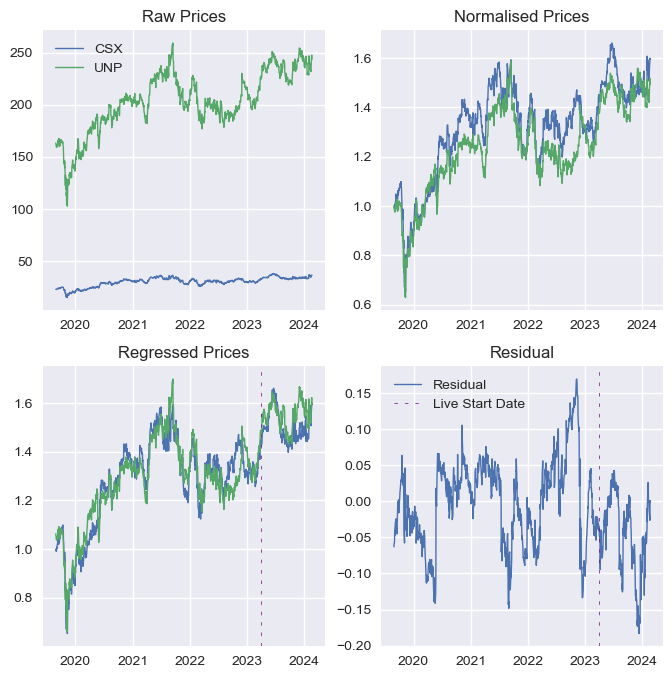



Cointegrated Augmented Dickey-Fuller test (training dataset)


Regressand          Regressor  t-statistic Significance Level  \
0  ΔResidual  (Lag 1, Residual)    -3.646531                 1%   
1  ΔResidual  (Lag 1, Residual)    -3.646531                 5%   
2  ΔResidual  (Lag 1, Residual)    -3.646531                10%   

   Critical Value  Is Stationary  
0       -3.907571          False  
1       -3.342328           True  
2       -3.048750           True



Error Correction Model fitting (training dataset)


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0       ΔCSX                ΔUNP     0.851009        0.022113    38.484818   
1       ΔCSX  (Lag 1, Residuals)    -0.026118        0.007402    -3.528601   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.000437               True



Error Correction Model reverse fitting (training dataset)


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0       ΔUNP                ΔCSX     0.705442        0.018330    38.484818   
1       ΔUNP  (Lag 1, Residuals)     0.026339        0.006729     3.913994   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.000097               True



Fit to Ornstein-Uhlenbeck Stochastic Differential Equation (training dataset)
Theta: 7.8486

Half-life in years: 0.0883 years
Half-life in working days: 22.2552 days

Equilibrium level μ_e: 0.0007818878130983756
Equilibirum level μ_e can be compared to the AR(1) fitting intercept: 2.397685844123404e-05

Sum Squared Errors: 0.20726600787140548

Annualised Variance: 0.000822484158219863
Diffusion in Ornstein-Uhlenbeck SDE (sigma_ou): 0.4623725739591276
Diffusion in equilibrium to dictate entry trade signals (sigma_eq): 0.11670248169204087

Diffusion of sample residuals (note the difference): 0.014483901711097261


Grid search optimisation results for Z (training dataset)
Maximum return as at 2023-12-06 occurs with Z=0.35


Z  Total Trades  Total Return
0   0.30            20      2.130865
1   0.35            20      2.445544
2   0.40            17      2.163963
3   0.45            15      1.958459
4   0.50            13      1.758139
5   0.55            10      1.249244
6   0.60             9      1.186348
7   0.65             8      0.968103
8   0.70             8      1.004119
9   0.75             8      1.086027
10  0.80             6      0.826931
11  0.85             6      0.883036
12  0.90             4      0.588863
13  0.95             4      0.603807
14  1.00             4      0.629231
15  1.05             4      0.666909
16  1.10             4      0.698949
17  1.15             4      0.715592
18  1.20             3      0.542043
19  1.25             2      0.352981
20  1.30             1      0.205846
21  1.35             1      0.205888
22  1.40             1      0.214327



Backtest plots for optimal Z


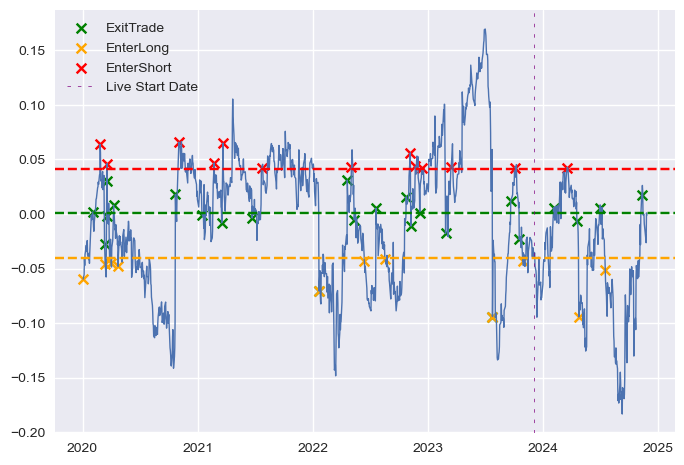



Rolling beta with respect to S&P500 excess returns


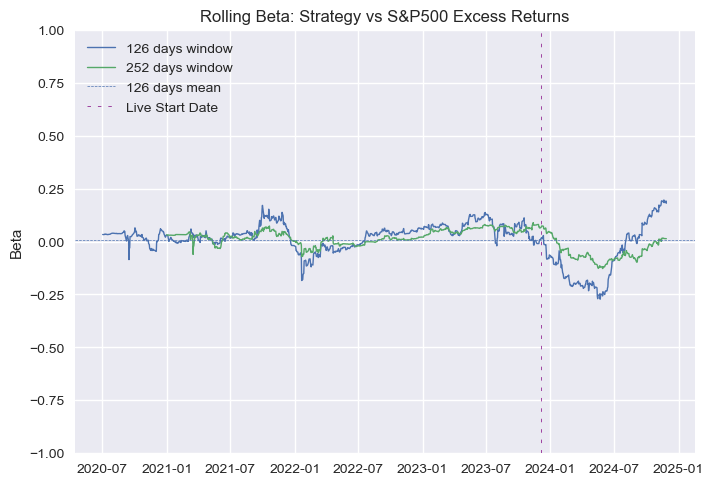



Tearsheet generation


In-sample  Out-of-sample       All
CSX cumulative returns         0.451784       0.102607  0.600747
UNP cumulative returns         0.397278       0.075754  0.503127
Benchmark cumulative returns   0.406353       0.318596  0.854411

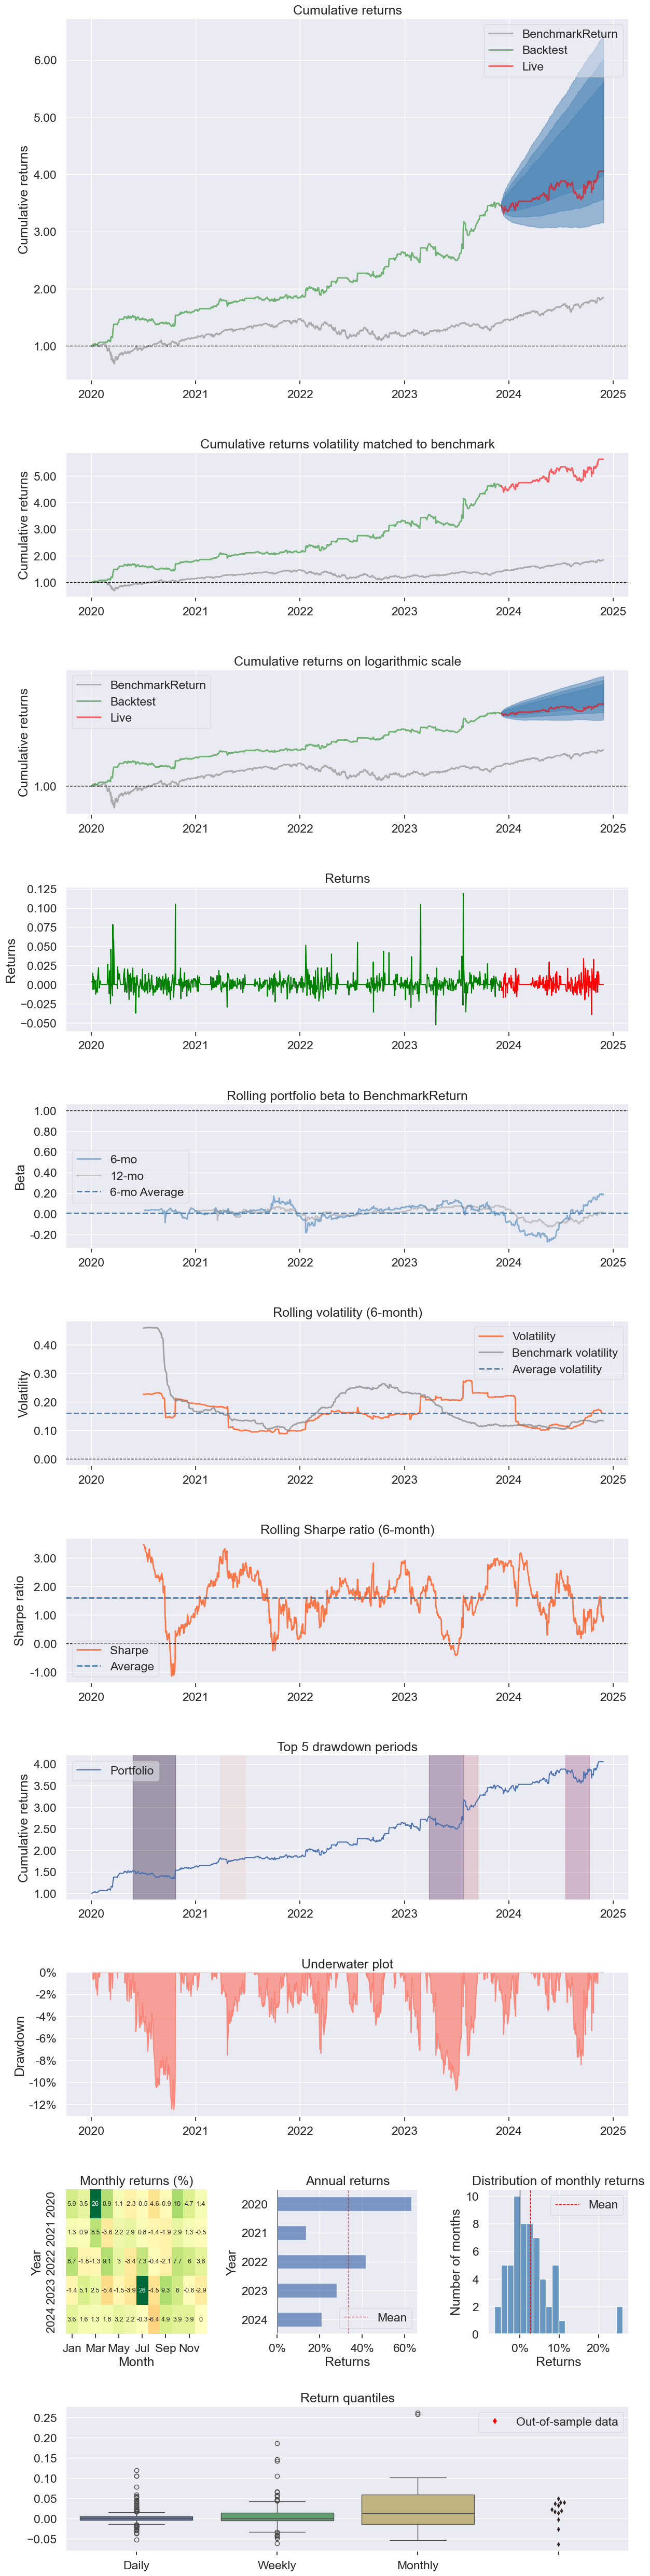

In [27]:
""" Notebook Reference 6.2 """

training_pct_3 = 0.8

dt_start_3 = dt.datetime.strptime(start_date_3, iso_format)
dt_end_3 = dt.datetime.strptime(end_date_3, iso_format)
dt_live_3 = (dt_start_3 + (dt_end_3 - dt_start_3) * training_pct_3).date()
dt_live_3 = dt.datetime.strftime(dt_live_3, iso_format)

EG_live_3 = BivariateEngleGranger()

EG_live_3.initialise_single_procedure(ticker_3_a, ticker_3_b, start_date_3, end_date_3, benchmark=benchmark,
                                            live_start_date=dt_live_3)

EG_live_3.run_single_procedure()

Price regression summary 


Regressand Regressor  Coefficient  Standard Error  t-statistic  \
0        ITW  Constant     0.059630        0.017362     3.434488   
1        ITW      NDSN     0.894338        0.012516    71.458003   

   p-value (t-dist)  
0          0.000613  
1          0.000000



Timeseries plots


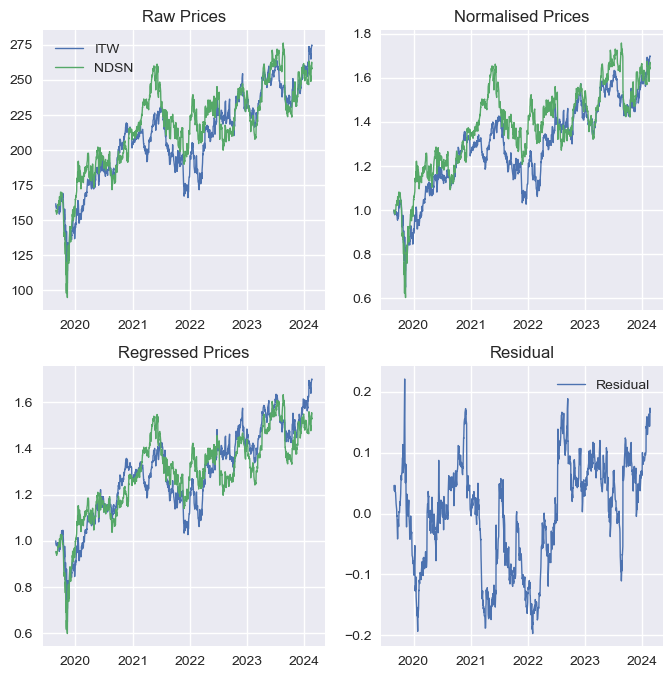



Cointegrated Augmented Dickey-Fuller test 


Regressand          Regressor  t-statistic Significance Level  \
0  ΔResidual  (Lag 1, Residual)    -2.871235                 1%   
1  ΔResidual  (Lag 1, Residual)    -2.871235                 5%   
2  ΔResidual  (Lag 1, Residual)    -2.871235                10%   

   Critical Value  Is Stationary  
0       -3.905337          False  
1       -3.341086          False  
2       -3.047889          False



Error Correction Model fitting 


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0       ΔITW               ΔNDSN     0.526770        0.016906    31.159211   
1       ΔITW  (Lag 1, Residuals)    -0.012839        0.004476    -2.868169   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.004199               True



Error Correction Model reverse fitting 


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0      ΔNDSN                ΔITW     0.836297        0.026839    31.159211   
1      ΔNDSN  (Lag 1, Residuals)     0.015296        0.005642     2.711016   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.006801               True



Fit to Ornstein-Uhlenbeck Stochastic Differential Equation 
Theta: 4.0217

Half-life in years: 0.1724 years
Half-life in working days: 43.4330 days

Equilibrium level μ_e: 0.006045824874519758
Equilibirum level μ_e can be compared to the AR(1) fitting intercept: 9.571954645833436e-05

Sum Squared Errors: 0.32200586781489704

Annualised Variance: 0.0012778010627575278
Diffusion in Ornstein-Uhlenbeck SDE (sigma_ou): 0.5719895969854134
Diffusion in equilibrium to dictate entry trade signals (sigma_eq): 0.20168328404844763

Diffusion of sample residuals (note the difference): 0.016147244229477498


Grid search optimisation results for Z 
Maximum return occurs with Z=0.8


Z  Total Trades  Total Return
0   0.30            12      1.027454
1   0.35            11      1.174491
2   0.40            11      1.315646
3   0.45             9      1.174695
4   0.50             9      1.409522
5   0.55             9      1.565439
6   0.60             6      1.274837
7   0.65             6      1.350699
8   0.70             6      1.443080
9   0.75             6      1.595527
10  0.80             6      1.659393
11  0.85             5      1.391715
12  0.90             5      1.536322
13  0.95             4      1.254886
14  1.00             2      0.615963
15  1.05             1      0.352958
16  1.10             0      0.000000
17  1.15             0      0.000000
18  1.20             0      0.000000
19  1.25             0      0.000000
20  1.30             0      0.000000
21  1.35             0      0.000000
22  1.40             0      0.000000



Backtest plots for optimal Z


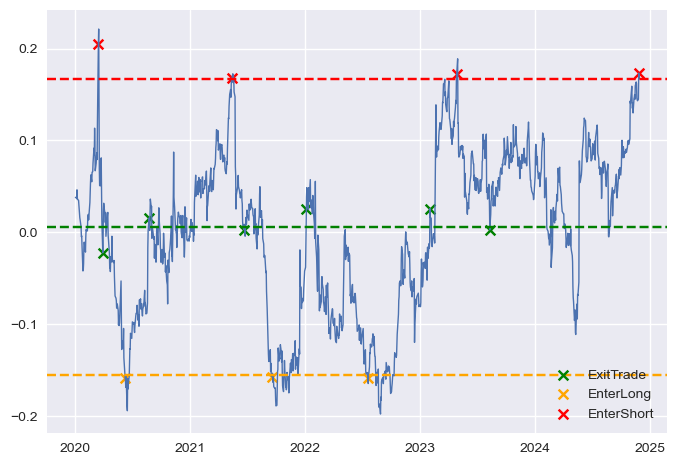

In [28]:
""" Notebook Reference A """

# Reverse procedure
EG_2_reverse = BivariateEngleGranger()

EG_2_reverse.initialise_single_procedure(ticker_2_b, ticker_2_a, start_date_2, end_date_2)

EG_2_reverse.run_single_procedure(include_strategy_backtest=False)

Price regression summary 


Regressand Regressor  Coefficient  Standard Error  t-statistic  \
0        UNP  Constant     0.074419        0.011275     6.600476   
1        UNP       CSX     0.887748        0.008471   104.796748   

   p-value (t-dist)  
0      6.070744e-11  
1      0.000000e+00



Timeseries plots


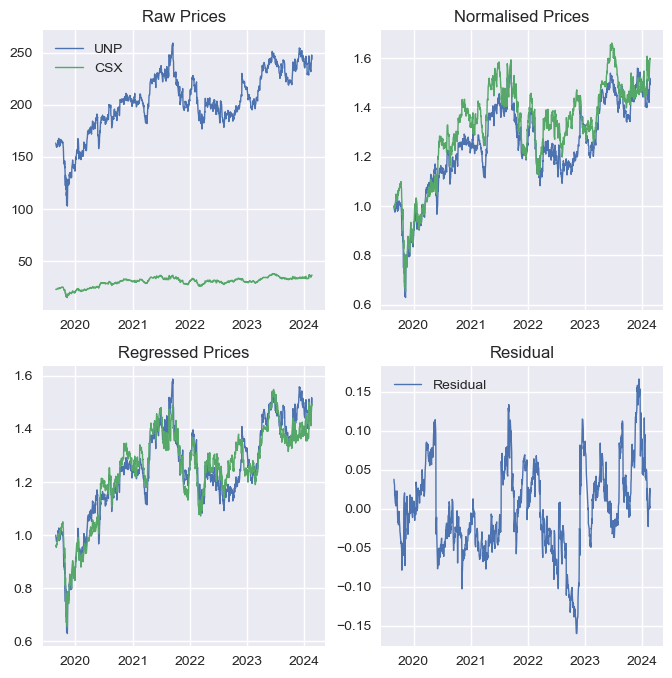



Cointegrated Augmented Dickey-Fuller test 


Regressand          Regressor  t-statistic Significance Level  \
0  ΔResidual  (Lag 1, Residual)    -3.958171                 1%   
1  ΔResidual  (Lag 1, Residual)    -3.958171                 5%   
2  ΔResidual  (Lag 1, Residual)    -3.958171                10%   

   Critical Value  Is Stationary  
0       -3.905337           True  
1       -3.341086           True  
2       -3.047889           True



Error Correction Model fitting 


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0       ΔUNP                ΔCSX     0.690572        0.016600    41.601749   
1       ΔUNP  (Lag 1, Residuals)    -0.026213        0.006331    -4.140157   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.000037               True



Error Correction Model reverse fitting 


Regressand           Regressor  Coefficient  Standard Error  t-statistic  \
0       ΔCSX                ΔUNP     0.845628        0.020327    41.601749   
1       ΔCSX  (Lag 1, Residuals)     0.026151        0.007015     3.727681   

   p-value (t-dist)  Significant at 5%  
0          0.000000               True  
1          0.000202               True



Fit to Ornstein-Uhlenbeck Stochastic Differential Equation 
Theta: 7.1829

Half-life in years: 0.0965 years
Half-life in working days: 24.3179 days

Equilibrium level μ_e: -0.0010107860547276194
Equilibirum level μ_e can be compared to the AR(1) fitting intercept: -2.8404291721322972e-05

Sum Squared Errors: 0.2143081069770612

Annualised Variance: 0.0008504289959407191
Diffusion in Ornstein-Uhlenbeck SDE (sigma_ou): 0.4695473265130407
Diffusion in equilibrium to dictate entry trade signals (sigma_eq): 0.12388375364621934

Diffusion of sample residuals (note the difference): 0.0131730342579215


Grid search optimisation results for Z 
Maximum return occurs with Z=0.55


Z  Total Trades  Total Return
0   0.30            18      1.610536
1   0.35            17      1.680345
2   0.40            16      1.684594
3   0.45            16      1.999339
4   0.50            15      1.977044
5   0.55            15      2.169895
6   0.60            12      1.665035
7   0.65             9      1.067647
8   0.70             8      1.062838
9   0.75             8      1.146533
10  0.80             8      1.190833
11  0.85             6      0.870547
12  0.90             6      0.899228
13  0.95             3      0.431090
14  1.00             3      0.436525
15  1.05             3      0.459070
16  1.10             2      0.316727
17  1.15             2      0.318598
18  1.20             2      0.329116
19  1.25             2      0.337375
20  1.30             1      0.126249
21  1.35             1      0.126249
22  1.40             0      0.000000



Backtest plots for optimal Z


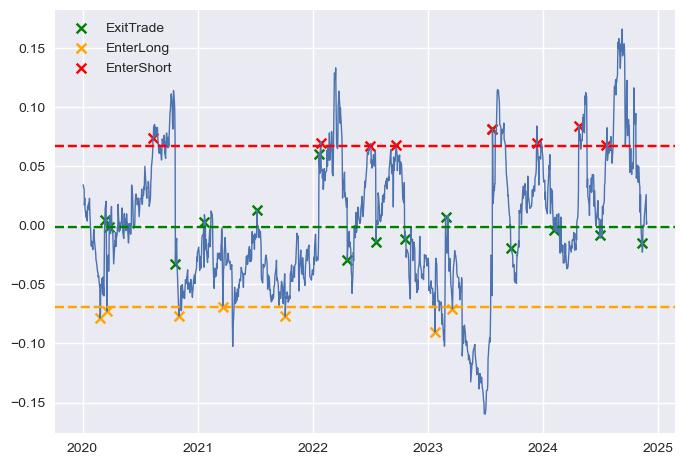

In [29]:
""" Notebook Reference B """

# Reverse procedure
EG_3_reverse = BivariateEngleGranger()

EG_3_reverse.initialise_single_procedure(ticker_3_b, ticker_3_a, start_date_3, end_date_3)

EG_3_reverse.run_single_procedure(include_strategy_backtest=False)